## Credit Card Fraud Detection

In this project you will predict fraudulent credit card transactions with the help of Machine learning models. Please import the following libraries to get started.

In [31]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost.sklearn import XGBClassifier
from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import SGDClassifier 
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

C:\Users\My Pc\Anaconda3 2020\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  after removing the cwd from sys.path.


## Exploratory data analysis

In [3]:
# reading the data from csv file
df = pd.read_csv('creditcard.csv')
df.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0  0.0  -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  0.0   1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2  1.0  -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3  1.0  -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4  2.0  -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10       V11       V12       V13       V14  \
0  0.098698  0.363787  0.090794 -0.551600 -0.617801 -0.991390 -0.311169   
1  0.085102 -0.255425 -0.166974  1.612727  1.065235  0.489095 -0.143772   
2  0.247676 -1.514654  0.207643  0.624501  0.066084  0.717293 -0.165946   
3  0.377436 -1.387024 -0.054952 -0.226487  0.178228  0.507757 -0.287924   
4 -0.270533  0.817739  0.753074 -0.822843  0.538196  1.345852 -1.119670   

        V15       V16       V17       V18       V19       V20       V21  \
0  1.468177 -0.470401  0.207971  0.025791  0.403993  0.251412 -0.018307   
1  0.635558  0.463917 -0.114805 -0.183361 -0.145783 -0.069083 -0.225775   
2  2.345865 -2.890083  1.109969 -0.121359 -2.261857  0.524980  0.247998   
3 -0.631418 -1.059647 -0.684093  1.965775 -1.232622 -0.208038 -0.108300   
4  0.175121 -0.451449 -0.237033 -0.038195  0.803487  0.408542 -0.009431   

        V22       V23       V24       V25       V26       V27       V28  \
0  0.277838 -0.110474  0.066928  0.128539 -0.189115  0.133558 -0.021053   
1 -0.638672  0.101288 -0.339846  0.167170  0.125895 -0.008983  0.014724   
2  0.771679  0.909412 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752   
3  0.005274 -0.190321 -1.175575  0.647376 -0.221929  0.062723  0.061458   
4  0.798278 -0.137458  0.141267 -0.206010  0.502292  0.219422  0.215153   

   Amount  Class  
0  149.62  0      
1  2.69    0      
2  378.66  0      
3  123.50  0      
4  69.99   0

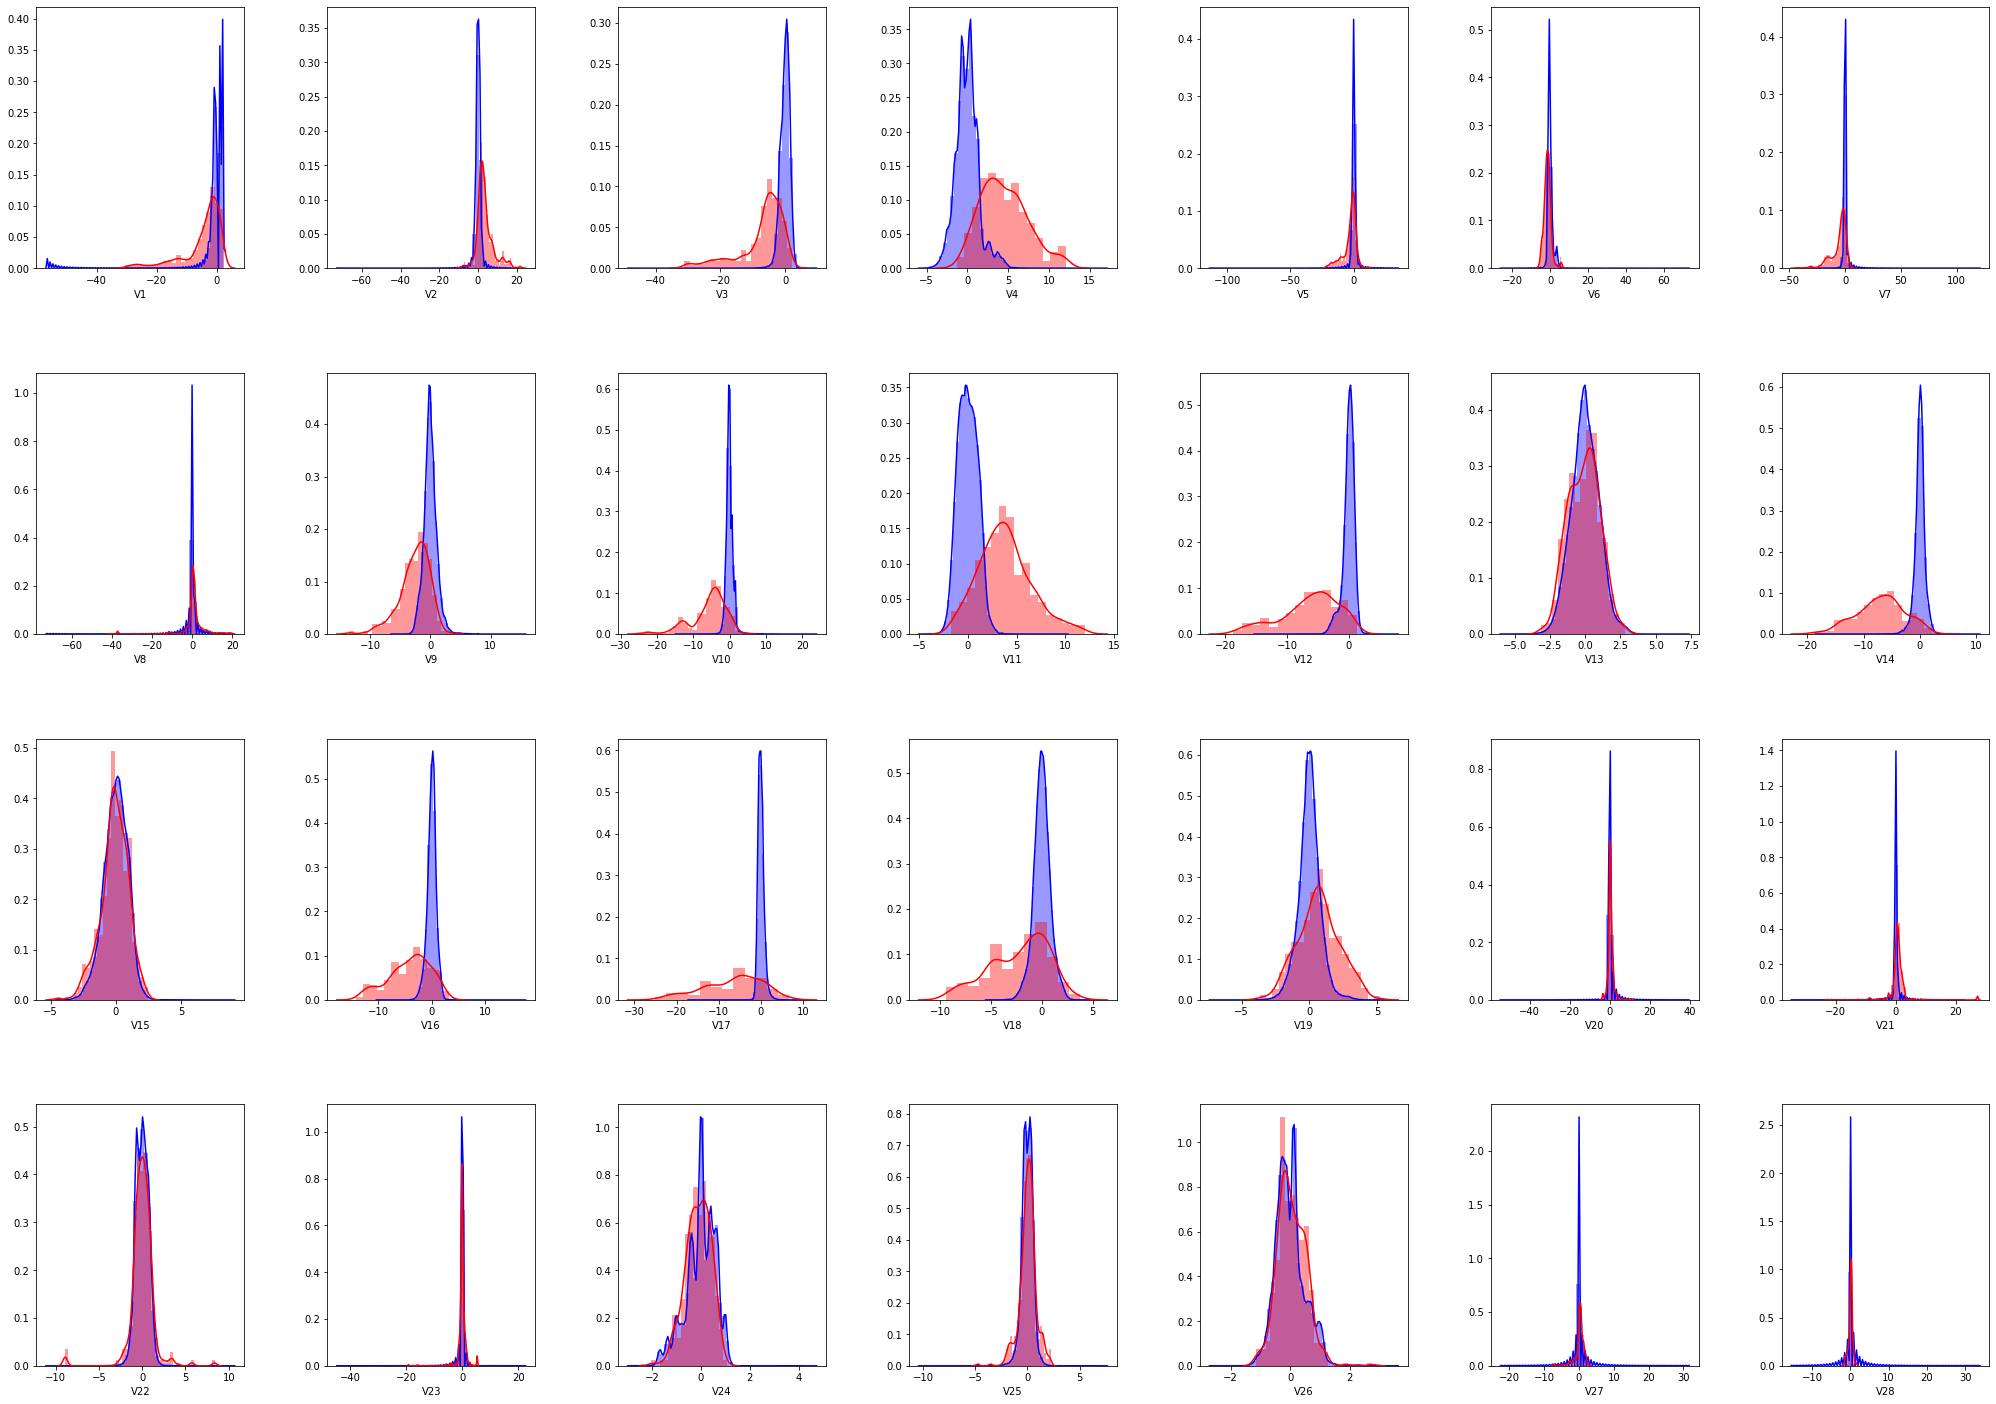

In [4]:
# plotting the histogram of all the variables for Class 1 and Class 0 seperately
fig = plt.figure(figsize=(35,25))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1, 29):
    plt.subplot(4,7,i)
    sns.distplot(df.loc[df['Class'] == 0]['V'+str(i)], color='blue')
    sns.distplot(df.loc[df['Class'] == 1]['V'+str(i)], color='red')


- From the above histogram plots we can see the variables ['V8', 'V13', 'V15', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28'] are not linearly seperable because the histogram of class 0 and class 1 are hugely overlapping for these variables

Here we will observe the distribution of our classes

In [5]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100
print("normal Share---"+str(normal_share))
print("fraud_share---"+str(fraud_share))

normal Share---99.82725143693798
fraud_share---0.1727485630620034


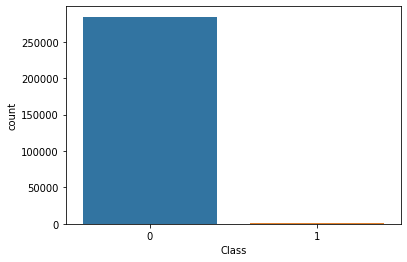

In [6]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations

sns.countplot(x='Class', data=df)
plt.show()

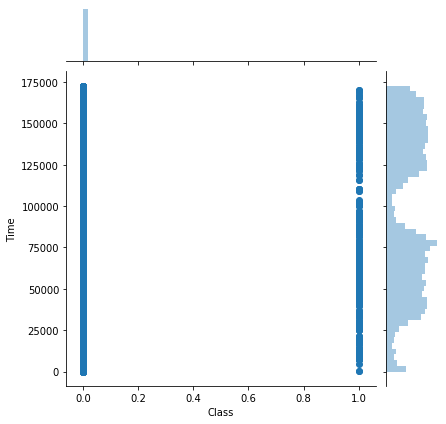

In [7]:
# Create a scatter plot to observe the distribution of classes with time
sns.jointplot('Class', 'Time', df)
plt.show()

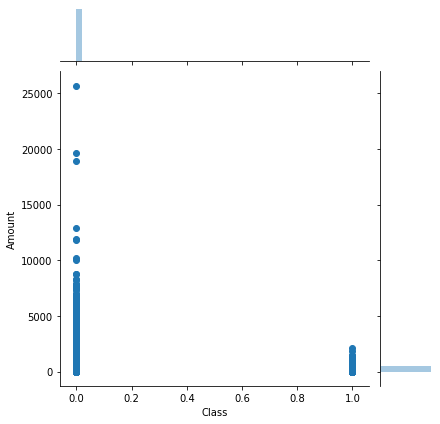

In [8]:
# Create a scatter plot to observe the distribution of classes with Amount
sns.jointplot('Class', 'Amount', df)
plt.show()

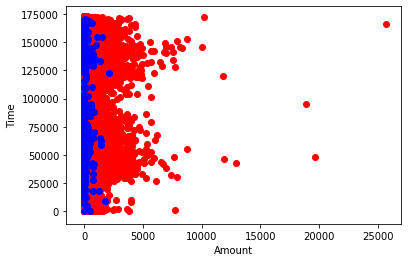

In [9]:
df_amount_0 = df.loc[df['Class'] == 0]
df_amount_1 = df.loc[df['Class'] == 1]
plt.scatter(df_amount_0['Amount'], df_amount_0['Time'], color='red')
plt.scatter(df_amount_1['Amount'], df_amount_1['Time'], color='blue')
plt.xlabel('Amount')
plt.ylabel('Time')
plt.show()

We are not able to see any relation between Time and Fraud Transactions. Here Time, is acting as a Serial no. Theirfore, Time is no use for this dataset.

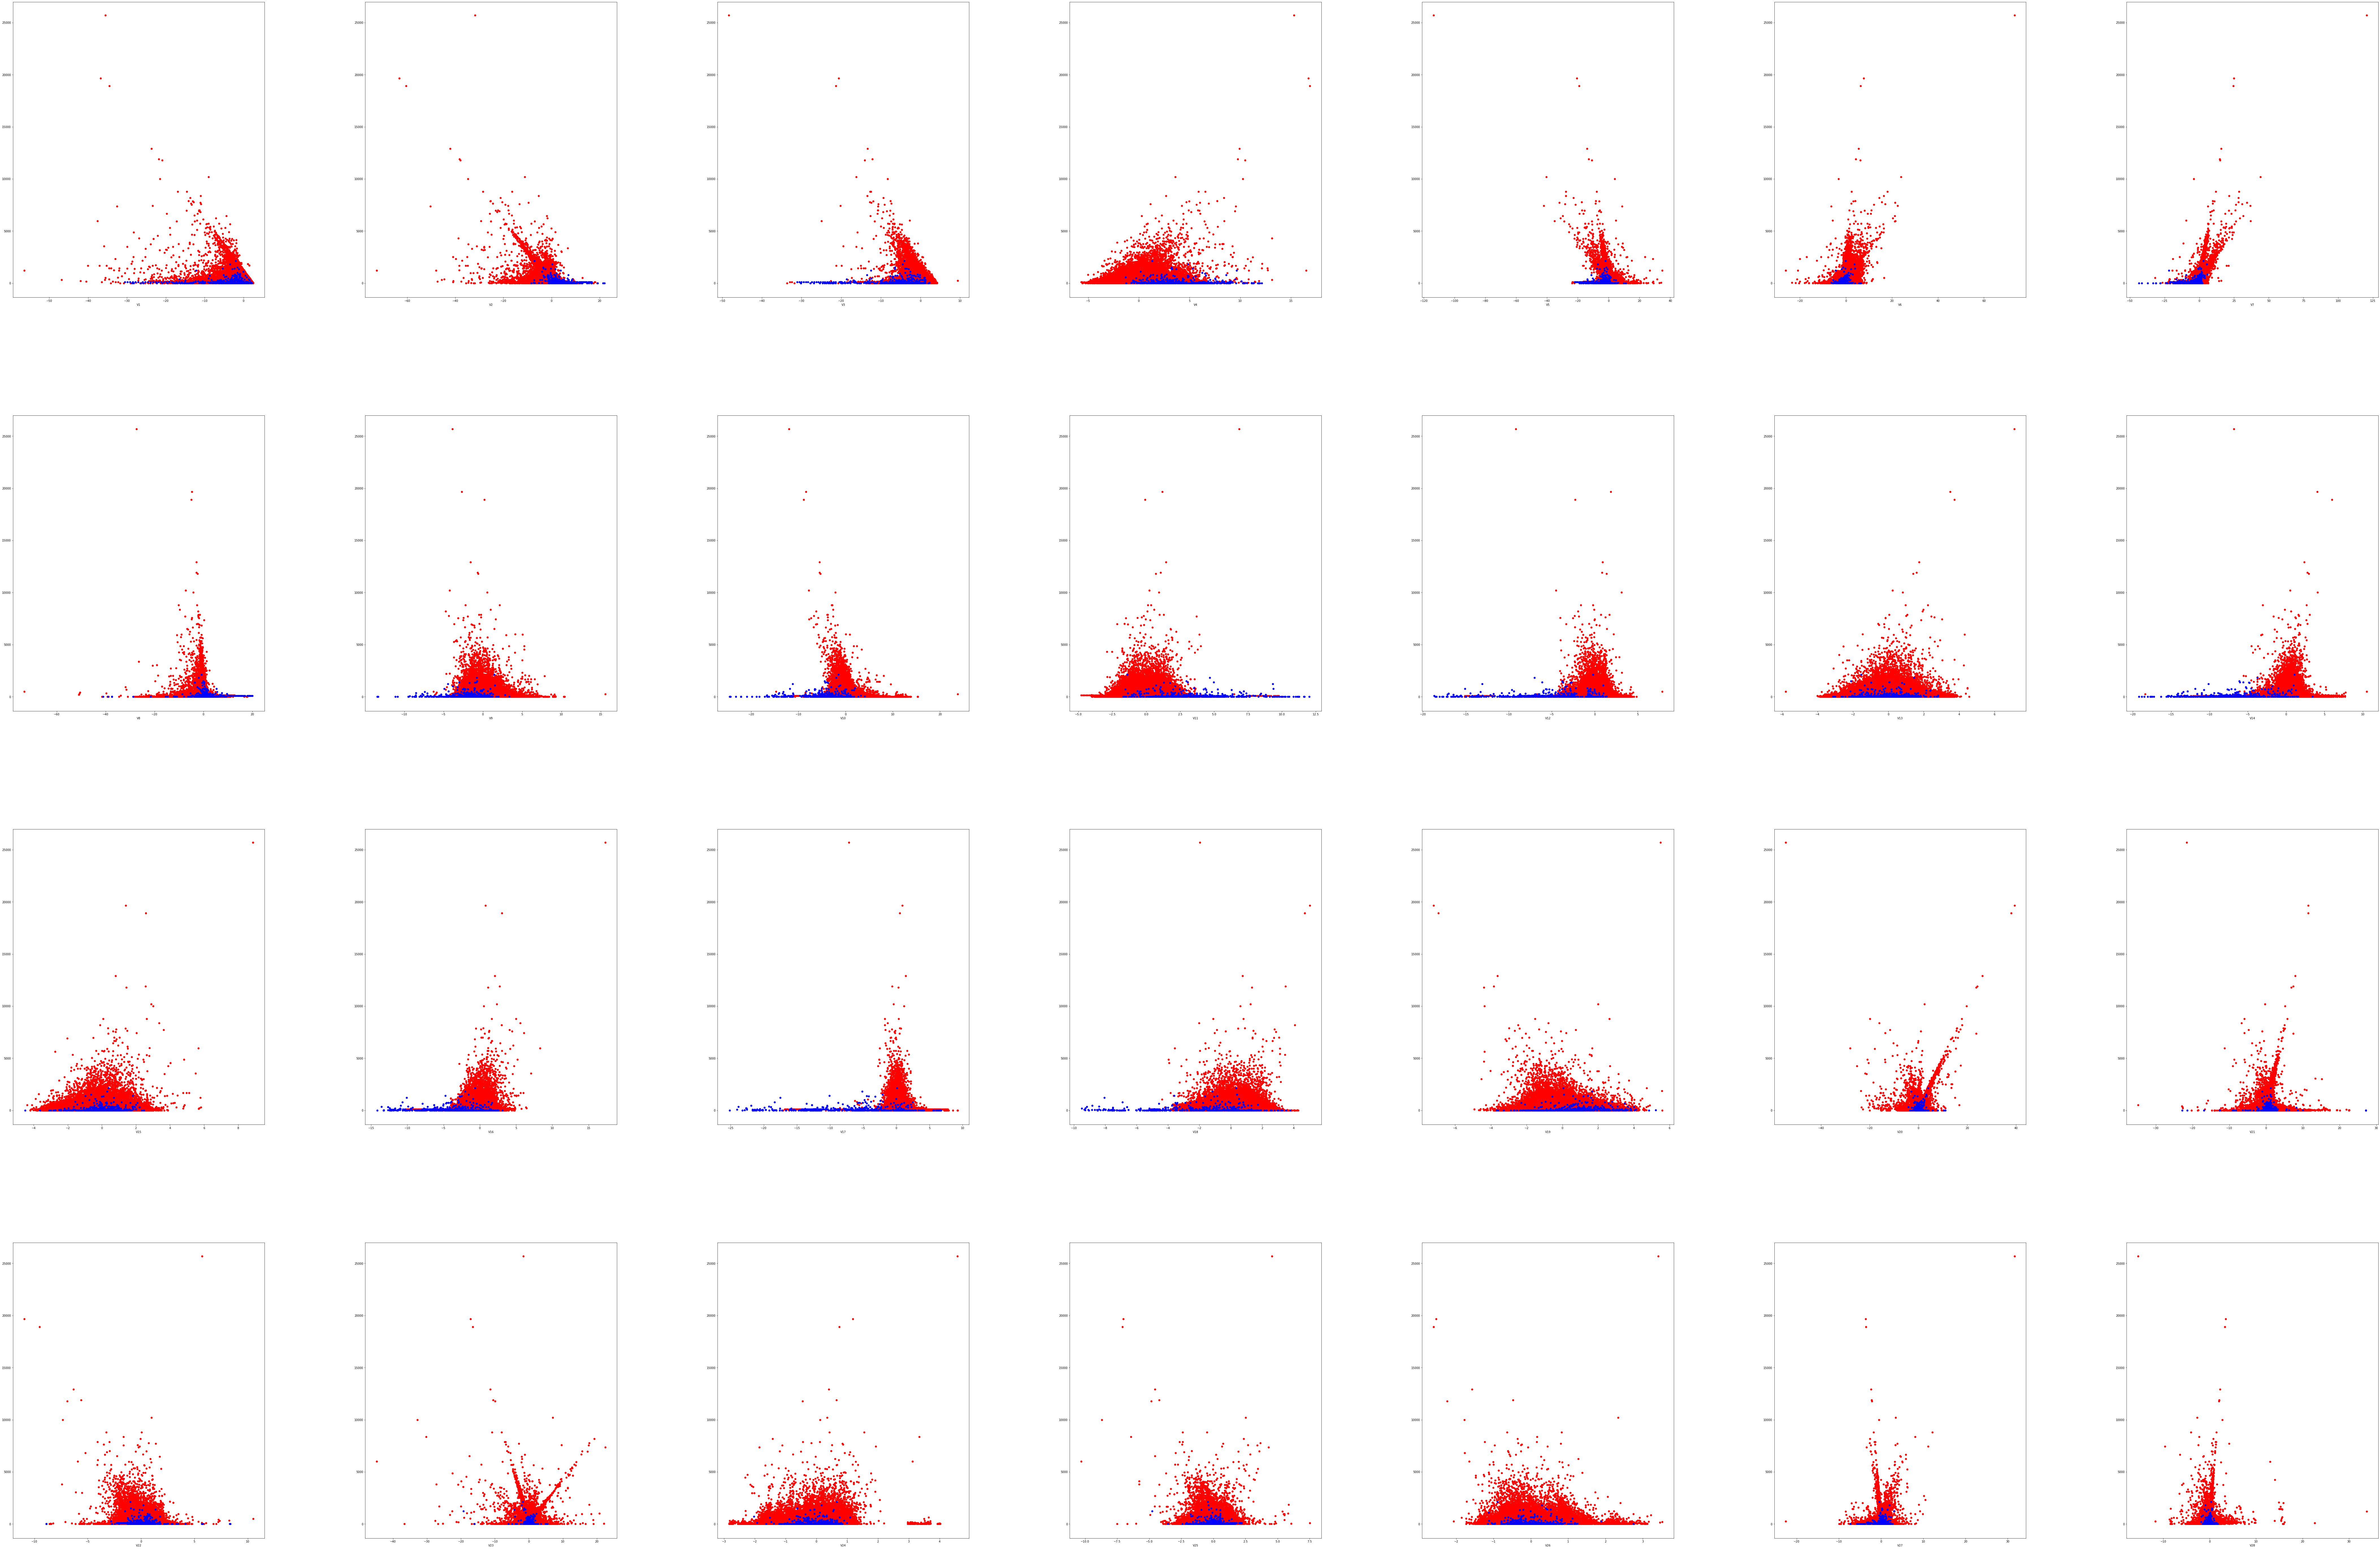

In [10]:
# Scatter plot of PCA transformed variables vs Amount.
fig = plt.figure(figsize=(150,100))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1, 29):
    ax = fig.add_subplot(4, 7, i)
    plt.scatter(df_amount_0["V"+str(i)], df_amount_0['Amount'],color='red')
    plt.scatter(df_amount_1["V"+str(i)], df_amount_1['Amount'],color='blue')    
    plt.xlabel("V"+str(i))

- From above plot we conclude that transaction with higher Amount are more likely to be fradulent Transaction

In [11]:
df.iloc[:, lambda df: df.columns.str.startswith('V')].columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28'],
      dtype='object')

##### Correlation Analysis

- Correlation of PCA variables with Amount

In [12]:
df_amount_1.loc[:, ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']].corr()

V1        V2        V3        V4        V5        V6        V7  \
V1      1.000000 -0.819226  0.907875 -0.562688  0.894968  0.223961  0.897609   
V2     -0.819226  1.000000 -0.876904  0.629688 -0.828391 -0.133373 -0.862983   
V3      0.907875 -0.876904  1.000000 -0.723766  0.883689  0.383930  0.882312   
V4     -0.562688  0.629688 -0.723766  1.000000 -0.550242 -0.310530 -0.678238   
V5      0.894968 -0.828391  0.883689 -0.550242  1.000000  0.198775  0.839738   
V6      0.223961 -0.133373  0.383930 -0.310530  0.198775  1.000000  0.151266   
V7      0.897609 -0.862983  0.882312 -0.678238  0.839738  0.151266  1.000000   
V8     -0.065787 -0.059535 -0.174837  0.099480 -0.207546 -0.743021  0.133989   
V9      0.631848 -0.684573  0.733208 -0.818853  0.658322  0.256004  0.754725   
V10     0.710112 -0.741085  0.818243 -0.726971  0.764589  0.301981  0.859823   
V11    -0.394137  0.506316 -0.597534  0.721682 -0.444932 -0.432451 -0.528746   
V12     0.481558 -0.571288  0.650644 -0.778764  0.565416  0.423068  0.634749   
V13    -0.119662  0.092512 -0.170573  0.196479 -0.213756 -0.237620 -0.073331   
V14     0.211217 -0.377940  0.442773 -0.643181  0.261163  0.480686  0.331426   
V15     0.159328 -0.251141  0.208485 -0.212530  0.115591 -0.108935  0.255876   
V16     0.555452 -0.533731  0.617902 -0.614529  0.663324  0.331128  0.681391   
V17     0.606831 -0.546153  0.633947 -0.605937  0.723799  0.323536  0.703087   
V18     0.646210 -0.562368  0.641160 -0.582288  0.745599  0.266725  0.731406   
V19    -0.257132  0.129530 -0.245012  0.232063 -0.393706 -0.181759 -0.302068   
V20    -0.296280  0.317072 -0.355431  0.306800 -0.314408 -0.068540 -0.391629   
V21     0.083158 -0.025126  0.127262 -0.179687  0.103431  0.096851  0.118698   
V22    -0.043392 -0.013726 -0.082243  0.196026 -0.112837  0.004450 -0.146239   
V23    -0.064715  0.199605 -0.053028  0.056657 -0.107258  0.441265 -0.119346   
V24    -0.195991  0.079638 -0.075581 -0.026260 -0.290589 -0.126380 -0.156862   
V25    -0.090328  0.139412 -0.102828 -0.086619 -0.098699 -0.190253  0.089469   
V26     0.133522 -0.054150  0.033203  0.236842  0.129076 -0.032648  0.084987   
V27     0.271335 -0.254623  0.193183 -0.114434  0.249589 -0.178559  0.326955   
V28     0.284370 -0.056688  0.247184 -0.232332  0.251549 -0.000370  0.245928   
Amount  0.048216 -0.272762  0.089994 -0.133795 -0.052031  0.228130  0.201334   

              V8        V9       V10       V11       V12       V13       V14  \
V1     -0.065787  0.631848  0.710112 -0.394137  0.481558 -0.119662  0.211217   
V2     -0.059535 -0.684573 -0.741085  0.506316 -0.571288  0.092512 -0.377940   
V3     -0.174837  0.733208  0.818243 -0.597534  0.650644 -0.170573  0.442773   
V4      0.099480 -0.818853 -0.726971  0.721682 -0.778764  0.196479 -0.643181   
V5     -0.207546  0.658322  0.764589 -0.444932  0.565416 -0.213756  0.261163   
V6     -0.743021  0.256004  0.301981 -0.432451  0.423068 -0.237620  0.480686   
V7      0.133989  0.754725  0.859823 -0.528746  0.634749 -0.073331  0.331426   
V8      1.000000 -0.058956 -0.021787  0.195576 -0.180089  0.378451 -0.223916   
V9     -0.058956  1.000000  0.863966 -0.612541  0.710584 -0.120863  0.525165   
V10    -0.021787  0.863966  1.000000 -0.717507  0.834331 -0.133375  0.583963   
V11     0.195576 -0.612541 -0.717507  1.000000 -0.889720  0.193956 -0.862044   
V12    -0.180089  0.710584  0.834331 -0.889720  1.000000 -0.225319  0.799822   
V13     0.378451 -0.120863 -0.133375  0.193956 -0.225319  1.000000 -0.119700   
V14    -0.223916  0.525165  0.583963 -0.862044  0.799822 -0.119700  1.000000   
V15     0.196214  0.201735  0.233131 -0.073477  0.112029 -0.038801 -0.046211   
V16    -0.179295  0.664103  0.806637 -0.754492  0.881703 -0.241316  0.657529   
V17    -0.231418  0.713887  0.803109 -0.702651  0.842796 -0.262332  0.588939   
V18    -0.183130  0.697095  0.786508 -0.621476  0.793753 -0.245034  0.498440   
V19     0.238125 -0.282247 -0.379002  0.377282 -0.446262  0.280309 -0.302687   
V20    -0.051

- Correlation of PCA variables with Class

In [13]:
df.loc[:, ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Class']].corr()

V1            V2            V3            V4            V5  \
V1     1.000000e+00  4.697350e-17 -1.424390e-15  1.755316e-17  6.391162e-17   
V2     4.697350e-17  1.000000e+00  2.512175e-16 -1.126388e-16 -2.039868e-16   
V3    -1.424390e-15  2.512175e-16  1.000000e+00 -3.416910e-16 -1.436514e-15   
V4     1.755316e-17 -1.126388e-16 -3.416910e-16  1.000000e+00 -1.940929e-15   
V5     6.391162e-17 -2.039868e-16 -1.436514e-15 -1.940929e-15  1.000000e+00   
V6     2.398071e-16  5.024680e-16  1.431581e-15 -2.712659e-16  7.926364e-16   
V7     1.991550e-15  3.966486e-16  2.168574e-15  1.556330e-16 -4.209851e-16   
V8    -9.490675e-17 -4.413984e-17  3.433113e-16  5.195643e-16  7.589187e-16   
V9     2.169581e-16 -5.728718e-17 -4.233770e-16  3.859585e-16  4.205206e-16   
V10    7.433820e-17 -4.782388e-16  6.289267e-16  6.055490e-16 -6.601716e-16   
V11    2.438580e-16  9.468995e-16 -5.501758e-17 -2.083600e-16  7.342759e-16   
V12    2.422086e-16 -6.588252e-16  2.206522e-16 -5.657963e-16  3.761033e-16   
V13   -2.115458e-16  3.854521e-16 -6.883375e-16 -1.506129e-16 -9.578659e-16   
V14    9.352582e-16 -2.541036e-16  4.271336e-16 -8.522435e-17 -3.634803e-16   
V15   -3.252451e-16  2.831060e-16  1.122756e-16 -1.507718e-16 -5.132620e-16   
V16    6.308789e-16  4.934097e-17  1.183364e-15 -6.939204e-16 -3.517076e-16   
V17   -5.011524e-16 -9.883008e-16  4.576619e-17 -4.397925e-16  1.425729e-16   
V18    2.870125e-16  2.636654e-16  5.427965e-16  1.493667e-16  1.109525e-15   
V19    1.818128e-16  9.528280e-17  2.576773e-16 -2.656938e-16 -3.138234e-16   
V20    1.036959e-16 -9.309954e-16 -9.429297e-16 -3.223123e-16  2.076048e-16   
V21   -1.755072e-16  8.444409e-17 -2.971969e-17 -9.976950e-17 -1.368701e-16   
V22    7.477367e-17  2.500830e-16  4.648259e-16  2.099922e-16  5.060029e-16   
V23    9.808705e-16  1.059562e-16  2.115206e-17  6.002528e-17  1.637596e-16   
V24    7.354269e-17 -8.142354e-18 -9.351637e-17  2.229738e-16 -9.286095e-16   
V25   -9.805358e-16 -4.261894e-17  4.771164e-16  5.394585e-16  5.625102e-16   
V26   -8.621897e-17  2.601622e-16  6.521501e-16 -6.179751e-16  9.144690e-16   
V27    3.208233e-17 -4.478472e-16  6.239832e-16 -6.403423e-17  4.465960e-16   
V28    9.820892e-16 -3.676415e-16  7.726948e-16 -5.863664e-17 -3.299167e-16   
Class -1.013473e-01  9.128865e-02 -1.929608e-01  1.334475e-01 -9.497430e-02   

                 V6            V7            V8            V9           V10  \
V1     2.398071e-16  1.991550e-15 -9.490675e-17  2.169581e-16  7.433820e-17   
V2     5.024680e-16  3.966486e-16 -4.413984e-17 -5.728718e-17 -4.782388e-16   
V3     1.431581e-15  2.168574e-15  3.433113e-16 -4.233770e-16  6.289267e-16   
V4    -2.712659e-16  1.556330e-16  5.195643e-16  3.859585e-16  6.055490e-16   
V5     7.926364e-16 -4.209851e-16  7.589187e-16  4.205206e-16 -6.601716e-16   
V6     1.000000e+00  1.429426e-16 -1.707421e-16  1.114447e-16  2.850776e-16   
V7     1.429426e-16  1.000000e+00 -8.691834e-17  7.933251e-16  3.043333e-17   
V8    -1.707421e-16 -8.691834e-17  1.000000e+00  2.900829e-16  9.051847e-17   
V9     1.114447e-16  7.933251e-16  2.900829e-16  1.000000e+00 -2.771761e-16   
V10    2.850776e-16  3.043333e-17  9.051847e-17 -2.771761e-16  1.000000e+00   
V11    4.865799e-16 -1.084105e-15  1.954747e-16  4.682341e-16  2.624448e-16   
V12    2.140589e-16  1.510045e-15 -6.266057e-17 -2.445230e-15  1.439907e-15   
V13   -2.268061e-16 -9.892325e-17 -2.382948e-16 -2.650351e-16 -8.853582e-16   
V14    3.452801e-16 -1.729462e-16 -1.131098e-16  2.343317e-16  2.622513e-16   
V15   -6.368111e-18  1.936832e-17  2.021491e-16 -1.588105e-15  7.615272e-16   
V16   -2.477917e-16  2.893672e-16  5.027192e-16 -3.251906e-16 -1.705923e-15   
V17    3.567582e-16  1.149692e-15 -3.508777e-16  6.535992e-16  3.674182e-15   
V18    2.811474e-16 -1.116789e-16 -4.093852e-16  1.203843e-16  3.986710e-16   
V19    2.717167e-16 -2.874017e-16 -5.339821e-16  1.120752e-16  2.663038e-17   
V20    1.898638e-16  1.744242e-16 -1.095534e-16 -4.340941e-16 -1.1

##### Skewness Analysis

In [14]:
# Checking the Skewness of each column
df.skew()

Time     -0.035568 
V1       -3.280667 
V2       -4.624866 
V3       -2.240155 
V4        0.676292 
V5       -2.425901 
V6        1.826581 
V7        2.553907 
V8       -8.521944 
V9        0.554680 
V10       1.187141 
V11       0.356506 
V12      -2.278401 
V13       0.065233 
V14      -1.995176 
V15      -0.308423 
V16      -1.100966 
V17      -3.844914 
V18      -0.259880 
V19       0.109192 
V20      -2.037155 
V21       3.592991 
V22      -0.213258 
V23      -5.875140 
V24      -0.552499 
V25      -0.415793 
V26       0.576693 
V27      -1.170209 
V28       11.192091
Amount    16.977724
Class     23.997579
dtype: float64

- Transforming the Skewed variables( value greater than 1) using Jeo-johnson Power Transformer

In [15]:
cols =  ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']
for col in cols:
    pt = PowerTransformer()
    pt.fit(df.loc[:, col].to_numpy().reshape(-1,1))
    df.loc[:, col] = pt.transform(df.loc[:, col].to_numpy().reshape(-1,1))

In [16]:
df_amount_0 = df.loc[df['Class'] == 0]
df_amount_1 = df.loc[df['Class'] == 1]

#### Histogram Plotting after Power Transformation

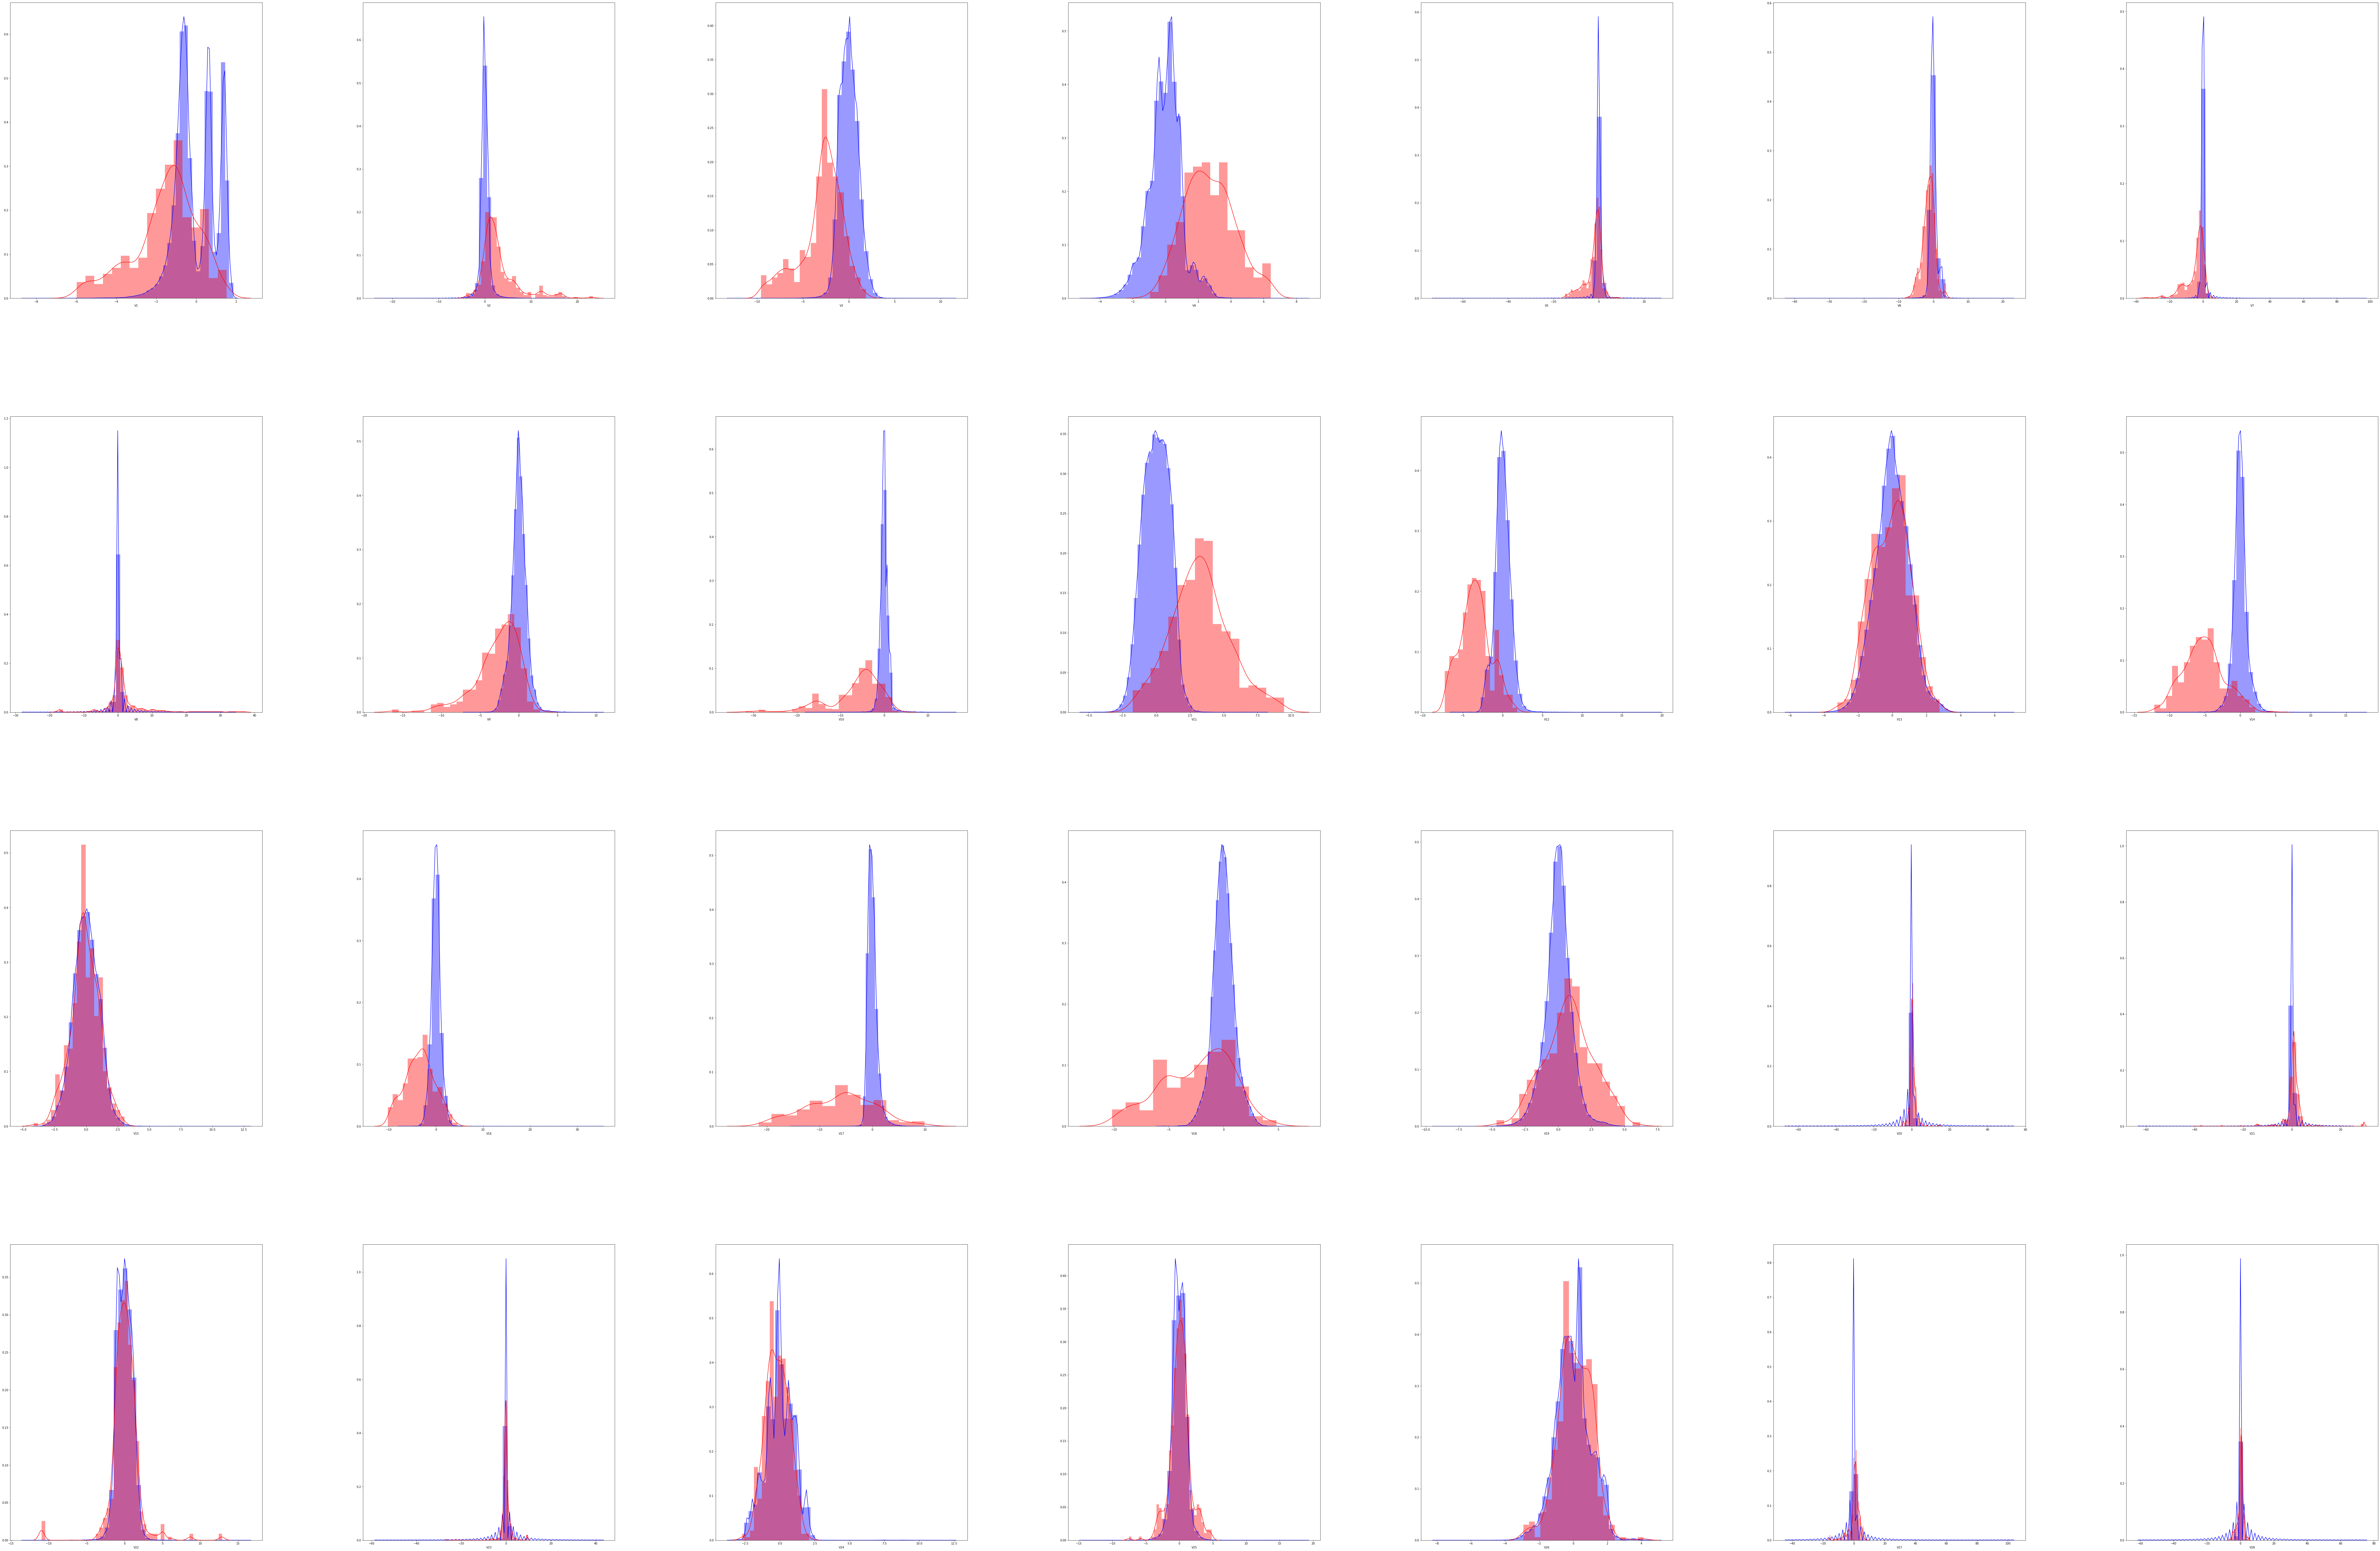

In [17]:
fig = plt.figure(figsize=(150,100))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1, 29):
    ax = fig.add_subplot(4, 7, i)
    sns.distplot(df[df['Class'] == 0]["V"+str(i)], color = 'blue')
    sns.distplot(df[df['Class'] == 1]["V"+str(i)], color = 'red')
    plt.xlabel("V"+str(i))

- Again after power transformation the variables - ['Time', 'V8', 'V13', 'V15', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28'] are not linearly seperable.

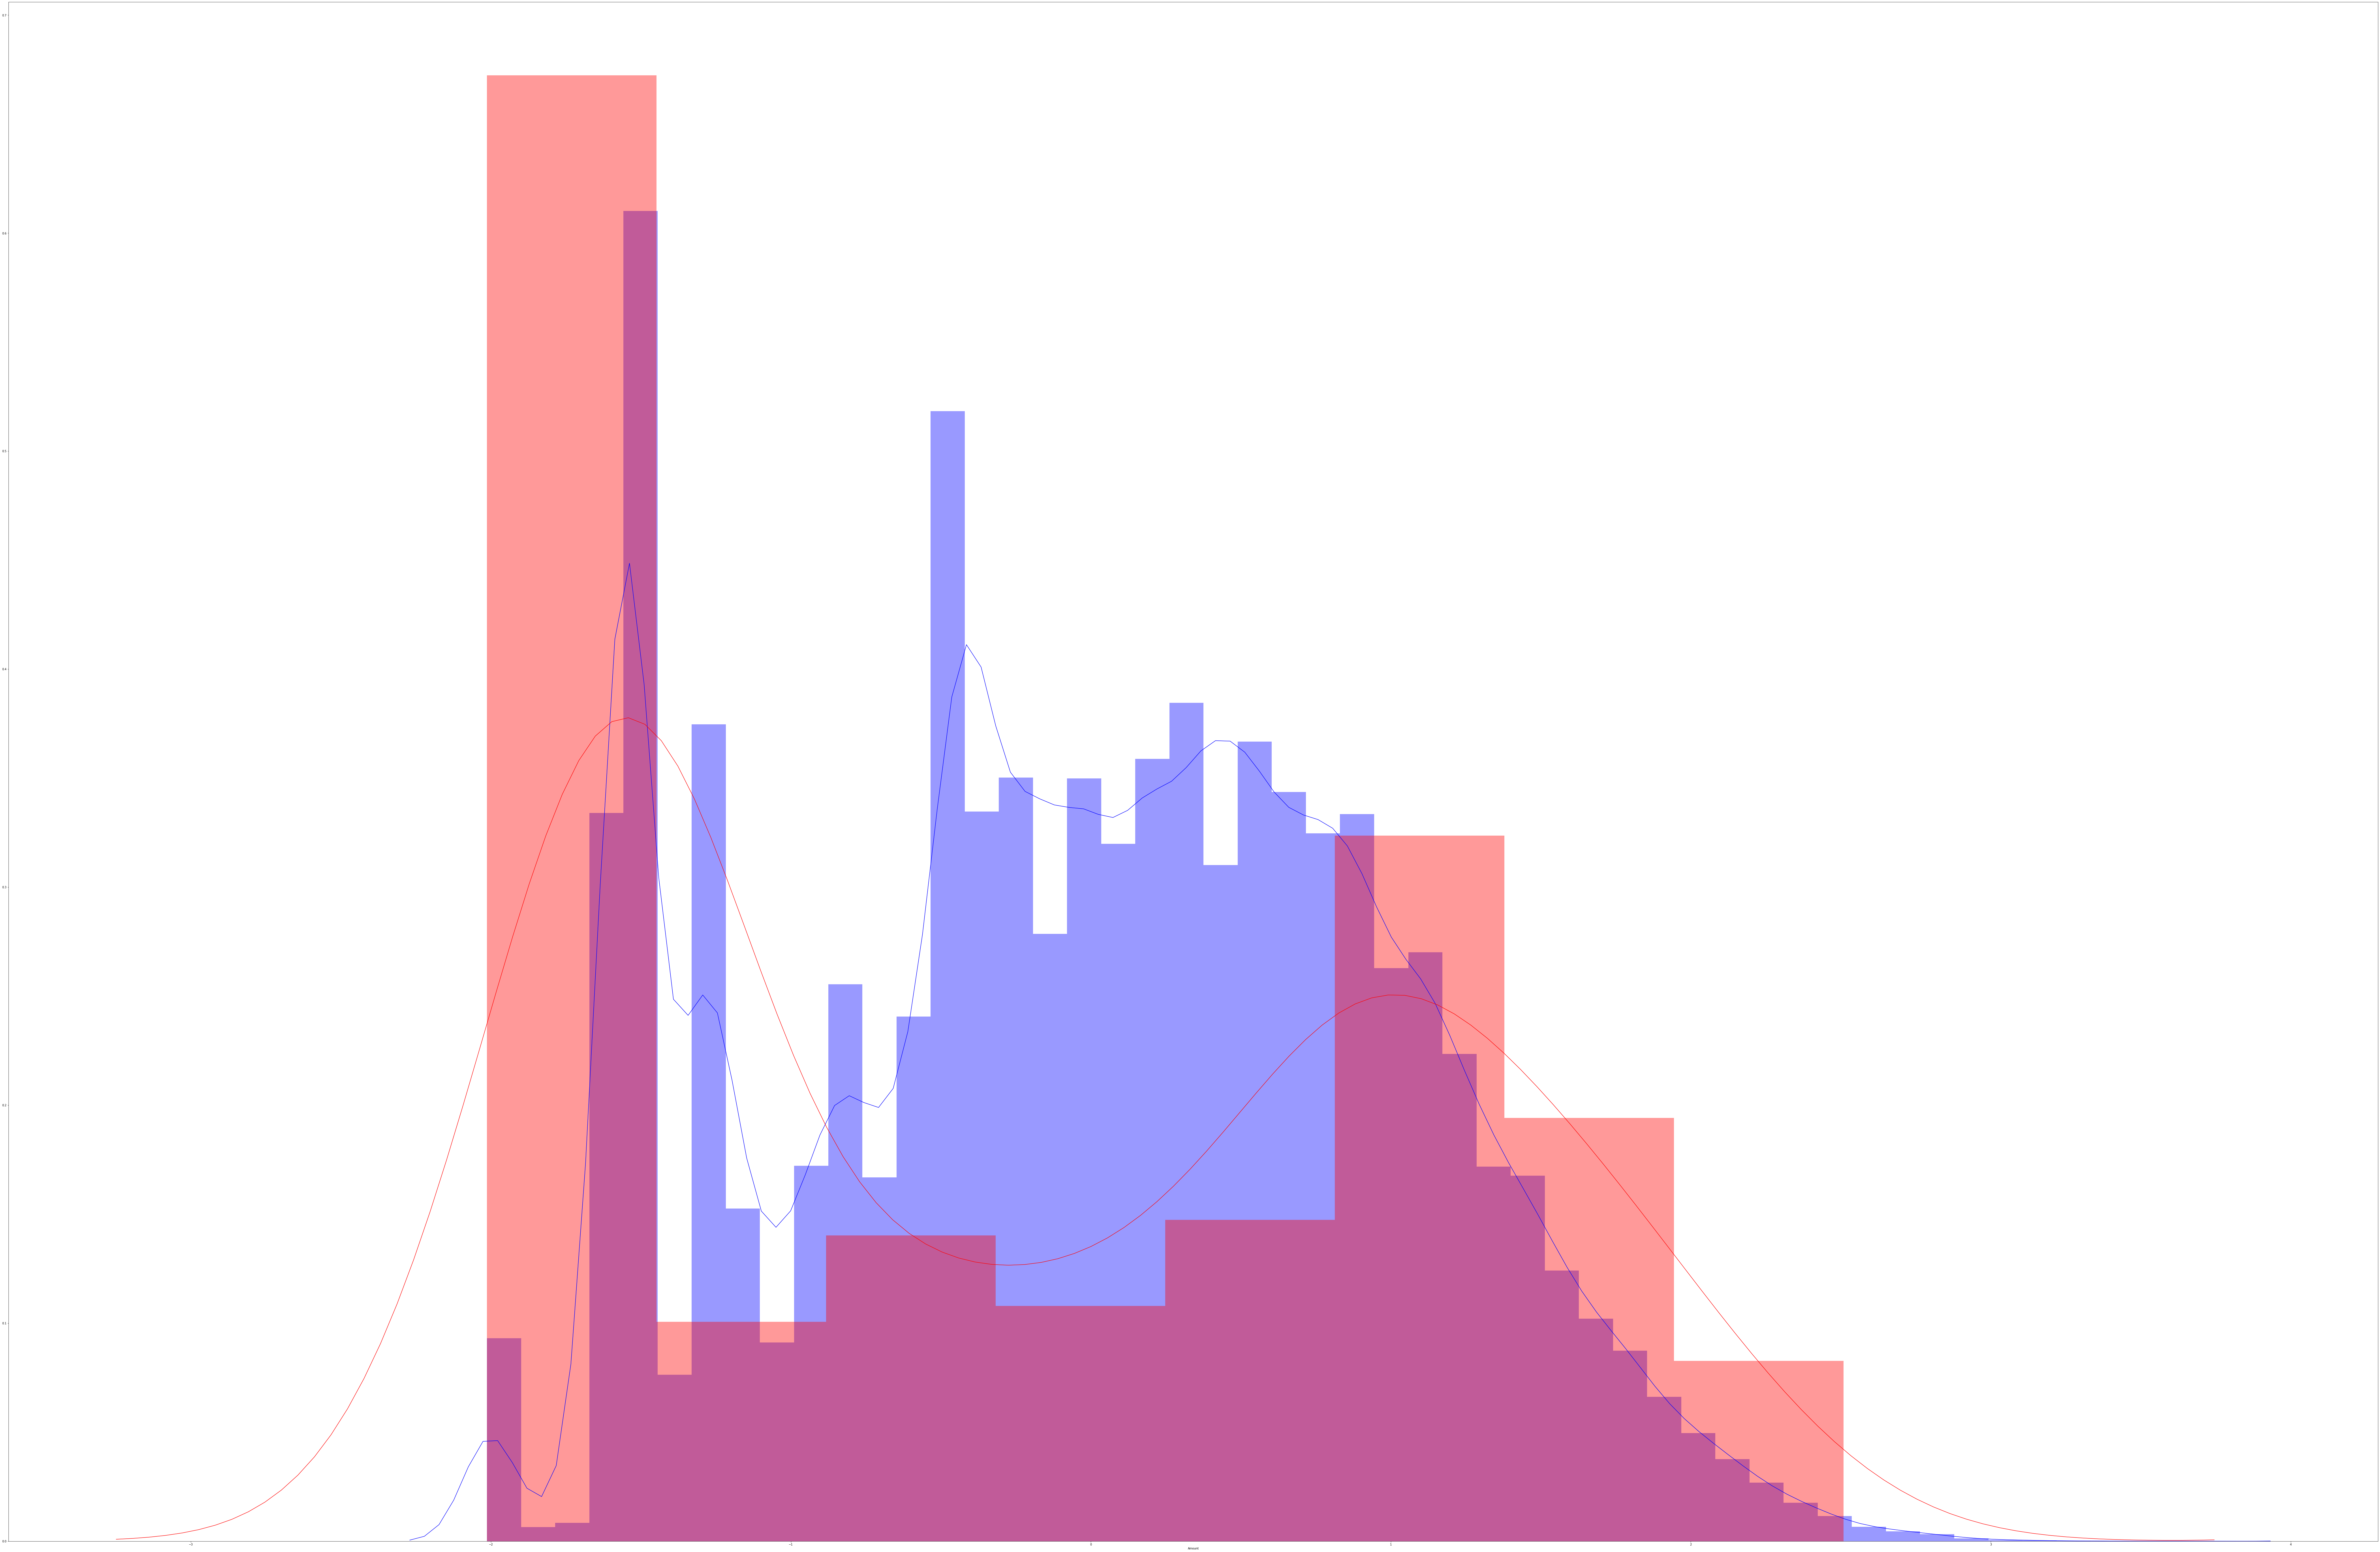

In [18]:
fig = plt.figure(figsize=(150,100))
sns.distplot(df[df['Class'] == 0]['Amount'], color = 'blue')
sns.distplot(df[df['Class'] == 1]['Amount'], color = 'red')
plt.show()

#### Skewness After Power Transform

In [19]:
df.skew() # Analysing the skewness after power transform

Time     -0.035568 
V1       -0.218003 
V2        0.334852 
V3       -0.079980 
V4        0.018930 
V5       -1.170100 
V6       -1.937469 
V7        2.594575 
V8        2.297590 
V9       -0.048343 
V10      -1.318334 
V11       0.060890 
V12       0.158932 
V13       0.006133 
V14       0.105966 
V15       0.013157 
V16       0.137437 
V17      -0.791141 
V18      -0.059630 
V19       0.015231 
V20      -0.923653 
V21      -1.966863 
V22      -0.025686 
V23      -0.249209 
V24       0.112492 
V25       0.077895 
V26      -0.024102 
V27       3.465031 
V28       1.069193 
Amount    0.018354 
Class     23.997579
dtype: float64

In [20]:
df.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0  0.0  -0.904815 -0.131503  2.176074  0.983588 -0.256110  0.459227  0.193516   
1  0.0   0.626390  0.093067 -0.035062  0.387928  0.031947  0.045846 -0.063874   
2  1.0  -0.904242 -0.871858  1.381297  0.341811 -0.374492  1.320901  0.639714   
3  1.0  -0.742857 -0.202760  1.401049 -0.581136 -0.019151  0.983351  0.191907   
4  2.0  -0.823641  0.530197  1.160592  0.357540 -0.305614  0.187360  0.479194   

         V8        V9       V10       V11       V12       V13       V14  \
0  0.020305  0.380443  0.127074 -0.513088 -0.774671 -0.997398 -0.404755   
1  0.006711 -0.184488 -0.115195  1.523934  1.296242  0.498814 -0.232720   
2  0.172348 -1.453859  0.234324  0.640742 -0.104954  0.724952 -0.255865   
3  0.309141 -1.319689 -0.008922 -0.179270  0.026987  0.517344 -0.381222   
4 -0.331706  0.769520  0.718432 -0.798770  0.496185  1.343525 -1.168769   

        V15       V16       V17       V18       V19       V20       V21  \
0  1.711206 -0.600774  0.215544  0.009991  0.503467  0.323559 -0.007670   
1  0.674890  0.491958 -0.175639 -0.238612 -0.169496 -0.093203 -0.298760   
2  2.872435 -2.809663  1.383126 -0.165261 -2.838493  0.680896  0.357879   
3 -0.720269 -1.194700 -0.829186  2.435570 -1.528799 -0.273184 -0.133275   
4  0.138162 -0.580731 -0.319406 -0.066425  0.986458  0.528646  0.004660   

        V22       V23       V24       V25       V26       V27       V28  \
0  0.366644 -0.189647  0.015102  0.211929 -0.323884  0.323027 -0.053332   
1 -0.884170  0.153342 -0.637483  0.288440  0.353130 -0.035793  0.057491   
2  1.069496  1.501808 -1.133450 -0.653607 -0.209953 -0.151417 -0.173752   
3 -0.013060 -0.317680 -1.756645  1.276336 -0.399896  0.144087  0.201524   
4  1.107811 -0.232990  0.145885 -0.429239  1.053668  0.541488  0.669838   

     Amount  Class  
0  1.119013  0      
1 -1.128464  0      
2  1.623286  0      
3  1.012504  0      
4  0.692981  0

#### Dropping Unnecessary Columns

In [21]:
# Drop unnecessary columns
# Dropping the columns which are not linearly seperable in histogram
drop_cols = ['Time', 'V8', 'V13', 'V15', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']
df.drop(drop_cols, axis=1, inplace = True)

In [22]:
df.head()

V1        V2        V3        V4        V5        V6        V7  \
0 -0.904815 -0.131503  2.176074  0.983588 -0.256110  0.459227  0.193516   
1  0.626390  0.093067 -0.035062  0.387928  0.031947  0.045846 -0.063874   
2 -0.904242 -0.871858  1.381297  0.341811 -0.374492  1.320901  0.639714   
3 -0.742857 -0.202760  1.401049 -0.581136 -0.019151  0.983351  0.191907   
4 -0.823641  0.530197  1.160592  0.357540 -0.305614  0.187360  0.479194   

         V9       V10       V11       V12       V14       V16       V17  \
0  0.380443  0.127074 -0.513088 -0.774671 -0.404755 -0.600774  0.215544   
1 -0.184488 -0.115195  1.523934  1.296242 -0.232720  0.491958 -0.175639   
2 -1.453859  0.234324  0.640742 -0.104954 -0.255865 -2.809663  1.383126   
3 -1.319689 -0.008922 -0.179270  0.026987 -0.381222 -1.194700 -0.829186   
4  0.769520  0.718432 -0.798770  0.496185 -1.168769 -0.580731 -0.319406   

        V18       V19    Amount  Class  
0  0.009991  0.503467  1.119013  0      
1 -0.238612 -0.169496 -1.128464  0      
2 -0.165261 -2.838493  1.623286  0      
3  2.435570 -1.528799  1.012504  0      
4 -0.066425  0.986458  0.692981  0

In [23]:
df.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V9', 'V10', 'V11', 'V12',
       'V14', 'V16', 'V17', 'V18', 'V19', 'Amount', 'Class'],
      dtype='object')

### Splitting the data into Target & Training data

In [24]:
y= df.loc[:, 'Class']#class variable
X = df.loc[:, ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V9', 'V10', 'V11', 'V12',
       'V14', 'V16', 'V17', 'V18', 'V19', 'Amount']]

## Model Building
#### 1. Logistic Regression

- Hyperparameter Tuning with K = 2 

In [314]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression #import the package
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
#from sklearn.feature_selection import RFE

num_C = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.02, 0.07, 0.1, 0.25]  #--> list of values
cv_num =  [2, 5, 7] #--> list of values
# creating a KFold object with num_split 
folds = StratifiedKFold(n_splits = cv_num[0], shuffle = True, random_state = 100)
LR = LogisticRegression(warm_start = True, n_jobs= -1,max_iter= 1000, solver = 'saga')
# specify range of hyperparameters
hyper_params = [{'C' : num_C}]
rsearch_cv = RandomizedSearchCV(estimator=LR, 
                                param_distributions=hyper_params, 
                                cv=folds, scoring=['roc_auc', 'recall', 'accuracy', 'f1'],
                                verbose=5,
                                n_jobs=-1,
                                random_state=200, return_train_score = True, refit = 'f1')
rsearch_cv.fit(X, y)


C:\Users\My Pc\Anaconda3 2020\lib\site-packages\sklearn\model_selection\_search.py:281: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


Fitting 2 folds for each of 9 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done  15 out of  18 | elapsed:  4.7min remaining:   56.3s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:  5.4min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=2, random_state=100, shuffle=True),
                   error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=1000,
                                                multi_class='auto', n_jobs=-1,
                                                penalty='l2', random_state=None,
                                                solver='saga', tol=0.0001,
                                                verbose=0, warm_start=True),
                   iid='deprecated', n_iter=10, n_jobs=-1,
                   param_distributions=[{'C': [0.0001, 0.0005, 0.001, 0.005,
                                               0.01, 0.02, 0.07, 0.1, 0.25]}],
                   pre_dispatch='2*n_jobs', random_st

- Grid Search Results for K = 2 Folds 

In [ ]:
model1 = pd.DataFrame(rsearch_cv.cv_results_)
pd.DataFrame(rsearch_cv.cv_results_)

` We Choose F1 score as the ranking measure because we want a Higher Recall. Also, Precision and recall should not have a big gap in their values. Hence, F1 Score is abt for model Selection`

- Best Estimator for K = 2 

In [317]:
model1_estimator = rsearch_cv.best_estimator_
model1_estimator

LogisticRegression(C=0.25, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=-1, penalty='l2',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=True)

- Hyperparameter Tuning With K = 5 Folds 

In [318]:
# creating a KFold object with num_split 
folds = StratifiedKFold(n_splits = cv_num[1], shuffle = True, random_state = 100)
LR = LogisticRegression(warm_start = True, n_jobs= -1,max_iter= 1000, solver = 'saga')
# specify range of hyperparameters
hyper_params = [{'C' : num_C}]
rsearch_cv = RandomizedSearchCV(estimator=LR, 
                                param_distributions=hyper_params, 
                                cv=folds, scoring= ['roc_auc', 'recall', 'accuracy', 'f1'],
                                verbose=5,
                                n_jobs=-1,
                                random_state=200, return_train_score = True, refit = 'f1')
rsearch_cv.fit(X, y)

C:\Users\My Pc\Anaconda3 2020\lib\site-packages\sklearn\model_selection\_search.py:281: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed: 13.7min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=100, shuffle=True),
                   error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=1000,
                                                multi_class='auto', n_jobs=-1,
                                                penalty='l2', random_state=None,
                                                solver='saga', tol=0.0001,
                                                verbose=0, warm_start=True),
                   iid='deprecated', n_iter=10, n_jobs=-1,
                   param_distributions=[{'C': [0.0001, 0.0005, 0.001, 0.005,
                                               0.01, 0.02, 0.07, 0.1, 0.25]}],
                   pre_dispatch='2*n_jobs', random_st

- Grid Search Results for K = 5

In [319]:
model2 = pd.DataFrame(rsearch_cv.cv_results_)
model2

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0      23.428285      7.372229         0.099975        0.018745  0.0001   
1      34.660181     11.260009         0.080508        0.004803  0.0005   
2      37.664762     11.316987         0.084355        0.007653   0.001   
3      54.465931     16.651713         0.085636        0.015068   0.005   
4      65.469313     21.336566         0.095534        0.016626    0.01   
5      80.666467     25.827090         0.092100        0.021061    0.02   
6     104.044610     33.289535         0.113958        0.017797    0.07   
7     109.429260     35.105576         0.110378        0.037289     0.1   
8      98.921986     35.819713         0.080519        0.024050    0.25   

          params  split0_test_roc_auc  split1_test_roc_auc  \
0  {'C': 0.0001}             0.985411             0.972535   
1  {'C': 0.0005}             0.989458             0.981854   
2   {'C': 0.001}             0.989838             0.984438   
3   {'C': 0.005}             0.989321             0.987525   
4    {'C': 0.01}             0.988337             0.988163   
5    {'C': 0.02}             0.987297             0.988542   
6    {'C': 0.07}             0.986022             0.988601   
7     {'C': 0.1}             0.985820             0.988594   
8    {'C': 0.25}             0.985516             0.988543   

   split2_test_roc_auc  split3_test_roc_auc  split4_test_roc_auc  \
0             0.958178             0.954723             0.948225   
1             0.970248             0.960051             0.967452   
2             0.972429             0.960301             0.973342   
3             0.972017             0.962827             0.979215   
4             0.970224             0.963700             0.979931   
5             0.967943             0.964096             0.979598   
6             0.964842             0.964213             0.978387   
7             0.964312             0.964171             0.978115   
8             0.963529             0.964089             0.977683   

   mean_test_roc_auc  std_test_roc_auc  rank_test_roc_auc  \
0           0.963814          0.013416                  9   
1           0.973813          0.010507                  8   
2           0.976069          0.010285                  6   
3           0.978181          0.009861                  1   
4           0.978071          0.009786                  2   
5           0.977495          0.009933                  3   
6           0.976413          0.010271                  4   
7           0.976202          0.010352                  5   
8           0.975872          0.010469                  7   

   split0_train_roc_auc  split1_train_roc_auc  split2_train_roc_auc  ...  \
0              0.960725              0.962064              0.964572  ...   
1              0.971211              0.971986              0.974699  ...   
2              0.973684              0.974024              0.977090  ...   
3              0.976303              0.976443              0.980191  ...   
4              0.976467              0.976472              0.980795  ...   
5              0.976190              0.975969              0.980919  ...   
6              0.975555              0.975000              0.980635  ...   
7              0.975431              0.974812              0.980548  ...   
8              0.975231              0.974503              0.980402  ...   

   mean_train_accuracy  std_train_accuracy  split0_test_f1  split1_test_f1  \
0             0.998553            0.000026        0.384000        0.338710   
1             0.998826            0.000051        0.579310        0.447761   
2             0.998985            0.000052        0.670968        0.535211   
3             0.999158            0.000052        0.728395        0.649351   
4             0.999185            0.000058        0.728395        0.675159   
5             0.999205            0.000055        0.739394        0.700000   
6             0.999216          

- Best Estimator For K = 5

` We Choose F1 score as the ranking measure because we want a Higher Recall. Also, Precision and recall should not have a big gap in their values. Hence, F1 Score is abt for model Selection`

In [320]:
model2_estimator = rsearch_cv.best_estimator_
model2_estimator

LogisticRegression(C=0.07, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=-1, penalty='l2',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=True)

- Grid Search for K = 7 Folds

In [321]:
num_C = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.02, 0.07, 0.1, 0.25, 0.40] 
# creating a KFold object with num_split 
folds = StratifiedKFold(n_splits = cv_num[2], shuffle = True, random_state = 100)
LR = LogisticRegression(warm_start = True, n_jobs= -1,max_iter= 1000, solver = 'saga')
# specify range of hyperparameters
hyper_params = [{'C' : num_C}]
rsearch_cv = RandomizedSearchCV(estimator=LR, 
                                param_distributions=hyper_params, 
                                cv=folds, scoring= ['roc_auc', 'recall', 'accuracy', 'f1'],
                                verbose=5,
                                n_jobs=-1,
                                random_state=200, return_train_score = True, refit = 'f1')
rsearch_cv.fit(X, y)

Fitting 7 folds for each of 10 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed: 21.6min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=7, random_state=100, shuffle=True),
                   error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=1000,
                                                multi_class='auto', n_jobs=-1,
                                                penalty='l2', random_state=None,
                                                solver='saga', tol=0.0001,
                                                verbose=0, warm_start=True),
                   iid='deprecated', n_iter=10, n_jobs=-1,
                   param_distributions=[{'C': [0.0001, 0.0005, 0.001, 0.005,
                                               0.01, 0.02, 0.07, 0.1, 0.25,
                                               0.4]}],
 

- Grid Search Results for k = 7 folds

In [322]:
model3 = pd.DataFrame(rsearch_cv.cv_results_)

In [323]:
model3

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0      25.035344      6.909450         0.064718        0.017572  0.0001   
1      37.477570     10.370833         0.064718        0.015461  0.0005   
2      41.414887     10.396201         0.049097        0.005466   0.001   
3      57.277192     14.471495         0.053560        0.007731   0.005   
4      69.889790     18.137832         0.053548        0.007718    0.01   
5      83.613736     22.120067         0.069450        0.018760    0.02   
6      97.754258     24.766713         0.080340        0.031716    0.07   
7      99.277599     25.374460         0.056108        0.011155     0.1   
8     105.104557     26.516163         0.060255        0.013013    0.25   
9     101.666939     26.254735         0.057988        0.023233     0.4   

          params  split0_test_roc_auc  split1_test_roc_auc  \
0  {'C': 0.0001}             0.983463             0.974343   
1  {'C': 0.0005}             0.987028             0.981509   
2   {'C': 0.001}             0.987189             0.984241   
3   {'C': 0.005}             0.985928             0.986529   
4    {'C': 0.01}             0.984419             0.987227   
5    {'C': 0.02}             0.982973             0.987776   
6    {'C': 0.07}             0.981257             0.988209   
7     {'C': 0.1}             0.980974             0.988274   
8    {'C': 0.25}             0.980574             0.988365   
9     {'C': 0.4}             0.980458             0.988390   

   split2_test_roc_auc  split3_test_roc_auc  split4_test_roc_auc  \
0             0.968084             0.980597             0.926846   
1             0.978299             0.989381             0.932679   
2             0.980413             0.989786             0.933207   
3             0.982617             0.988315             0.935100   
4             0.983033             0.986450             0.934927   
5             0.983094             0.984252             0.934165   
6             0.982862             0.981393             0.932475   
7             0.982784             0.980941             0.932156   
8             0.982642             0.980291             0.931638   
9             0.982612             0.980121             0.931501   

   split5_test_roc_auc  split6_test_roc_auc  mean_test_roc_auc  \
0             0.978378             0.940783           0.964642   
1             0.986369             0.963846           0.974159   
2             0.987176             0.971517           0.976218   
3             0.989266             0.978878           0.978091   
4             0.990118             0.979097           0.977896   
5             0.990480             0.978223           0.977281   
6             0.990565             0.976271           0.976147   
7             0.990552             0.975875           0.975937   
8             0.990529             0.975272           0.975616   
9             0.990520             0.975115           0.975531   

   std_test_roc_auc  rank_test_roc_auc  split0_train_roc_auc  ...  \
0          0.020358                 10              0.963313  ...   
1          0.018687                  9              0.973119  ...   
2          0.018433                  4              0.975355  ...   
3          0.017854                  1              0.977703  ...   
4          0.017834                  2              0.977793  ...   
5          0.017964                  3              0.977458  ...   
6          0.018359                  5              0.976785  ...   
7          0.018438                  6              0.976660  ...   
8          0.018574                  7              0.976451  ...   
9          0.018610                  8              0.976391  ...   

   split2_test_f1  split3_test_f1  split4_test_f1  split5_test_f1  \
0        0.321839        0.239130        0.279070        0.387097   
1        0.442105        0.454545        0.560748        0.612613   
2        0.534653        0.547009        0.694915  

- Best estimator for K = 7 folds based on F1 score

In [324]:
model3_estimator = rsearch_cv.best_estimator_

In [325]:
model3_estimator

LogisticRegression(C=0.25, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=-1, penalty='l2',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=True)

- Best Parameter for K= 7 folds 

In [326]:
rsearch_cv.best_params_

{'C': 0.25}

Based on the above data we find the following Parameters Suitable for Final model building for Logistic Regression:

- K = 7 and C = 0.25

##### Evaluation Metrics
- Building the Classification model with tuned parameters and finding AUC, Precision, Recall and F1 score for the model :

In [ ]:
# Finding AUC, Precision, Recall, F1 score for the model

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y, 
                                                    test_size=0.2) # evaluation of results 
clf = LogisticRegression(C=0.25, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=-1, penalty='l2',
                   random_state=150, solver='saga', tol=0.0001, verbose=0,
                   warm_start=True).fit(X_train, y_train)

- Predicted Probability for Class 0 and Class 1 

In [328]:
X_train[['Predicted_Prob0','Predicted_Prob1']] = pd.DataFrame(clf.predict_proba(X_train).tolist(), index= X_train.index)

C:\Users\My Pc\Anaconda3 2020\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


- Classifiers Coefficient for Logistic Regression

In [372]:
clf.coef_

array([[-0.10942231, -0.2110643 , -0.22138043,  0.66928162,  0.17984533,
         0.18808746, -0.02918086, -0.14817477, -0.14291647,  0.1445399 ,
        -0.73583126, -0.7722524 , -0.43840439,  0.0158987 ,  0.09622356,
        -0.11468852,  0.00263948]])

- Based On the Above Data we find the following three variables are top 3 contributor for Fraud Detection as per Logistic Regression
   1. V14 
   2. V12 
   3. V4

- Plotting the ROC curve and F1 score 

In [329]:
X_train['Actual_Class'] = y_train
X_train.head()

C:\Users\My Pc\Anaconda3 2020\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


V1        V2        V3        V4        V5        V6        V7  \
24027   0.494656  0.173019  0.406492  1.521322  0.080062  0.630482 -0.146433   
45015   0.286323 -0.394085 -0.364881  1.035298 -0.173252 -0.312471  0.493055   
175548  1.335126 -0.431132 -0.560179  0.008088 -0.185014  0.414871 -0.562495   
177705  1.188243 -0.172754 -0.680698  1.769401  1.434905  2.941500 -1.113197   
154080  1.324400 -0.402907 -0.048809  0.341699 -0.594579  0.208451 -0.895965   

              V9       V10       V11       V12       V14       V16       V17  \
24027  -0.795084  0.734899  1.447114  0.266992  0.751594  0.436284 -0.378093   
45015   0.174944 -0.058830 -1.168309 -0.289285  0.344887 -0.279920 -0.343048   
175548  1.021314 -0.043218  0.458206  2.056981 -0.364395  0.444727 -1.159125   
177705 -0.254191  1.241365 -0.475501 -0.332775 -0.231174  1.899691 -1.377254   
154080  2.081326 -0.169268  1.414342 -1.560376  1.569002  1.044106 -0.277585   

             V18       V19    Amount  Predicted_Prob0  Predicted_Prob1  \
24027  -0.930271 -1.682081 -0.353472         0.999714         0.000286   
45015  -0.216142 -0.014482  1.417219         0.999629         0.000371   
175548  0.832260  0.450785  0.311305         0.999947         0.000053   
177705 -0.043710 -2.460863  0.057632         0.998841         0.001159   
154080  1.006329 -0.204494 -0.159110         0.999854         0.000146   

        Actual_Class  
24027              0  
45015              0  
175548             0  
177705             0  
154080             0

In [330]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [331]:
fpr, tpr, thresholds = metrics.roc_curve( X_train.Actual_Class, X_train.Predicted_Prob1, drop_intermediate = False )

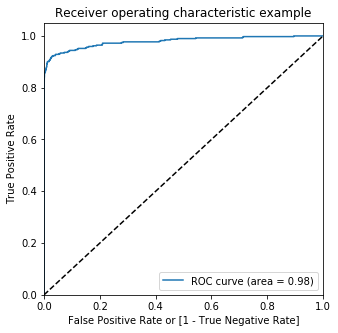

In [332]:
draw_roc(X_train.Actual_Class, X_train.Predicted_Prob1)

In [333]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    X_train[i]= X_train.Predicted_Prob1.map(lambda x: 1 if x > i else 0)
X_train.tail()

C:\Users\My Pc\Anaconda3 2020\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


V1        V2        V3        V4        V5        V6        V7  \
98940  -0.567431  0.257720  1.800638  0.683772  0.120322  1.448665 -0.307873   
1852   -0.661943  0.544671  1.279549 -1.176133 -0.000595 -0.534574  0.761943   
65628   0.492663 -0.017110  1.050196  1.642785 -0.464688  0.693055 -0.618158   
148181  1.246438 -0.474001 -0.405946  0.304729 -0.425490  0.230534 -0.578814   
95002  -0.883129  0.295999  1.502820 -1.501516 -0.527479 -0.088891 -0.208222   

              V9       V10       V11       V12       V14       V16       V17  \
98940   0.355832 -0.394190  0.184603  0.625027 -0.482521 -1.639849  1.510722   
1852    0.897784  1.008699  1.378328 -0.147002 -0.658595  0.629117 -1.433282   
65628  -0.057778  0.676021  0.885691  0.065386  0.124870  0.887130 -0.585451   
148181  0.847316  0.167557  0.810977  1.690973 -0.273276  0.536943 -0.929038   
95002   0.933044 -1.770111  0.496697  1.583128 -0.037379 -0.143689 -0.532547   

             V18       V19    Amount  Predicted_Prob0  Predicted_Prob1  \
98940  -2.081159 -1.254278 -0.277513         0.999438         0.000562   
1852    0.082931 -0.665135 -1.376205         0.999917         0.000083   
65628   0.101215 -1.287827 -0.645095         0.999647         0.000353   
148181  0.601275 -0.025244  0.604374         0.999925         0.000075   
95002   0.975102  0.684307 -0.373428         0.999979         0.000021   

        Actual_Class  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  
98940              0    1    0    0    0    0    0    0    0    0    0  
1852               0    1    0    0    0    0    0    0    0    0    0  
65628              0    1    0    0    0    0    0    0    0    0    0  
148181             0    1    0    0    0    0    0    0    0    0    0  
95002              0    1    0    0    0    0    0    0    0    0    0

In [334]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
# We will Calculate the metrics and store the results in a list

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','precision','recall'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(X_train.Actual_Class, X_train[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    precision = cm1[1,1]/(cm1[1,1]+cm1[0,1])
    recall = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,precision,recall]
print(cutoff_df)

     prob  accuracy  precision    recall
0.0   0.0  0.001729   0.001729  1.000000
0.1   0.1  0.999232   0.767726  0.796954
0.2   0.2  0.999324   0.824324  0.774112
0.3   0.3  0.999315   0.854167  0.728426
0.4   0.4  0.999276   0.872964  0.680203
0.5   0.5  0.999201   0.875887  0.626904
0.6   0.6  0.999179   0.884758  0.604061
0.7   0.7  0.999118   0.884462  0.563452
0.8   0.8  0.999061   0.881356  0.527919
0.9   0.9  0.998977   0.874419  0.477157


- Calculating Threshold Probability for Classification using Precision vs Recall curve

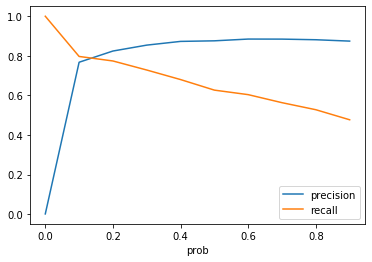

In [335]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['precision','recall'])
plt.show()

- Using cutoff threshold as 0.17

In [336]:
X_train['final_predicted'] = X_train.Predicted_Prob1.map( lambda x: 1 if x > 0.17 else 0)

X_train.head()

C:\Users\My Pc\Anaconda3 2020\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


V1        V2        V3        V4        V5        V6        V7  \
24027   0.494656  0.173019  0.406492  1.521322  0.080062  0.630482 -0.146433   
45015   0.286323 -0.394085 -0.364881  1.035298 -0.173252 -0.312471  0.493055   
175548  1.335126 -0.431132 -0.560179  0.008088 -0.185014  0.414871 -0.562495   
177705  1.188243 -0.172754 -0.680698  1.769401  1.434905  2.941500 -1.113197   
154080  1.324400 -0.402907 -0.048809  0.341699 -0.594579  0.208451 -0.895965   

              V9       V10       V11       V12       V14       V16       V17  \
24027  -0.795084  0.734899  1.447114  0.266992  0.751594  0.436284 -0.378093   
45015   0.174944 -0.058830 -1.168309 -0.289285  0.344887 -0.279920 -0.343048   
175548  1.021314 -0.043218  0.458206  2.056981 -0.364395  0.444727 -1.159125   
177705 -0.254191  1.241365 -0.475501 -0.332775 -0.231174  1.899691 -1.377254   
154080  2.081326 -0.169268  1.414342 -1.560376  1.569002  1.044106 -0.277585   

             V18       V19    Amount  Predicted_Prob0  Predicted_Prob1  \
24027  -0.930271 -1.682081 -0.353472         0.999714         0.000286   
45015  -0.216142 -0.014482  1.417219         0.999629         0.000371   
175548  0.832260  0.450785  0.311305         0.999947         0.000053   
177705 -0.043710 -2.460863  0.057632         0.998841         0.001159   
154080  1.006329 -0.204494 -0.159110         0.999854         0.000146   

        Actual_Class  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  \
24027              0    1    0    0    0    0    0    0    0    0    0   
45015              0    1    0    0    0    0    0    0    0    0    0   
175548             0    1    0    0    0    0    0    0    0    0    0   
177705             0    1    0    0    0    0    0    0    0    0    0   
154080             0    1    0    0    0    0    0    0    0    0    0   

        final_predicted  
24027                 0  
45015                 0  
175548                0  
177705                0  
154080                0

In [337]:
fraud_rate = (sum(X_train['final_predicted'])/sum(X_train['Actual_Class']))*100
fraud_rate

97.71573604060913

##### Accuracy, Precision, Recall and F1 Score

- For Training Data

In [339]:
# Let's check the overall accuracy.
metrics.accuracy_score(X_train.Actual_Class, X_train.final_predicted)

0.9992758234764862

In [340]:
confusion2 = metrics.confusion_matrix(X_train.Actual_Class,  X_train.final_predicted )
confusion2

array([[227373,     78],
       [    87,    307]], dtype=int64)

In [342]:
precision = confusion2[1,1]/(confusion2[1,1]+confusion2[0,1])
recall = confusion2[1,1]/(confusion2[1,0]+confusion2[1,1])
print(precision)
print(recall)

0.7974025974025974
0.7791878172588832


- For test data :

In [343]:
X_test[['Predicted_Prob0','Predicted_Prob1']] = pd.DataFrame(clf.predict_proba(X_test).tolist(), index= X_test.index)

C:\Users\My Pc\Anaconda3 2020\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [344]:
X_test['Actual_Class'] = y_test
X_test.head()

C:\Users\My Pc\Anaconda3 2020\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


V1        V2        V3        V4        V5        V6        V7  \
243021  0.643582 -1.437651  0.068720  0.930397 -1.608143  0.557588 -1.022213   
227068  1.370766 -0.634444 -1.628374 -0.202432  0.092824 -1.148862  0.520201   
46910   0.196184 -0.325138 -0.349490  1.045845 -0.136270 -0.567941  0.709337   
110544  0.863944 -0.773701  0.339522 -0.784248 -1.249432 -0.496793 -0.853973   
241316  1.413794 -0.199056 -0.842139  0.105938  0.290670  0.347259 -0.147313   

              V9       V10       V11       V12       V14       V16       V17  \
243021  0.992320  0.592439 -2.077681 -0.526670 -0.790437 -1.373243 -0.066330   
227068 -0.893159  0.936229 -1.317926 -1.086071  1.096656 -2.201839  0.250436   
46910  -0.371416 -0.034837  0.238249  0.538294  0.624737 -0.675359  0.034394   
110544 -1.305889  1.171824 -0.857456 -0.936842 -0.677527 -0.949017  1.132069   
241316  0.661038  0.001427  0.305113  2.019766  0.005026  0.284643 -1.156596   

             V18       V19    Amount  Predicted_Prob0  Predicted_Prob1  \
243021  2.322093 -1.711489  1.655775         0.998178         0.001822   
227068  1.016329 -0.828039  1.149127         0.999481         0.000519   
46910  -1.088916 -1.084982  1.463655         0.999745         0.000255   
110544 -0.475285  0.228958  0.206752         0.999603         0.000397   
241316 -0.052661  1.069521 -0.277513         0.999956         0.000044   

        Actual_Class  
243021             0  
227068             0  
46910              0  
110544             0  
241316             0

In [345]:
X_test['final_predicted'] = X_test.Predicted_Prob1.map( lambda x: 1 if x > 0.17 else 0)

X_test.head()

C:\Users\My Pc\Anaconda3 2020\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


V1        V2        V3        V4        V5        V6        V7  \
243021  0.643582 -1.437651  0.068720  0.930397 -1.608143  0.557588 -1.022213   
227068  1.370766 -0.634444 -1.628374 -0.202432  0.092824 -1.148862  0.520201   
46910   0.196184 -0.325138 -0.349490  1.045845 -0.136270 -0.567941  0.709337   
110544  0.863944 -0.773701  0.339522 -0.784248 -1.249432 -0.496793 -0.853973   
241316  1.413794 -0.199056 -0.842139  0.105938  0.290670  0.347259 -0.147313   

              V9       V10       V11       V12       V14       V16       V17  \
243021  0.992320  0.592439 -2.077681 -0.526670 -0.790437 -1.373243 -0.066330   
227068 -0.893159  0.936229 -1.317926 -1.086071  1.096656 -2.201839  0.250436   
46910  -0.371416 -0.034837  0.238249  0.538294  0.624737 -0.675359  0.034394   
110544 -1.305889  1.171824 -0.857456 -0.936842 -0.677527 -0.949017  1.132069   
241316  0.661038  0.001427  0.305113  2.019766  0.005026  0.284643 -1.156596   

             V18       V19    Amount  Predicted_Prob0  Predicted_Prob1  \
243021  2.322093 -1.711489  1.655775         0.998178         0.001822   
227068  1.016329 -0.828039  1.149127         0.999481         0.000519   
46910  -1.088916 -1.084982  1.463655         0.999745         0.000255   
110544 -0.475285  0.228958  0.206752         0.999603         0.000397   
241316 -0.052661  1.069521 -0.277513         0.999956         0.000044   

        Actual_Class  final_predicted  
243021             0                0  
227068             0                0  
46910              0                0  
110544             0                0  
241316             0                0

In [346]:
# Let's check the overall accuracy.
metrics.accuracy_score(X_test.Actual_Class, X_test.final_predicted)

0.9992099996488887

In [347]:
confusion_test = metrics.confusion_matrix(X_test.Actual_Class,  X_test.final_predicted )
precision = confusion_test[1,1]/(confusion_test[1,1]+confusion_test[0,1])
recall = confusion_test[1,1]/(confusion_test[1,0]+confusion_test[1,1])
print(precision)
print(recall)

0.7789473684210526
0.7551020408163265


In [348]:
confusion_test

array([[56843,    21],
       [   24,    74]], dtype=int64)

### Final Metric For Logistic regression

1. Test Accuracy - 0.9992099996488887
2. Precision - 0.7789473684210526
3. Recall - 0.7551020408163265
4. F1 Score - 0.7282

## Classification Using SVM 

#### Hyperparameter Tuning Using SVM for K = 2 Folds

In [353]:
# SVM using SGDClassifier
from sklearn.linear_model import SGDClassifier #import the package
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV


loss_metric = ['hinge', 'log', 'perceptron', 'squared_loss']
num_alpha = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.02, 0.07, 0.1, 0.25, 0.4, 0.8, 1, 10]  #--> list of values
cv_num =  [2, 5, 7] #--> list of values
average_values = [10, 25, 50, 75, 100]
learning_method = ['constant', 'optimal', 'adaptive']
eta0_values = [0.001, 0.01, 0.1, 0.25]
# creating a KFold object with num_split 
folds = StratifiedKFold(n_splits = cv_num[0], shuffle = True, random_state = 150)
svm = SGDClassifier(warm_start = True, n_jobs= -1)
# specify range of hyperparameters
hyper_params = {'loss' : loss_metric, 'alpha' : num_alpha, 'average' : average_values, 'learning_rate' : learning_method, 
                'eta0' : eta0_values}
rsearch_cv = RandomizedSearchCV(estimator=svm, 
                                param_distributions=hyper_params, 
                                cv=folds, scoring=['roc_auc', 'recall', 'precision', 'accuracy', 'f1'],
                                verbose=5,
                                n_jobs=-1,
                                random_state=250, return_train_score = True, refit = 'f1')
rsearch_cv.fit(X, y)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done  18 out of  20 | elapsed:   14.7s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   15.1s finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=2, random_state=150, shuffle=True),
                   error_score=nan,
                   estimator=SGDClassifier(alpha=0.0001, average=False,
                                           class_weight=None,
                                           early_stopping=False, epsilon=0.1,
                                           eta0=0.0, fit_intercept=True,
                                           l1_ratio=0.15,
                                           learning_rate='optimal',
                                           loss='hinge', max_iter=1000,
                                           n_iter_no_change=5, n_jobs=-1,
                                           penalty='l2', power_t=0.5,
                                           rando...
                   param_distributions={'alpha': [0.0001, 0.0005, 0.001, 0.005,
                                                  0.01, 0.02, 0.07, 0.1, 0.25,
                                           

Hyperparameter tuning results :

In [354]:
model_svm1 = pd.DataFrame(rsearch_cv.cv_results_)
model_svm1

mean_fit_time  std_fit_time  mean_score_time  std_score_time    param_loss  \
0       0.589574      0.017549         0.438864    3.780246e-03    perceptron   
1       3.761607      0.090813         0.705220    9.327626e-02           log   
2       1.919999      0.031515         0.382453    8.084774e-03    perceptron   
3       2.712911      0.031243         0.400668    1.562059e-02         hinge   
4       0.941416      0.037321         0.424801    1.562238e-02  squared_loss   
5       3.269111      0.015619         0.454678    7.812023e-03           log   
6       2.241151      0.000004         0.462485    7.152557e-07           log   
7       2.464908      0.007485         0.496707    2.692664e-02           log   
8       0.545924      0.015621         0.425796    1.562226e-02  squared_loss   
9       0.551645      0.005018         0.423512    3.297853e-02           log   

  param_learning_rate param_eta0 param_average param_alpha  \
0             optimal        0.1           100         0.1   
1            adaptive       0.25           100         0.8   
2            adaptive      0.001            50         0.4   
3            adaptive        0.1            25         0.1   
4            constant       0.25            75          10   
5            adaptive       0.25            25        0.25   
6            adaptive      0.001           100           1   
7            adaptive      0.001            50      0.0005   
8             optimal       0.25           100        0.02   
9             optimal      0.001           100       0.001   

                                              params  split0_test_roc_auc  \
0  {'loss': 'perceptron', 'learning_rate': 'optim...             0.973658   
1  {'loss': 'log', 'learning_rate': 'adaptive', '...             0.934223   
2  {'loss': 'perceptron', 'learning_rate': 'adapt...             0.981942   
3  {'loss': 'hinge', 'learning_rate': 'adaptive',...             0.929305   
4  {'loss': 'squared_loss', 'learning_rate': 'con...             0.933859   
5  {'loss': 'log', 'learning_rate': 'adaptive', '...             0.937152   
6  {'loss': 'log', 'learning_rate': 'adaptive', '...             0.934192   
7  {'loss': 'log', 'learning_rate': 'adaptive', '...             0.984159   
8  {'loss': 'squared_loss', 'learning_rate': 'opt...             0.089120   
9  {'loss': 'log', 'learning_rate': 'optimal', 'e...             0.983290   

   split1_test_roc_auc  mean_test_roc_auc  std_test_roc_auc  \
0             0.939591           0.956625          0.017033   
1             0.885573           0.909898          0.024325   
2             0.954103           0.968023          0.013919   
3             0.887646           0.908476          0.020830   
4             0.887295           0.910577          0.023282   
5             0.888783           0.912968          0.024185   
6             0.884316           0.909254          0.024938   
7             0.969845           0.977002          0.007157   
8             0.662591           0.375855          0.286735   
9             0.962413           0.972851          0.010439   

   rank_test_roc_auc  split0_train_roc_auc  split1_train_roc_auc  ...  \
0                  4              0.938911              0.975694  ...   
1                  7              0.879854              0.945441  ...   
2                  3              0.959286              0.981185  ...   
3                  9              0.885295              0.935246  ...   
4                  6              0.890715              0.945365  ...   
5                  5              0.882676              0.948161  ...   
6                  8              0.879554              0.944099  ...   
7                  1              0.973076              0.985366  ...   
8                 10              0.114198              0.671615  ...   
9                  2              0.968131              0.983074  ...   

   split1_test_accuracy  mean_test_accuracy  std_test_accuracy  \
0              0

Best Estimator For K = 2 Folds: 

In [355]:
rsearch_cv.best_estimator_

SGDClassifier(alpha=0.4, average=50, class_weight=None, early_stopping=False,
              epsilon=0.1, eta0=0.001, fit_intercept=True, l1_ratio=0.15,
              learning_rate='adaptive', loss='perceptron', max_iter=1000,
              n_iter_no_change=5, n_jobs=-1, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=True)

Best Param for k = 2 folds: 

In [356]:
rsearch_cv.best_params_

{'loss': 'perceptron',
 'learning_rate': 'adaptive',
 'eta0': 0.001,
 'average': 50,
 'alpha': 0.4}

Hyperparameter Tuning for K = 5 :

In [362]:
folds = StratifiedKFold(n_splits = cv_num[1], shuffle = True, random_state = 150)
svm = SGDClassifier(warm_start = True, n_jobs= -1)
# specify range of hyperparameters
hyper_params = {'loss' : loss_metric, 'alpha' : num_alpha, 'average' : average_values, 'learning_rate' : learning_method, 
                'eta0' : eta0_values}
rsearch_cv = RandomizedSearchCV(estimator=svm, 
                                param_distributions=hyper_params, 
                                cv=folds, scoring=['roc_auc', 'recall', 'precision', 'accuracy', 'f1'],
                                verbose=5, n_iter = 500, 
                                n_jobs=-1,
                                return_train_score = True, refit = 'f1')
rsearch_cv.fit(X, y)

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   50.2s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done 874 tasks      | elapsed: 11.0min
[Parallel(n_jobs=-1)]: Done 1144 tasks      | elapsed: 14.7min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed: 19.2min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed: 23.8min
[Parallel(n_jobs=-1)]: Done 2170 tasks      | elapsed: 29.2min
[Parallel(n_jobs=-1)]: Done 2500 out of 2500 | elapsed: 33.9min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=150, shuffle=True),
                   error_score=nan,
                   estimator=SGDClassifier(alpha=0.0001, average=False,
                                           class_weight=None,
                                           early_stopping=False, epsilon=0.1,
                                           eta0=0.0, fit_intercept=True,
                                           l1_ratio=0.15,
                                           learning_rate='optimal',
                                           loss='hinge', max_iter=1000,
                                           n_iter_no_change=5, n_jobs=-1,
                                           penalty='l2', power_t=0.5,
                                           rando...
                   param_distributions={'alpha': [0.0001, 0.0005, 0.001, 0.005,
                                                  0.01, 0.02, 0.07, 0.1, 0.25,
                                           

Grid Search Results : 

In [370]:
model_svm2 = pd.DataFrame(rsearch_cv.cv_results_)
model_svm2.sort_values(by=['rank_test_f1'], ascending = True)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  param_loss  \
315       4.880628      0.253529         0.150014        0.009780  perceptron   
441       5.022262      0.236818         0.148039        0.021426       hinge   
452       0.952497      0.148688         0.154019        0.016013       hinge   
224       5.210500      0.398290         0.166901        0.025771       hinge   
90        0.931605      0.136693         0.137470        0.020724  perceptron   
..             ...           ...              ...             ...         ...   
254       1.402918      0.081020         0.135693        0.017278         log   
255       4.539600      0.265727         0.128351        0.021129       hinge   
258       2.150678      0.098190         0.130892        0.021796         log   
225       0.965684      0.055951         0.148530        0.021905  perceptron   
0         0.917299      0.035399         0.173991        0.026491       hinge   

    param_learning_rate param_eta0 param_average param_alpha  \
315            adaptive        0.1           100       0.001   
441            adaptive        0.1            10      0.0001   
452            constant        0.1            75      0.0005   
224            adaptive        0.1            75      0.0001   
90             constant        0.1            25       0.001   
..                  ...        ...           ...         ...   
254             optimal       0.25           100         0.8   
255            adaptive        0.1            25           1   
258             optimal       0.01            25          10   
225             optimal       0.25           100          10   
0               optimal        0.1            10          10   

                                                params  split0_test_roc_auc  \
315  {'loss': 'perceptron', 'learning_rate': 'adapt...             0.969122   
441  {'loss': 'hinge', 'learning_rate': 'adaptive',...             0.963878   
452  {'loss': 'hinge', 'learning_rate': 'constant',...             0.948070   
224  {'loss': 'hinge', 'learning_rate': 'adaptive',...             0.960671   
90   {'loss': 'perceptron', 'learning_rate': 'const...             0.953753   
..                                                 ...                  ...   
254  {'loss': 'log', 'learning_rate': 'optimal', 'e...             0.943069   
255  {'loss': 'hinge', 'learning_rate': 'adaptive',...             0.932476   
258  {'loss': 'log', 'learning_rate': 'optimal', 'e...             0.932938   
225  {'loss': 'perceptron', 'learning_rate': 'optim...             0.942645   
0    {'loss': 'hinge', 'learning_rate': 'optimal', ...             0.955506   

     split1_test_roc_auc  split2_test_roc_auc  split3_test_roc_auc  \
315             0.985040             0.970962             0.928530   
441             0.983030             0.970483             0.924974   
452             0.981288             0.969091             0.910146   
224             0.983118             0.969556             0.925552   
90              0.980502             0.969748             0.900169   
..                   ...                  ...                  ...   
254             0.949744             0.948265             0.805208   
255             0.885257             0.912876             0.786252   
258             0.963515             0.940051             0.818662   
225             0.942615             0.949810             0.796135   
0               0.966463             0.967547             0.823486   

     split4_test_roc_auc  mean_test_roc_auc  std_test_roc_auc  ...  \
315             0.951239           0.960979          0.019456  ...   
441             0.959036           0.960280          0.019405  ...   
452             0.931682           0.948056          0.025503  ...   
224             0.957174           0.959214          0.019067  ...   
90              0.934294           0.947693          0.028417  ...   
..                   ...                ...          

Best Estimator for k = 5:

In [364]:
rsearch_cv.best_estimator_

SGDClassifier(alpha=0.001, average=100, class_weight=None, early_stopping=False,
              epsilon=0.1, eta0=0.1, fit_intercept=True, l1_ratio=0.15,
              learning_rate='adaptive', loss='perceptron', max_iter=1000,
              n_iter_no_change=5, n_jobs=-1, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=True)

- Best Parameter for K = 5:

In [365]:
rsearch_cv.best_params_

{'loss': 'perceptron',
 'learning_rate': 'adaptive',
 'eta0': 0.1,
 'average': 100,
 'alpha': 0.001}

- Hyperparameter Tuning for K = 7

In [371]:
folds = StratifiedKFold(n_splits = cv_num[2], shuffle = True, random_state = 150)
svm = SGDClassifier(warm_start = True, n_jobs= -1)
# specify range of hyperparameters
hyper_params = {'loss' : loss_metric, 'alpha' : num_alpha, 'average' : average_values, 'learning_rate' : learning_method, 
                'eta0' : eta0_values}
rsearch_cv = RandomizedSearchCV(estimator=svm, 
                                param_distributions=hyper_params, 
                                cv=folds, scoring=['roc_auc', 'recall', 'precision', 'accuracy', 'f1'],
                                verbose=5, n_iter = 500, 
                                n_jobs=-1,
                                return_train_score = True, refit = 'f1')
rsearch_cv.fit(X, y)

Fitting 7 folds for each of 500 candidates, totalling 3500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   56.9s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  9.5min
[Parallel(n_jobs=-1)]: Done 874 tasks      | elapsed: 12.9min
[Parallel(n_jobs=-1)]: Done 1144 tasks      | elapsed: 17.0min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed: 21.9min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed: 27.4min
[Parallel(n_jobs=-1)]: Done 2170 tasks      | elapsed: 33.4min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed: 38.9min
[Parallel(n_jobs=-1)]: Done 3034 tasks      | elapsed: 45.9min
[Parallel(n_jobs=-1)]: Done 3500 out of 3500 | elapsed: 53.0min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=7, random_state=150, shuffle=True),
                   error_score=nan,
                   estimator=SGDClassifier(alpha=0.0001, average=False,
                                           class_weight=None,
                                           early_stopping=False, epsilon=0.1,
                                           eta0=0.0, fit_intercept=True,
                                           l1_ratio=0.15,
                                           learning_rate='optimal',
                                           loss='hinge', max_iter=1000,
                                           n_iter_no_change=5, n_jobs=-1,
                                           penalty='l2', power_t=0.5,
                                           rando...
                   param_distributions={'alpha': [0.0001, 0.0005, 0.001, 0.005,
                                                  0.01, 0.02, 0.07, 0.1, 0.25,
                                           

- Grid Search Results for K = 7 :

In [375]:
model_svm3 = pd.DataFrame(rsearch_cv.cv_results_)
model_svm3.sort_values(by=['rank_test_f1'], ascending = True, inplace = True)
model_svm3

mean_fit_time  std_fit_time  mean_score_time  std_score_time  param_loss  \
358       1.082358      0.064232         0.122945        0.013833       hinge   
485       4.894791      0.144337         0.107118        0.031714       hinge   
318       5.293147      0.256486         0.097250        0.010190       hinge   
178       3.978034      0.066956         0.105107        0.012585  perceptron   
76        5.635482      0.209006         0.101993        0.014463  perceptron   
..             ...           ...              ...             ...         ...   
294       1.106335      0.151808         0.121460        0.022906       hinge   
296       2.568880      0.113577         0.118383        0.026590         log   
302       5.392090      0.374380         0.104887        0.019958         log   
276       1.000362      0.072327         0.098964        0.017706       hinge   
499       1.131867      0.031646         0.109646        0.018552         log   

    param_learning_rate param_eta0 param_average param_alpha  \
358            constant        0.1            10      0.0005   
485            adaptive        0.1            25      0.0005   
318            adaptive        0.1            75       0.001   
178            adaptive       0.01           100        0.01   
76             adaptive       0.25            10      0.0005   
..                  ...        ...           ...         ...   
294             optimal       0.01           100         0.8   
296             optimal       0.01           100          10   
302            adaptive       0.01            50        0.25   
276             optimal       0.01            75         0.8   
499            constant        0.1            50           1   

                                                params  split0_test_roc_auc  \
358  {'loss': 'hinge', 'learning_rate': 'constant',...             0.955634   
485  {'loss': 'hinge', 'learning_rate': 'adaptive',...             0.966809   
318  {'loss': 'hinge', 'learning_rate': 'adaptive',...             0.970608   
178  {'loss': 'perceptron', 'learning_rate': 'adapt...             0.967950   
76   {'loss': 'perceptron', 'learning_rate': 'adapt...             0.963961   
..                                                 ...                  ...   
294  {'loss': 'hinge', 'learning_rate': 'optimal', ...             0.950223   
296  {'loss': 'log', 'learning_rate': 'optimal', 'e...             0.941070   
302  {'loss': 'log', 'learning_rate': 'adaptive', '...             0.950651   
276  {'loss': 'hinge', 'learning_rate': 'optimal', ...             0.953724   
499  {'loss': 'log', 'learning_rate': 'constant', '...             0.948991   

     split1_test_roc_auc  split2_test_roc_auc  split3_test_roc_auc  \
358             0.953309             0.985184             0.953564   
485             0.976690             0.988022             0.959824   
318             0.977035             0.988884             0.958681   
178             0.972034             0.989525             0.961309   
76              0.973024             0.989695             0.961608   
..                   ...                  ...                  ...   
294             0.940681             0.956594             0.931216   
296             0.938466             0.976241             0.921179   
302             0.933806             0.960669             0.931670   
276             0.933764             0.956965             0.931525   
499             0.930628             0.956140             0.929895   

     split4_test_roc_auc  split5_test_roc_auc  split6_test_roc_auc  ...  \
358             0.921421             0.939545             0.923392  ...   
485             0.939358             0.952573             0.944370  ...   
318             0.943468             0.949931             0.945096  ...   
178             0.939245             0.955555             0.945916  ...   
76              0.940841             0.943255             0.931509  ...   
..                   ..

- Best Estimator for K = 7

In [377]:
rsearch_cv.best_estimator_

SGDClassifier(alpha=0.0005, average=10, class_weight=None, early_stopping=False,
              epsilon=0.1, eta0=0.1, fit_intercept=True, l1_ratio=0.15,
              learning_rate='constant', loss='hinge', max_iter=1000,
              n_iter_no_change=5, n_jobs=-1, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=True)

- Best Parameter for K = 7 : 

In [378]:
rsearch_cv.best_params_

{'loss': 'hinge',
 'learning_rate': 'constant',
 'eta0': 0.1,
 'average': 10,
 'alpha': 0.0005}

- Best parameters :
  {'loss': 'hinge',
  'learning_rate': 'constant',
  'eta0': 0.1,
  'average': 10,
  'alpha': 0.0005}

##### Evaluation Metrics
- Building the Classification model with tuned parameters and finding AUC, Precision, Recall and F1 score for the model :

In [379]:
clf_svm = SGDClassifier(alpha=0.0005, average=10, eta0=0.1,
              learning_rate='constant', loss='hinge', n_jobs=-1,
              random_state=300, shuffle=True, verbose=0, warm_start=True)

In [405]:

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y, 
                                                    test_size=0.2) # evaluation of results

In [406]:
clf_svm.fit(X_train, y_train)

SGDClassifier(alpha=0.0005, average=10, class_weight=None, early_stopping=False,
              epsilon=0.1, eta0=0.1, fit_intercept=True, l1_ratio=0.15,
              learning_rate='constant', loss='hinge', max_iter=1000,
              n_iter_no_change=5, n_jobs=-1, penalty='l2', power_t=0.5,
              random_state=300, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=True)

In [417]:
X_train['Predicted'] = list(clf_svm.predict(X_train))

C:\Users\My Pc\Anaconda3 2020\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [419]:
X_train['Actual_Class'] = y_train
X_train.head(30)

C:\Users\My Pc\Anaconda3 2020\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


V1        V2        V3        V4        V5        V6        V7  \
253351  1.423454 -0.133058 -0.826188  0.401214 -0.248712 -1.286573  0.115396   
172325 -0.515492  0.547282  1.929749  2.700612 -0.328379  1.199048 -0.359301   
34601  -0.382021  0.768134 -0.287352  0.720131 -0.004314 -0.549080  0.374408   
202243  1.451736 -0.098712 -0.879278  0.108918  0.156045  0.002896 -0.314209   
139662  0.667768 -0.786089  0.064217 -0.892015 -1.021334 -0.643939 -0.440857   
233342  1.741428 -0.911520 -0.824933 -1.449977 -0.564609  0.336161 -1.082823   
79918  -1.544941 -0.300262  0.382333  1.241280  0.921564 -0.568632  0.131900   
93622   0.605315 -0.424075 -0.088581 -1.511305 -0.671492 -1.062935 -0.005518   
276899 -1.315873  1.633361 -1.242787  0.699341 -0.134619 -0.438275 -0.074775   
242329 -0.692886  0.083968  0.470577 -0.280863  0.780364 -0.946646  1.301090   
284414  1.469190 -0.455071 -1.374389 -0.393099  0.557669  0.427155  0.029252   
205676  1.084962 -0.665918 -1.244069 -0.179896  0.108500 -0.262666  0.315763   
263423 -2.243750 -3.117859  0.367798 -0.919580  3.248583 -1.668754 -2.256992   
210968  1.418201 -0.126319 -0.764587  0.812317  0.178384  0.214808 -0.169345   
226607 -0.525148  0.668830 -0.748277 -0.727304  1.301221  0.949539  0.446728   
113153  0.592397 -0.110823  0.397772  0.697307 -0.449461 -0.147688 -0.157151   
92209  -1.122206  1.415464 -0.070823  0.874660 -0.686522  0.270964 -0.477563   
18049   0.166958 -0.507131 -0.117167  0.933561 -0.519440 -0.478910  0.339527   
264911  1.359584  0.178657 -1.569840  0.897366  1.002397 -0.097326  0.505306   
213406  1.451236 -0.081525 -0.961550  0.298515  0.243892 -0.419529  0.204491   
20403  -0.539755 -1.582290  0.145701  1.365752 -1.311081  0.305086  0.370174   
44949   0.691543 -0.153493  0.206674 -0.107864 -0.447491 -0.330514 -0.280263   
63057   0.502532 -0.584943  0.360625 -1.202513 -0.257203  1.267426 -0.895800   
152413  1.326656 -0.450232 -0.148836  0.400056 -0.615476  0.114261 -0.866541   
199039 -0.499532  1.367695 -1.443383 -0.437143  1.725396 -0.184288  0.940137   
186783 -0.609915  0.160773 -0.209681  0.315051  0.892986 -1.358027  0.390924   
102623 -0.715447 -0.934387  0.714077 -1.786846 -0.399030 -0.560511 -0.039760   
155975 -0.537054  0.258786  0.574892 -0.896975  1.948478  2.604959 -0.076143   
56099  -0.207545 -1.290499  0.337680  0.508438 -1.262505  0.129786  0.008400   
171741 -0.814783 -0.047638 -0.771458 -0.457503  1.527196 -1.088612  1.532138   

              V9       V10       V11       V12       V14       V16       V17  \
253351  0.699510  0.068468 -0.382246 -0.176261  0.684301 -0.438530 -0.353149   
172325 -0.780284  1.468100 -1.504739 -1.291660 -0.388910  0.734834 -0.268508   
34601  -0.300130  0.037073 -0.803237 -1.034765  1.472309 -0.761838  0.484737   
202243  0.996129 -0.696681 -0.816353  0.878639 -1.629578  0.914327  0.044018   
139662 -2.169439  1.195822  0.304668 -0.506407 -0.250266 -0.968092  1.148197   
233342 -1.254069  1.510843 -0.317986 -0.251414 -0.681530 -0.013663 -0.390960   
79918  -1.146953  0.686986  0.626762  0.494075  0.376657  1.540901 -1.331956   
93622   1.447814 -1.423826  1.626569  2.962233  0.328719 -1.273025 -0.028896   
276899  0.262418  0.802950 -1.133099 -0.526899 -0.445888 -0.663124  1.890630   
242329  0.627643  0.622809 -0.765503 -0.761112 -0.505499 -0.512628 -0.832998   
284414 -0.890410  0.752683 -0.265645  0.359574  0.380573 -2.961862  1.256570   
205676  0.529937 -0.063555 -1.162477 -0.052443  0.301217  0.250334 -0.643397   
263423  0.614543 -1.541127  0.598337  1.086539  0.965633  0.395968 -0.351779   
210968  0.853386  0.200566 -1.781754 -0.613224  0.316775  0.255726 -0.738202   
226607  0.202558 -0.113474  1.069928  0.393904 -0.923812 -0.301209  0.873122   
113153  0.572080 -0.205269 -0.219443  0.708819 -0.240086 -0.893981  0.563002   
92209  -0.450156  0.071903  0.537040  0.911409  1.399028 -0.780369  1.128687   
18049  -0.075602  0.121650  1.235481  0.186386  0.999031  0.260072 -0.649566   
264911 -0.090

##### Precision, Recall, Accuracy, F1 Score for Optimal Classifier

- For Training dataset

In [426]:
confusion_train = metrics.confusion_matrix(X_train.Actual_Class,  X_train.Predicted)
precision = confusion_train[1,1]/(confusion_train[1,1]+confusion_train[0,1])
recall = confusion_train[1,1]/(confusion_train[1,0]+confusion_train[1,1])
print(precision)
print(recall)
print(metrics.accuracy_score(X_train.Actual_Class,  X_train.Predicted))

0.8599439775910365
0.7791878172588832
0.9993987140380521


- SVM Coefficients for Optimal Model :

In [422]:
clf_svm.coef_

array([[ 0.69781689,  0.2596107 ,  0.12732929,  0.45403993,  0.03332516,
         0.28931771, -0.37985726, -0.39838461, -0.62305877,  0.16592535,
        -0.63517609, -0.96658303, -0.60761983, -0.39896009, -0.15227202,
         0.0536901 , -0.1190042 ]])

- For Test dataset : 

In [423]:
X_test['Predicted'] = list(clf_svm.predict(X_test))

C:\Users\My Pc\Anaconda3 2020\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [424]:
X_test['Actual_Class'] = y_test
X_test.head(30)

C:\Users\My Pc\Anaconda3 2020\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


V1        V2        V3        V4        V5        V6        V7  \
259586  1.456408 -0.047353 -0.790494  0.358065 -0.026223 -0.960141  0.226263   
107523 -1.261639  1.645880  0.153085 -1.353185 -0.369094 -0.808953  0.366900   
270221 -0.778944  0.344822  0.157253 -1.167130  1.511357  2.699383  0.137802   
38058   0.710703 -0.784975  0.104923 -1.237783 -0.480424  1.041387 -1.066509   
7168    0.625783  0.010748  0.353278  0.784475 -0.349477 -0.442200 -0.048977   
90987  -0.451926  0.492736 -0.865084  0.031737  1.559599  2.195827 -0.145078   
219079 -1.052326 -0.086792  1.176827  2.831358  1.786639  0.060531 -0.303231   
182678  1.482684 -0.661351 -1.251574 -0.596868 -0.189074 -0.715350 -0.062004   
23213   0.594735  0.053774  0.119229  0.477322 -0.221613 -0.232828 -0.112327   
19161   0.568328 -0.534725  0.946897  0.420624 -0.844556  0.672222 -0.848921   
229291 -1.009381 -1.161789  1.440235 -1.331042  0.037029 -0.224659  0.008667   
277655 -0.936790  0.253114 -0.298609 -0.210537  0.380214 -1.248897  0.482484   
157774 -2.258654  4.506436 -0.976241 -0.508487 -0.124891  2.010198 -3.746349   
34531   0.797171 -0.785583  0.641751 -1.054734 -1.258618  0.026472 -1.178251   
118799  0.826293 -0.448595 -0.193605 -0.455724 -0.560427 -0.420454 -0.404653   
33029   0.484102 -0.443124  1.078100  0.746322 -0.860322  0.686080 -0.805122   
33989   0.503785 -0.146763  1.076393  1.262437 -0.669320  0.346841 -0.397144   
94136   0.604595  0.061230  0.018112  0.803626 -0.122368 -0.315766  0.100719   
253864 -0.255399  0.405488 -0.247249 -0.599457  1.053775 -0.196462  0.808837   
5889   -0.525436  0.150093  1.583467 -0.331865 -0.630778  0.710285 -1.307734   
266524 -0.964409  0.771370 -1.381377  0.731855 -0.335280  0.236063  1.814266   
57212   0.710594 -0.480194  0.020444 -0.582477 -0.491687  0.051982 -0.510873   
204023 -0.657289  1.155298 -0.844877 -0.305403  0.203140 -0.573847  0.258386   
102098  0.689715  0.819277 -1.269679  0.995087  1.070703 -0.654941  0.571520   
94034   0.556461  0.252634  0.818372  1.827001 -0.420932 -0.293340  0.012834   
158270  1.486931 -0.126203 -1.024809  0.308100  0.192923 -0.465506 -0.059272   
201436  0.997942 -0.770304 -0.700093  0.479334 -0.524677 -0.089058 -0.261715   
163400 -0.203745 -0.447766 -0.903532 -2.398362  1.940681  2.164448  0.256797   
135010  0.500711 -0.165937  0.984567  0.891173 -0.610388  0.467990 -0.584045   
73803   0.613169 -0.157897  0.327731  0.664618 -0.573149 -0.464928 -0.137939   

              V9       V10       V11       V12       V14       V16       V17  \
259586  0.346636  0.072482 -0.449250  1.519339 -0.088193 -0.279642 -0.469198   
107523  1.567846  1.840521 -0.495541 -0.079610 -0.864272  0.607532 -1.086843   
270221  0.162199 -0.667130 -0.068207 -0.205137 -0.105251 -0.213172 -0.594878   
38058  -2.171643  1.271995  2.065673  0.299392 -0.152879 -1.599483  1.830349   
7168    1.482852 -0.523298  0.374016 -1.667152  1.518008 -0.443575  0.897692   
90987  -0.895502  0.059301 -0.200414 -0.366547  0.923980 -0.361397 -0.091367   
219079 -2.286655  1.558438  0.348403 -0.394009  0.578984 -0.355906  0.147054   
182678 -0.561570  0.912042  0.454462 -0.662230  0.464614  0.579361  0.379380   
23213  -0.071143 -0.086603  1.781927  0.715113  0.022875  0.355580  0.128626   
19161   1.575174 -0.555467 -1.999715  1.176197 -1.424661 -0.341708  0.109926   
229291 -0.918876  0.091973  0.503447 -0.979196 -0.499297  2.085703 -0.579095   
277655  0.210994 -1.796883 -0.952608 -0.681428 -1.189148  0.128093  1.722989   
157774  2.616921  0.653882  0.336228 -1.287192  0.134083 -0.152431  3.232850   
34531  -1.803079  1.377731  1.520235 -0.281883 -0.328886 -0.330449  0.542579   
118799 -0.665619  0.760567  0.647096 -0.904926  0.254870  1.066342  0.382859   
33029   1.268659 -0.282465  0.651756  1.461712 -0.616694 -0.915129  0.813272   
33989   1.033492 -0.371346 -0.503657  1.930943 -0.892159 -1.448554  1.153210   
94136   0.113017  0.023604 -0.223142 -0.214783  0.537465 -0.323782 -0.174688   
253864 -0.256

In [425]:
confusion_test = metrics.confusion_matrix(X_test.Actual_Class,  X_test.Predicted)
precision = confusion_test[1,1]/(confusion_test[1,1]+confusion_test[0,1])
recall = confusion_test[1,1]/(confusion_test[1,0]+confusion_test[1,1])
print(precision)
print(recall)
print(metrics.accuracy_score(X_test.Actual_Class,  X_test.Predicted))

0.8617021276595744
0.826530612244898
0.9994733330992591


- Top 3 Predictor variables for SVM :
    1. V14
    2. V1
    3. V12
- Test data accuracy = 0.9994733330992591
- Precision = 0.8617021276595744
- Recall = 0.826530612244898
- F1 Score = 0.843

# Random Forest Model

- `For finding the optimal model of Random Forest, we start with some base models and increase the number of Tree to the point where adding more tree does not helps in increasing the model performance(OOB Error doesn't decrease significantly). To find out the optimal hyperparameter, we plot a graph of OOB error vs n_estimators and F1 score vs n_estimators.`

In [26]:
#base model
ensemble_clfs = [
    ("RandomForestClassifier, max_features='log2', max_depth = 7",
        RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=7, max_features='log2',
                       max_leaf_nodes=65, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=3000,
                       n_jobs=-1, oob_score=True, random_state=5678, verbose=0,
                       warm_start=True)),
    ("RandomForestClassifier, max_features='log2', max_depth = 4",
        RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='log2',
                       max_leaf_nodes=10, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, n_estimators=3000,
                       n_jobs=-1, oob_score=True, random_state=54640, verbose=0,
                       warm_start=True)),
    ("RandomForestClassifier, max_features='log2', max_depth = 5",
        RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='log2',
                       max_leaf_nodes=16, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=3000,
                       n_jobs=-1, oob_score=True, random_state=546540, verbose=0,
                       warm_start=True)),
    ("RandomForestClassifier, max_features='float', max_depth = 7",
        RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=7, max_features= 0.4,
                       max_leaf_nodes=64, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=3000,
                       n_jobs=-1, oob_score=True, random_state=50, verbose=0,
                       warm_start=True)),
    ("RandomForestClassifier, max_features='float', max_depth = 6",
        RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=6, max_features= 0.4,
                       max_leaf_nodes=32, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=3000,
                       n_jobs=-1, oob_score=True, random_state=50, verbose=0,
                       warm_start=True))
    
]

In [27]:
from collections import OrderedDict
from sklearn.metrics import f1_score

# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)
f1_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)


# Range of `n_estimators` values to explore.
min_estimators = 15
max_estimators = 300

#### Plot of OOB error rate vs n_estimator for all baseline model

C:\Users\My Pc\Anaconda3 2020\lib\site-packages\sklearn\ensemble\_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\My Pc\Anaconda3 2020\lib\site-packages\sklearn\ensemble\_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\My Pc\Anaconda3 2020\lib\site-packages\sklearn\ensemble\_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\My Pc\Anaconda3 2020\lib\site-packages\sklearn\ensemble\_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\My Pc\Anaconda3 2020\lib\site-packages\sklearn\ensemble\_forest.py:523: UserWarning: Some inputs do not hav

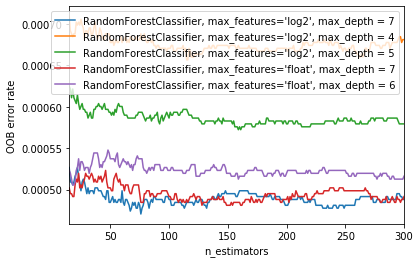

In [28]:
for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1):
        clf.set_params(n_estimators=i)
        clf.fit(X, y)
        
        f1_rate[label].append((i,f1_score(list(clf.predict(X)), list(y))))

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

#### Plot of f1 score vs n_estimator for all baseline model

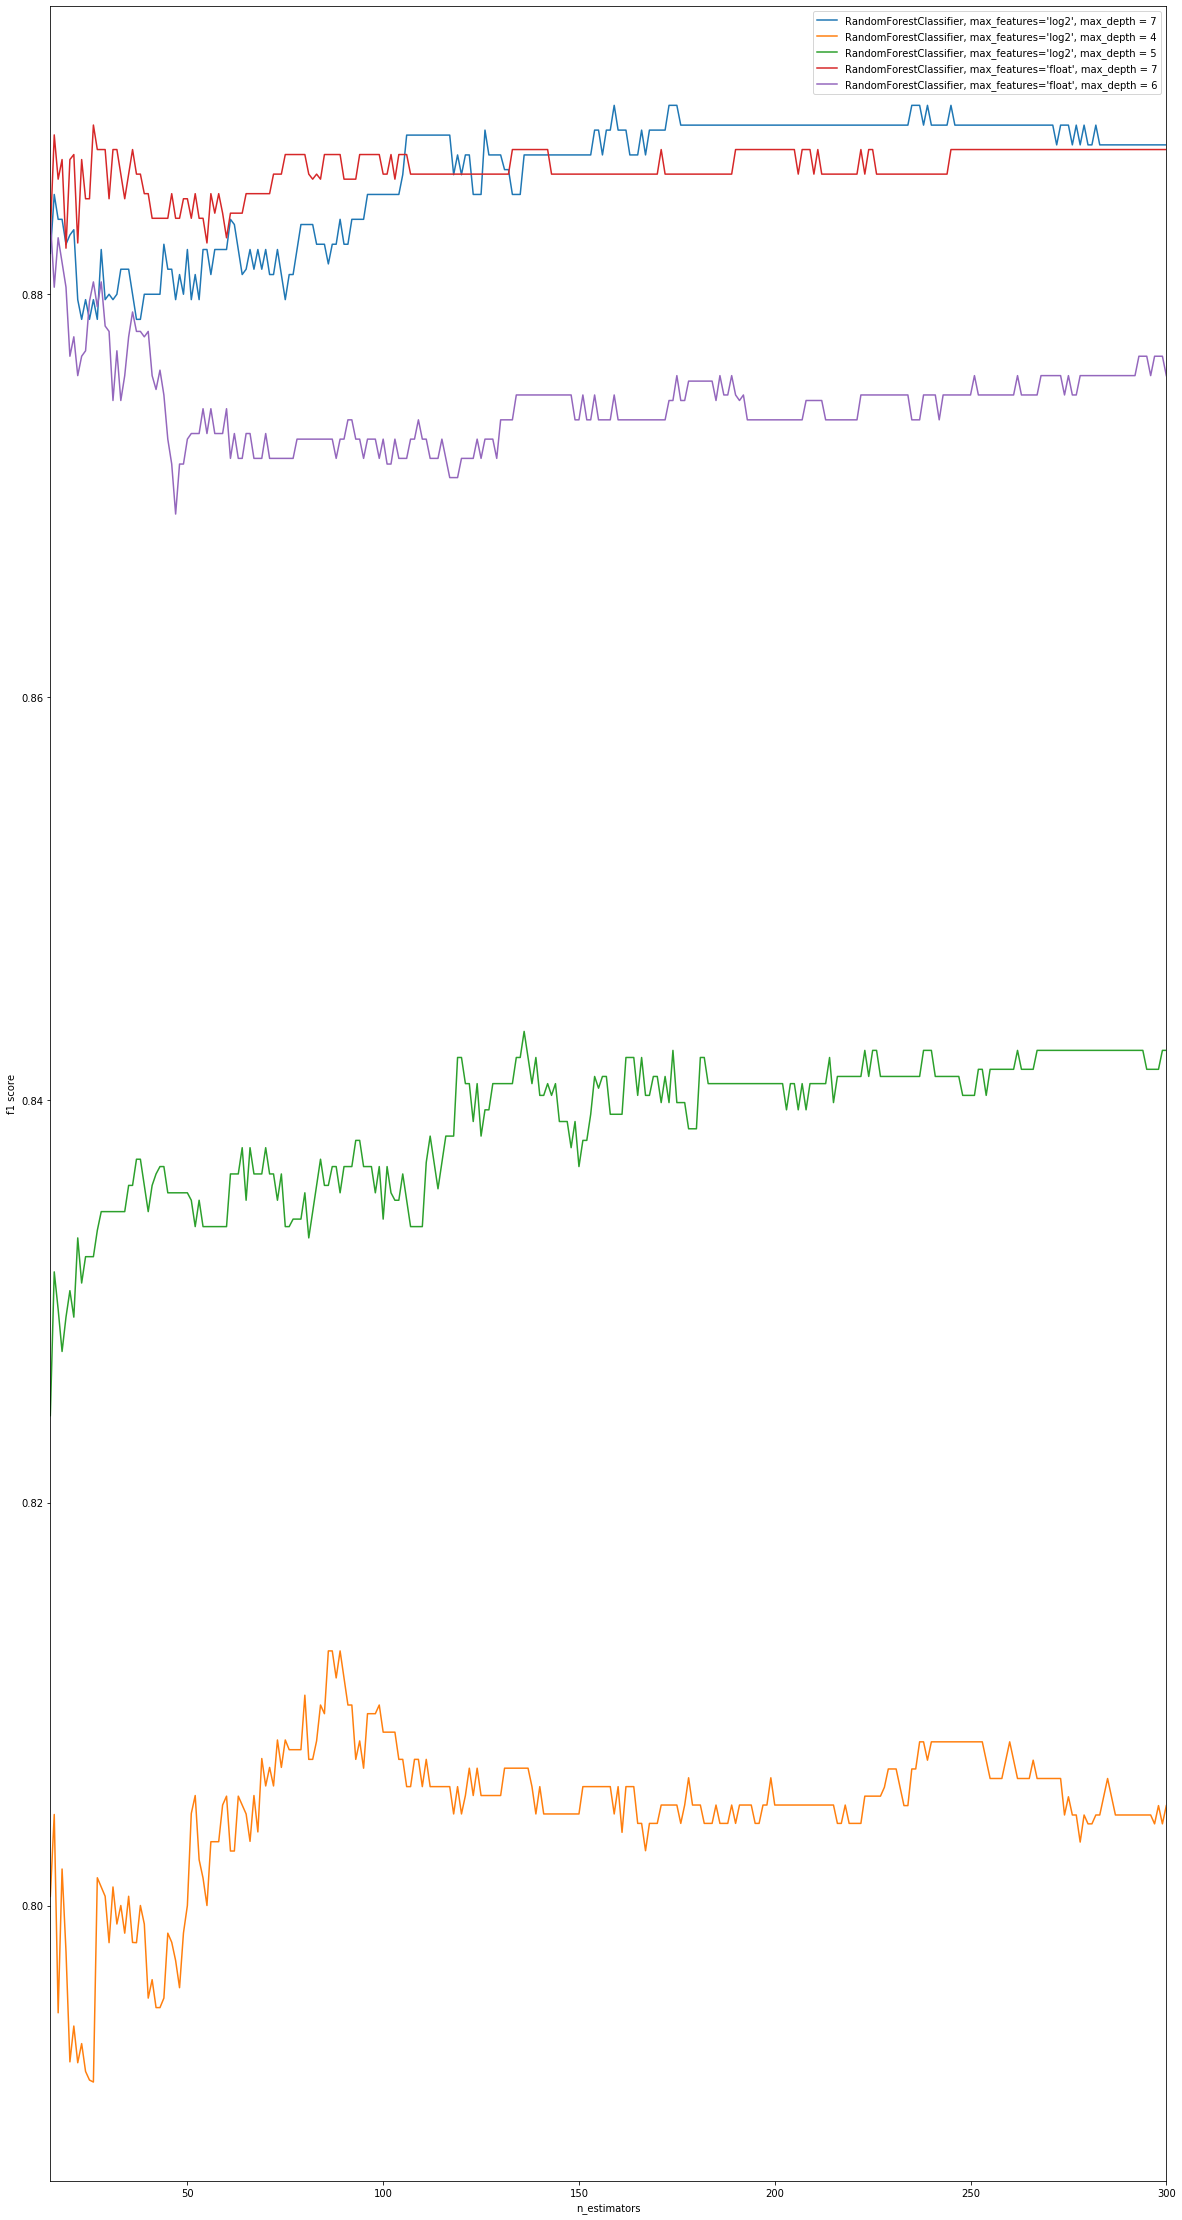

In [57]:
plt.figure(figsize = (20, 40))
for label, clf_err in f1_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("f1 score")
plt.legend(loc="upper right")
plt.show()

- Picking up the model with max_depth = 6 from above and checking for criterion parameter of random forest :

In [28]:
ensemble_clf_refined = [
       ("RandomForestClassifier, max_features='float', max_depth = 6, criterion = 'gini'",
        RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=6, max_features= 0.4,
                       max_leaf_nodes=32, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=3000,
                       n_jobs=-1, oob_score=True, random_state=50, verbose=0,
                       warm_start=True)),
    ("RandomForestClassifier, max_features='float', max_depth = 6, criterion = 'entropy'",
        RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=6, max_features= 0.4,
                       max_leaf_nodes=32, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=3000,
                       n_jobs=-1, oob_score=True, random_state=50, verbose=0,
                       warm_start=True))
    
]

In [29]:
# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clf_refined)
f1_rate = OrderedDict((label, []) for label, _ in ensemble_clf_refined)


# Range of `n_estimators` values to explore.
min_estimators = 500
max_estimators = 600


for label, clf in ensemble_clf_refined:
    for i in range(min_estimators, max_estimators + 1):
        clf.set_params(n_estimators=i)
        clf.fit(X, y)
        
        f1_rate[label].append((i,f1_score(list(clf.predict(X)), list(y))))

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

#### Plotting OOB error vs n_estimator for the refined model for n_estimator in range = (500, 601)

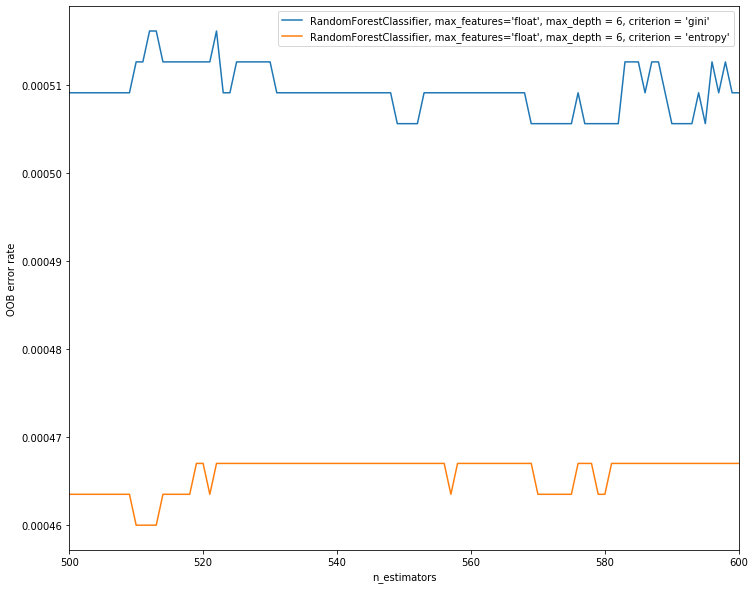

In [36]:
# Generate the "OOB error rate" vs. "n_estimators" plot.
plt.figure(figsize=(12,10))
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

#### Plotting f1 score vs n_estimator for the refined model for n_estimator in range = (500, 600)

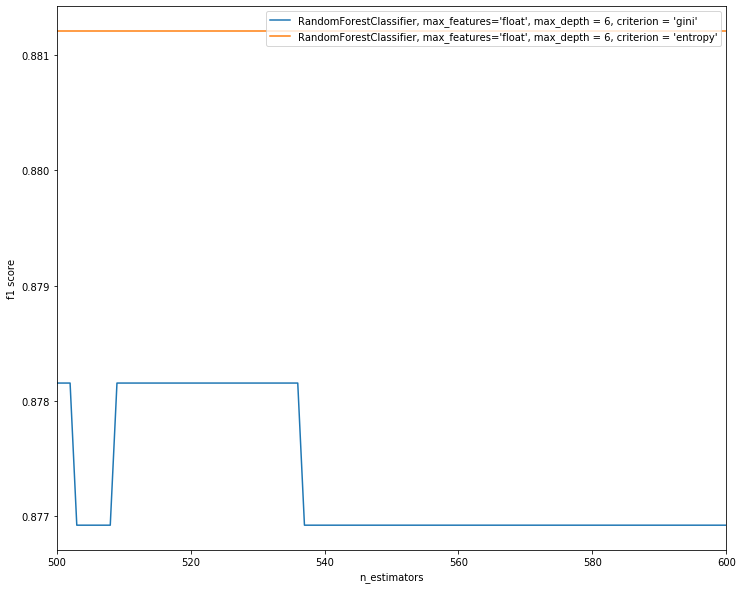

In [38]:
# Generate the "OOB error rate" vs. "n_estimators" plot.
plt.figure(figsize=(12,10))
for label, clf_err in f1_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("f1 score")
plt.legend(loc="upper right")
plt.show()

#### Plotting OOB error rate and f1 score vs n_estimator in range (900, 1000)

In [41]:
ensemble_clf_tuned = [
       ("RandomForestClassifier, max_features='float', max_depth = 6, criterion = 'entropy'",
        RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=6, max_features= 0.4,
                       max_leaf_nodes=32, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=3000,
                       n_jobs=-1, oob_score=True, random_state=50, verbose=0,
                       warm_start=True))
    
]

In [42]:
# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clf_tuned)
f1_rate = OrderedDict((label, []) for label, _ in ensemble_clf_tuned)


# Range of `n_estimators` values to explore.
min_estimators = 900
max_estimators = 1000


for label, clf in ensemble_clf_tuned:
    for i in range(min_estimators, max_estimators + 1):
        clf.set_params(n_estimators=i)
        clf.fit(X, y)
        
        f1_rate[label].append((i,f1_score(list(clf.predict(X)), list(y))))

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

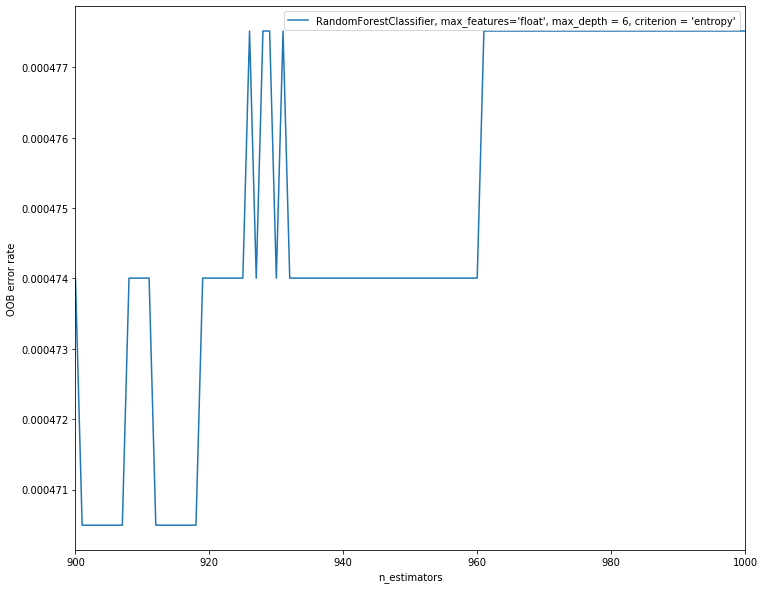

In [43]:
# Generate the "OOB error rate" vs. "n_estimators" plot.
plt.figure(figsize=(12,10))
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

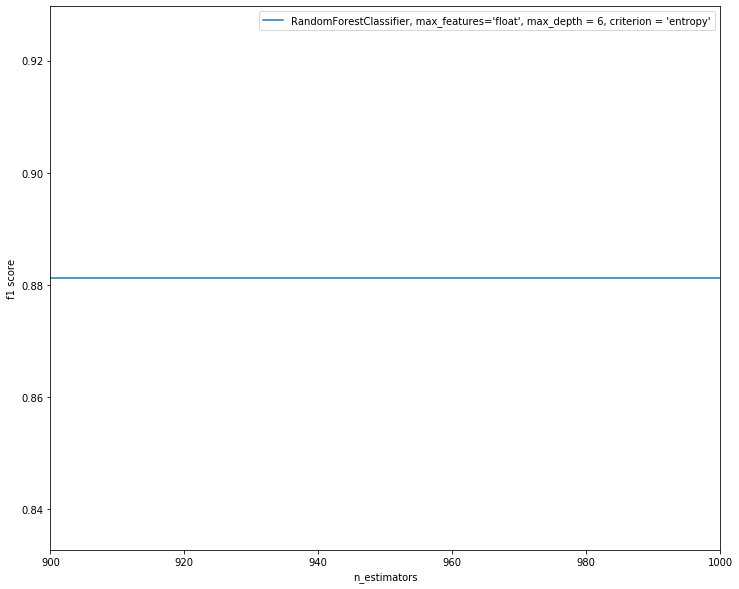

In [44]:
# Generate the "f1 score" vs. "n_estimators" plot.
plt.figure(figsize=(12,10))
for label, clf_err in f1_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("f1 score")
plt.legend(loc="upper right")
plt.show()

#### Creating Final model for random Forest

- As we can see in the above graphs, after n_estimators becomes greater than 300 we barely see an improvement in OOB error rate and f1 score of the model. So, fixing the n_estimator to 300 for the final model.

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y, 
                                                    test_size=0.2) # evaluation of results 

In [27]:
clf_rf = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=6, max_features= 0.4,
                       max_leaf_nodes=32, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=-1, oob_score=True, random_state=4547, verbose=0,
                       warm_start=True).fit(X_train, y_train)

In [28]:
y_pred = clf_rf.predict(X_train)

- Calculating Precision, recall, accuracy of the final model for training dataset

In [30]:
from sklearn.metrics import confusion_matrix
cm1 = metrics.confusion_matrix(y_train, y_pred )

In [32]:
total1=sum(sum(cm1))
accuracy = (cm1[0,0]+cm1[1,1])/total1
precision = cm1[1,1]/(cm1[1,1]+cm1[0,1])
recall = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print(accuracy)
print(precision)
print(recall)

0.9996401062125568
0.9457142857142857
0.8401015228426396


From above we get f1_score = 0.889

- Calculating Precision, recall, f1_score, accuracy of test dataset :

In [33]:
y_pred_test = clf_rf.predict(X_test)

In [34]:
from sklearn.metrics import confusion_matrix
cm_test = metrics.confusion_matrix(y_test, y_pred_test )

In [38]:
cm_test

array([[56855,     9],
       [   22,    76]], dtype=int64)

In [35]:
total_test=sum(sum(cm_test))
accuracy = (cm_test[0,0]+cm_test[1,1])/total_test
precision = cm_test[1,1]/(cm_test[1,1]+cm_test[0,1])
recall = cm_test[1,1]/(cm_test[1,0]+cm_test[1,1])
print(accuracy)
print(precision)
print(recall)

0.9994557775359011
0.8941176470588236
0.7755102040816326


- From above we get f1_score ~ 0.83

#### Print Top 3 features and plot a scatter plot in between them to show their linear seperability

Top var = 12
2nd Top var = 14
3rd Top var = 9


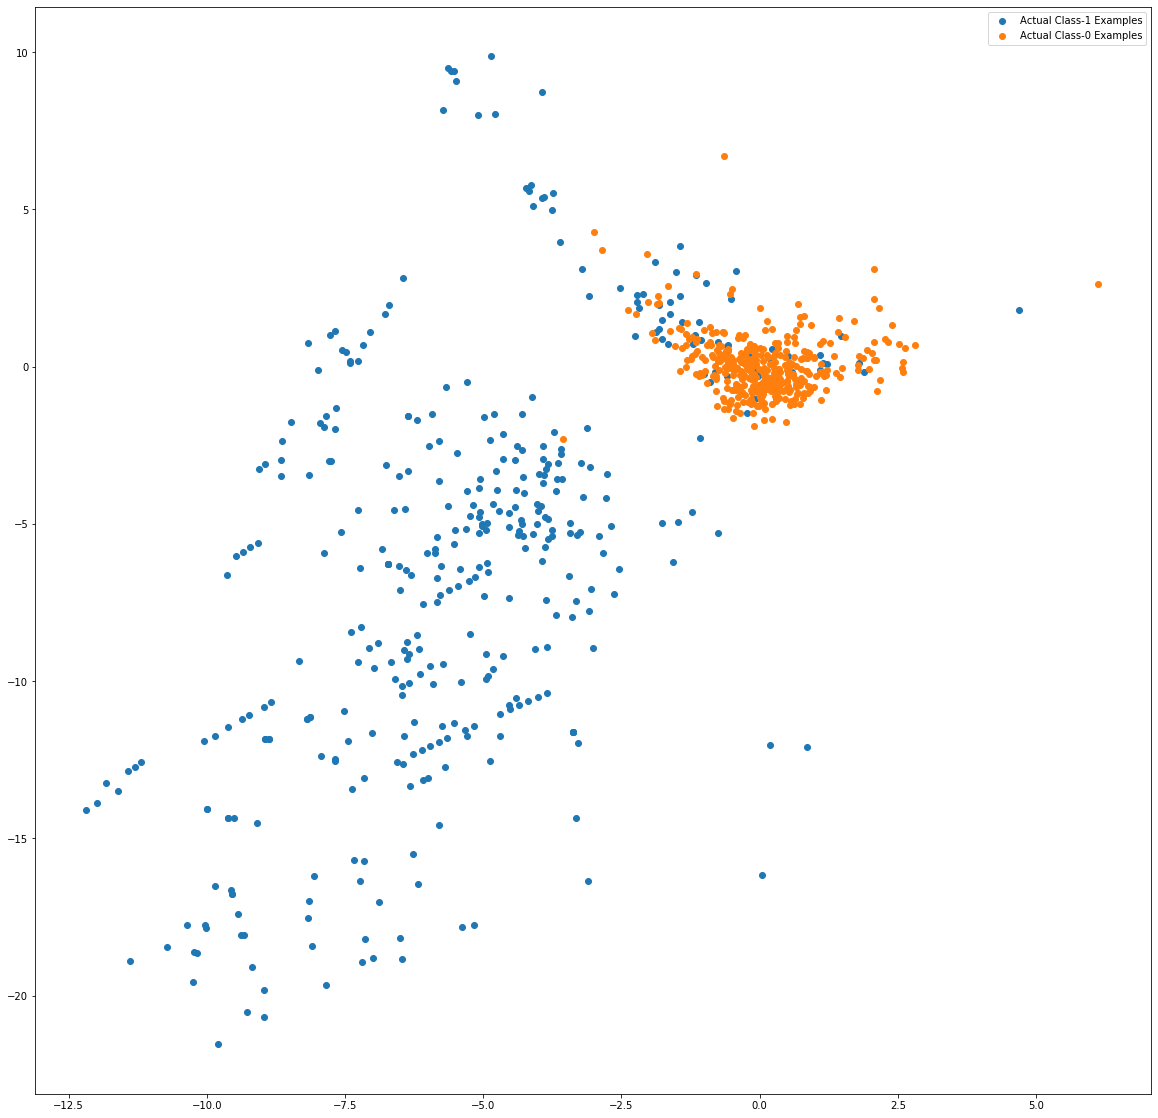

In [39]:
var_imp = []
for i in clf_rf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf_rf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf_rf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf_rf.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf_rf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf_rf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

The Top 3 predictors for Random Forest are :
- V14
- V17
- V10

# Classification Using XGboost

##### Performing Hyperparameter tuning for XGBoost model

In [179]:
from xgboost.sklearn import XGBClassifier

In [239]:
learning_r = [0.05, 0.2]
minimum_child_wt = [5,6]
num_tree = [250]
max_ht = [4, 5, 6]
n_ft = [0.2, 0.3, 0.35]
min_los = [0.35, 0.5, 0.6]
subsamples = [0.4, 0.6]

hyper_params = {'learning_rate': learning_r,
                    'min_child_weight': minimum_child_wt,
                    'n_estimators': num_tree,
                    'max_depth': max_ht,
                    'colsample_bytree': n_ft,
                    'gamma':min_los,
                    'subsample' : subsamples
               }

model_xgb = XGBClassifier(random_state=4574, nthread = -1, silent = 0)

flds = RepeatedStratifiedKFold(n_splits = 2, n_repeats = 50, random_state = 6768)
rsearch_cv = RandomizedSearchCV(estimator=model_xgb, 
                                param_distributions=hyper_params, 
                                cv=flds, scoring=['roc_auc', 'precision', 'recall', 'f1', 'accuracy'],
                                verbose=10, n_iter = 10,
                                n_jobs=-1, refit = 'f1',
                                random_state=342)

In [248]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y, 
                                                    test_size=0.2) # evaluation of results 

In [240]:
rsearch_cv.fit(X,y)

Fitting 100 folds for each of 10 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  8.8min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed: 11.2min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed: 12.7min
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed: 15.7min
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed: 18.0min
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed: 20.8min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed: 23.2min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed: 26.6min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 29.2min
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed: 32

RandomizedSearchCV(cv=RepeatedStratifiedKFold(n_repeats=50, n_splits=2, random_state=6768),
                   error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=-1,
                                           objecti...
                   iid='deprecated', n_iter=10, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.2, 0.3, 0.35],
                                        'gamma': [0.35, 0.5, 0.6],
                                        'l

##### Grid Search Results for Xgboost :

In [245]:
pd.DataFrame(rsearch_cv.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0  43.671726      1.875684      2.939542         0.635058         
1  37.251454      2.834655      3.125973         0.210473         
2  44.702625      2.846625      3.261407         0.225395         
3  39.549499      2.307111      3.080103         0.151043         
4  43.551874      2.147502      3.329204         0.163658         
5  29.921965      2.056552      2.691599         0.121105         
6  52.330743      1.842819      3.102691         0.121796         
7  32.251201      1.323397      3.429391         0.141602         
8  35.562030      1.801588      2.802508         0.126232         
9  40.955745      1.887921      2.593416         0.165336         

  param_subsample param_n_estimators param_min_child_weight param_max_depth  \
0  0.4             250                5                      4                
1  0.6             250                6                      5                
2  0.6             250                6                      5                
3  0.4             250                5                      5                
4  0.6             250                6                      4                
5  0.4             250                5                      4                
6  0.6             250                5                      5                
7  0.6             250                5                      5                
8  0.4             250                6                      5                
9  0.4             250                6                      6                

  param_learning_rate param_gamma param_colsample_bytree  \
0  0.05                0.5         0.35                    
1  0.05                0.5         0.2                     
2  0.2                 0.6         0.35                    
3  0.2                 0.35        0.35                    
4  0.2                 0.5         0.3                     
5  0.05                0.6         0.2                     
6  0.05                0.6         0.35                    
7  0.2                 0.5         0.2                     
8  0.2                 0.5         0.3                     
9  0.05                0.6         0.3                     

                                                                                                                                          params  \
0  {'subsample': 0.4, 'n_estimators': 250, 'min_child_weight': 5, 'max_depth': 4, 'learning_rate': 0.05, 'gamma': 0.5, 'colsample_bytree': 0.35}   
1  {'subsample': 0.6, 'n_estimators': 250, 'min_child_weight': 6, 'max_depth': 5, 'learning_rate': 0.05, 'gamma': 0.5, 'colsample_bytree': 0.2}    
2  {'subsample': 0.6, 'n_estimators': 250, 'min_child_weight': 6, 'max_depth': 5, 'learning_rate': 0.2, 'gamma': 0.6, 'colsample_bytree': 0.35}    
3  {'subsample': 0.4, 'n_estimators': 250, 'min_child_weight': 5, 'max_depth': 5, 'learning_rate': 0.2, 'gamma': 0.35, 'colsample_bytree': 0.35}   
4  {'subsample': 0.6, 'n_estimators': 250, 'min_child_weight': 6, 'max_depth': 4, 'learning_rate': 0.2, 'gamma': 0.5, 'colsample_bytree': 0.3}     
5  {'subsample': 0.4, 'n_estimators': 250, 'min_child_weight': 5, 'max_depth': 4, 'learning_rate': 0.05, 'gamma': 0.6, 'colsample_bytree': 0.2}    
6  {'subsample': 0.6, 'n_estimators': 250, 'min_child_weight': 5, 'max_depth': 5, 'learning_rate': 0.05, 'gamma': 0.6, 'colsample_bytree': 0.35}   
7  {'subsample': 0.6, 'n_estimators': 250, 'min_child_weight': 5, 'max_depth': 5, 'learning_rate': 0.2, 'gamma': 0.5, 'colsample_bytree': 0.2}     
8  {'subsample': 0.4, 'n_estimators': 250, 'min_child_weight': 6, 'max_depth': 5, 'learning_rate': 0.2, 'gamma': 0.5, 'colsample_bytree': 0.3}     
9  {'subsample': 0.4, 'n_estimators': 250, 'min_child_weight': 6, 'max_depth': 6, 'learning_rate': 0.05, 'gamma': 0.6, 'colsample_bytree': 0.3}    

   split0_test_roc_auc  split1_test_roc_auc  split2_test_roc_auc  \
0  0.976703             0.979902     

##### Best params for Xgboost

In [246]:
rsearch_cv.best_params_

{'subsample': 0.6,
 'n_estimators': 250,
 'min_child_weight': 6,
 'max_depth': 5,
 'learning_rate': 0.2,
 'gamma': 0.6,
 'colsample_bytree': 0.35}

##### Best Estimator for Xgboost

In [247]:
rsearch_cv.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.35, gamma=0.6,
              learning_rate=0.2, max_delta_step=0, max_depth=5,
              min_child_weight=6, missing=None, n_estimators=250, n_jobs=1,
              nthread=-1, objective='binary:logistic', random_state=4574,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=0, subsample=0.6, verbosity=1)

##### Final model for classification of dataset

In [249]:
clf_xgb = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.35, gamma=0.6,
              learning_rate=0.2, max_delta_step=0, max_depth=5,
              min_child_weight=6, missing=None, n_estimators=250, n_jobs=1,
              nthread=-1, objective='binary:logistic', random_state=4574,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=0, subsample=0.6, verbosity=1).fit(X_train, y_train)

In [250]:
X_train['Predicted_Class'] = clf_xgb.predict(X_train)

##### Precision, Recall Accuracy, Confusion matrix, f1_score for training dataset

In [254]:
cm = metrics.confusion_matrix(y_train, X_train['Predicted_Class'] )
cm

array([[227448,      3],
       [    49,    345]], dtype=int64)

In [256]:
total1=sum(sum(cm))
accuracy = (cm[0,0]+cm[1,1])/total1
precision = cm[1,1]/(cm[1,1]+cm[0,1])
recall = cm[1,1]/(cm[1,0]+cm[1,1])
print(accuracy)
print(precision)
print(recall)
print(f1_score(X_train['Predicted_Class'].tolist(), list(y_train)))

0.9997717746713775
0.9913793103448276
0.8756345177664975
0.9299191374663073


##### Precision, Recall Accuracy, Confusion matrix, f1_score for testing dataset

In [257]:
X_test['Predicted_Class'] = clf_xgb.predict(X_test)

In [259]:
X_test.head()

V1        V2        V3        V4        V5        V6        V7  \
59868  -0.042398 -0.778121  0.021917  0.954940 -0.629964  0.064247  0.236362   
277042  0.398190  0.558228 -0.689561  0.982718  0.136429 -0.683536  0.443160   
35273   0.605155 -0.562783 -0.489904 -0.599750  0.928359  2.455375 -0.942175   
229464 -0.079538 -0.690506  0.915340 -1.995149 -1.007556  0.460995 -0.707905   
180441  1.355148 -0.614223 -0.483839  0.434178 -0.604956  0.147458 -0.704228   

              V9       V10       V11       V12       V14       V16       V17  \
59868   0.073404 -0.003964  1.440345  0.152261  1.058417  0.242857 -0.386067   
277042 -0.053745 -0.051450 -0.280404 -0.512576 -0.860157 -0.865760  1.545449   
35273   0.978876 -0.355483 -0.531228  0.303865 -0.493587  0.176173 -0.453561   
229464 -1.574455  0.843878  0.559127 -0.113597 -1.084983  0.072280 -0.169562   
180441  0.018672  0.931507 -1.588947 -0.847002  0.039227 -0.943038 -0.727425   

             V18       V19    Amount  Predicted_Class  
59868  -0.122173 -0.666816  1.663323  0                
277042  1.152170  2.527604  0.122789  0                
35273  -0.237120  1.008402  0.605325  0                
229464  1.013413 -0.348870  0.754412  0                
180441  1.984694 -1.520912  0.724592  0

In [260]:
cm_test = metrics.confusion_matrix(y_test, X_test['Predicted_Class'] )
cm_test

array([[56862,     2],
       [   16,    82]], dtype=int64)

In [261]:
total1=sum(sum(cm_test))
accuracy = (cm_test[0,0]+cm_test[1,1])/total1
precision = cm_test[1,1]/(cm_test[1,1]+cm_test[0,1])
recall = cm_test[1,1]/(cm_test[1,0]+cm_test[1,1])
print(accuracy)
print(precision)
print(recall)
print(f1_score(X_test['Predicted_Class'].tolist(), list(y_test)))

0.9996839998595555
0.9761904761904762
0.8367346938775511
0.9010989010989012


### Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

In [ ]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

## Model building with balancing Classes

##### Class balancing methods :
- Random Oversampling - Puts a weight on minority class to balance the data balance. Since, this does not add any new information to the dataset we wont use this one.
- SMOTE - Put a data point vectorically between two points of same class
- ADASYN - This is similar to SMOTE except for it has an additional feature that it add data point where density is less

## Model Building
- Build different models on the balanced dataset and see the result

### Import Oversampling

In [26]:
from imblearn import over_sampling 

C:\Users\My Pc\Anaconda3 2020\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
C:\Users\My Pc\Anaconda3 2020\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


### Print the class distribution after applying SMOTE 

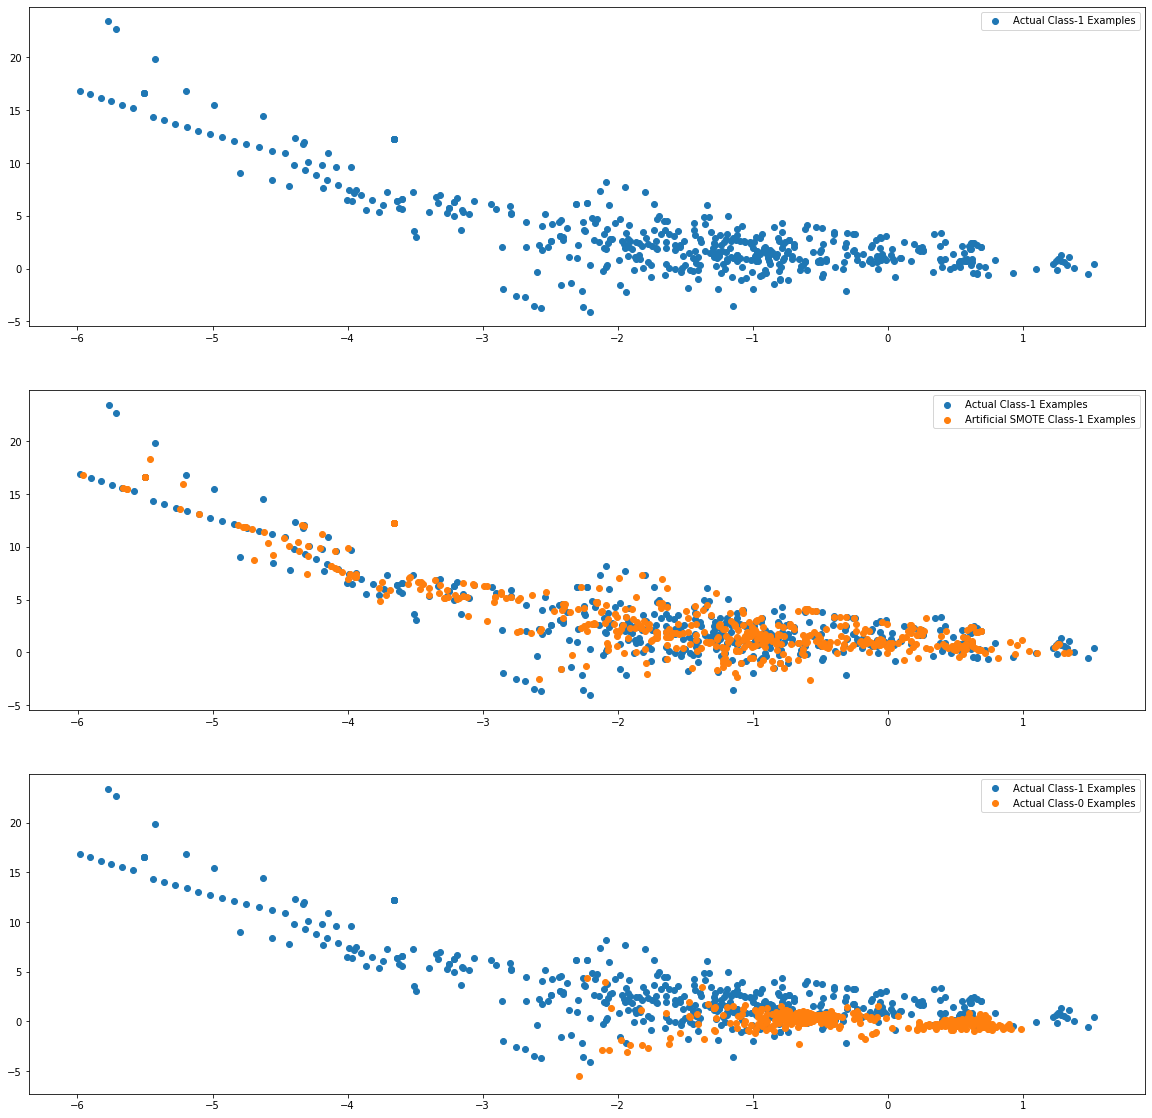

In [277]:
import warnings
warnings.filterwarnings("ignore")


sm = over_sampling.SMOTE(random_state=0)
X_smote, y_smote = sm.fit_resample(X, y)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_smote_1 = X_smote[X.shape[0]:]

X_1 = X.to_numpy()[np.where(y==1.0)]
X_0 = X.to_numpy()[np.where(y==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_1[:, 0], X_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_1[:, 0], X_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_smote_1[:X_1.shape[0], 0], X_smote_1[:X_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_1[:, 0], X_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_0[:X_1.shape[0], 0], X_0[:X_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

##### Convert the SMOTE output to dataframe

In [278]:
X_smote = pd.DataFrame(X_smote, columns = X.columns)

X_smote.sort_index(axis=0, inplace = True)

y_smote = pd.DataFrame(y_smote, columns = ['Class'])

y_smote.sort_index(axis=0, inplace = True)

from sklearn.model_selection import train_test_split
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, y_smote, test_size=0.33, random_state=42)

X_train_smote.sort_index(axis=0, inplace = True)
y_train_smote.sort_index(axis=0, inplace = True)

X_test_smote.sort_index(axis=0, inplace = True)
y_test_smote.sort_index(axis=0, inplace = True)

### Logistic Regression with SMOTE

In [31]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression #import the package
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
''
num_C = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.02, 0.07, 0.1, 0.25, 0.40] 
# creating a KFold object with num_split 
folds = StratifiedKFold(n_splits = 7, shuffle = True, random_state = 100)
LR = LogisticRegression(warm_start = True, n_jobs= -1,max_iter= 1000, solver = 'saga')
# specify range of hyperparameters
hyper_params = [{'C' : num_C}]
rsearch_cv = RandomizedSearchCV(estimator=LR, 
                                param_distributions=hyper_params, 
                                cv=folds, scoring= ['roc_auc', 'recall', 'accuracy', 'f1'],
                                verbose=5,
                                n_jobs=-1,
                                random_state=200, return_train_score = True, refit = 'f1')
rsearch_cv.fit(X_smote, y_smote)

Fitting 7 folds for each of 10 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed: 10.9min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=7, random_state=100, shuffle=True),
                   error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=1000,
                                                multi_class='auto', n_jobs=-1,
                                                penalty='l2', random_state=None,
                                                solver='saga', tol=0.0001,
                                                verbose=0, warm_start=True),
                   iid='deprecated', n_iter=10, n_jobs=-1,
                   param_distributions=[{'C': [0.0001, 0.0005, 0.001, 0.005,
                                               0.01, 0.02, 0.07, 0.1, 0.25,
                                               0.4]}],
 

In [143]:
model_logistic = pd.DataFrame(rsearch_cv.cv_results_)

model_logistic_model = rsearch_cv.best_estimator_

model_logistic_best_params = rsearch_cv.best_params_

#### Build Final Classifier(Logistic) based on the best params obtained

In [145]:
# build the final classifier

clf = LogisticRegression(C=0.07, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=-1, penalty='l2',
                   random_state=150, solver='saga', tol=0.0001, verbose=0,
                   warm_start=True).fit(X_train_smote, y_train_smote)

In [146]:
X_predicted_prob = pd.DataFrame(clf.predict_proba(X_train_smote), index = X_train_smote.index, columns = ['Predicted_Prob0', 'Predicted_Prob1'])

In [147]:
clf.coef_

array([[-0.39420326,  0.05332135, -0.69436209,  1.68894464, -0.11212447,
        -0.16219733, -0.36237193, -0.20141131, -1.05193333,  0.69551361,
        -1.3076751 , -1.39603583, -0.7564476 , -0.79528904, -0.20240716,
         0.06122876,  0.02630211]])

In [148]:
X_train_smote['Actual_Class'] = y_train_smote['Class']
X_train_smote.head()

V1        V2        V3        V4        V5        V6        V7  \
202634 -0.060608 -0.510560 -1.174131 -2.075894  0.164919 -0.352514  1.259840   
162217  1.670534 -0.353778 -1.402236 -0.612387  0.194838 -0.572280 -0.165886   
320444  0.470682  1.322530 -2.468254  2.256673 -0.847148 -1.574780 -2.325282   
158436 -0.317629  0.265571 -0.701765  1.684765  0.770458  0.716104  2.053278   
95353  -0.773664  0.708157 -0.140060 -1.456165  2.262573  2.158369  0.713988   

              V9       V10       V11       V12       V14       V16       V17  \
202634 -2.938587  0.831544 -1.724076 -1.360432 -0.033814 -1.336862  0.485693   
162217 -0.395824  0.308794 -0.981470 -1.075973 -1.324806  1.575540  1.333918   
320444  0.416666 -4.277950  3.294570 -4.009947 -4.243781 -2.596986 -1.739033   
158436 -1.533426  0.966272  1.537661 -2.082836  2.482369 -0.844769  1.078345   
95353   0.404512  0.575558  0.211970 -0.775007 -1.195357  0.751339 -1.357837   

             V18       V19    Amount  Actual_Class  
202634 -0.125918 -0.095903  1.327777  0             
162217 -1.250609  1.123713 -0.323061  0             
320444 -0.457728  1.227637 -1.190489  1             
158436  0.131529  2.555376  1.546565  0             
95353   0.116171 -0.590564 -0.988440  0

##### Plot the ROC curve for the new model

In [149]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [150]:
fpr, tpr, thresholds = metrics.roc_curve( X_train_smote.Actual_Class, X_predicted_prob.Predicted_Prob1, drop_intermediate = False )

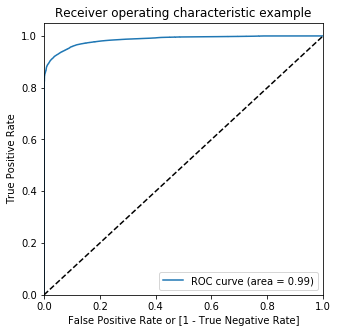

In [151]:
draw_roc(X_train_smote.Actual_Class, X_predicted_prob.Predicted_Prob1)

In [152]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    X_train_smote[i]= X_predicted_prob.Predicted_Prob1.map(lambda x: 1 if x > i else 0)
X_train_smote.tail()

V1        V2        V3        V4        V5        V6         V7  \
110268  0.429931 -0.687835  0.473983 -0.868502 -1.112009 -0.466390 -0.493683    
259178 -0.658920  0.010473 -0.852037 -0.889066  1.425721  2.466097 -0.376907    
365838 -4.076742  7.075459 -6.396923  5.166610 -9.341013 -2.823471 -13.276267   
131932 -0.344421  0.616341  1.137255  0.413136  0.243203 -0.600870  0.870323    
121958  0.662578 -0.561911  0.133456 -0.450200 -0.753027 -0.435180 -0.406213    

              V9        V10       V11       V12       V14       V16  \
110268  1.484799 -0.987371   1.364609  1.748958 -0.010243 -0.367768   
259178  0.412735 -0.592213  -0.378210  0.237857  0.356136 -0.011566   
365838 -9.425087 -16.406328  4.346998 -5.298372 -6.666098 -7.932984   
131932 -0.411719 -0.159033  -0.338046 -0.153942 -0.100750 -0.245927   
121958 -0.666864  0.534828  -0.507556 -0.588610 -0.440026  1.859800   

              V17       V18       V19    Amount  Actual_Class  0.0  0.1  0.2  \
110268 -0.315672   0.815507  1.040174  1.062025  0             1    0    0     
259178 -0.579390  -0.096195  0.126279  0.830375  0             1    0    0     
365838 -17.695512 -9.061339  3.755392  1.277594  1             1    1    1     
131932 -0.667194  -0.102354 -0.273130 -0.937807  0             1    0    0     
121958 -0.087203  -1.539649  0.829838  0.962922  0             1    0    0     

        0.3  0.4  0.5  0.6  0.7  0.8  0.9  
110268  0    0    0    0    0    0    0    
259178  0    0    0    0    0    0    0    
365838  1    1    1    1    1    1    1    
131932  0    0    0    0    0    0    0    
121958  0    0    0    0    0    0    0

##### Calculation of Precision, Recall, Accuracy, F1 score for train dataset

In [153]:
# Now let's calculate accuracy precision and recall for various probability cutoffs.
# We will Calculate the metrics and store the results in a list

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','precision','recall'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(X_train_smote.Actual_Class, X_train_smote[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    precision = cm1[1,1]/(cm1[1,1]+cm1[0,1])
    recall = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,precision,recall]
print(cutoff_df)

     prob  accuracy  precision    recall
0.0  0.0   0.499871  0.499871   1.000000
0.1  0.1   0.877123  0.811209   0.982940
0.2  0.2   0.927802  0.900622   0.961684
0.3  0.3   0.937924  0.937908   0.937908
0.4  0.4   0.941383  0.958155   0.923047
0.5  0.5   0.941527  0.971788   0.909426
0.6  0.6   0.939420  0.980809   0.896346
0.7  0.7   0.937866  0.986562   0.887793
0.8  0.8   0.934839  0.990412   0.878147
0.9  0.9   0.926503  0.995298   0.857017


<Figure size 3600x3600 with 0 Axes>

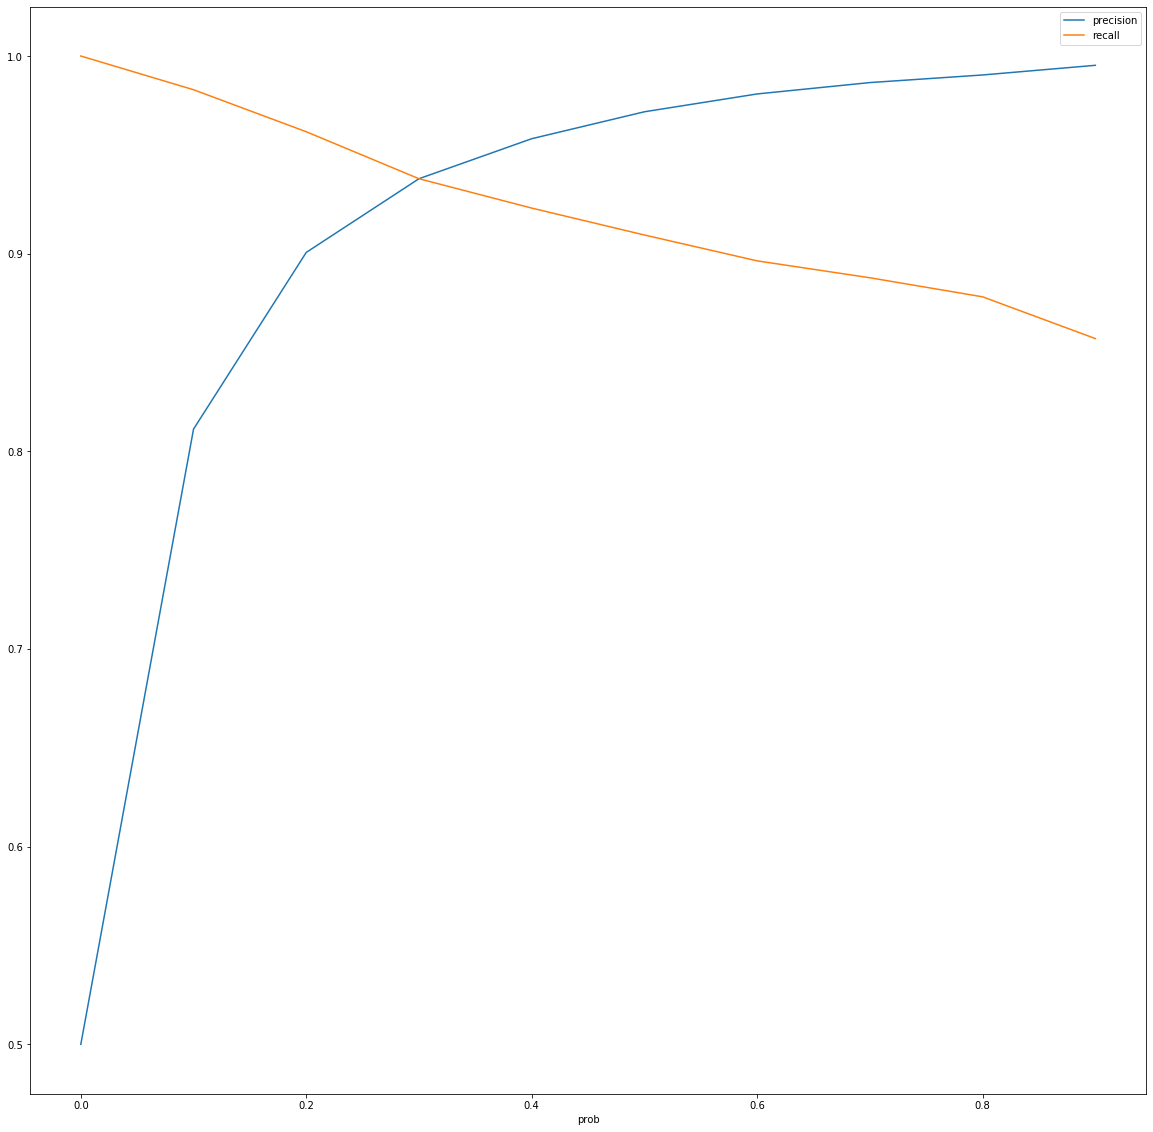

In [154]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
plt.figure(figsize=(50,50))
cutoff_df.plot.line(x='prob', y=['precision','recall'])
plt.show()

##### From the above curve we get 0.3 as the threshold probability

In [155]:
X_train_smote['final_predicted'] = X_predicted_prob.Predicted_Prob1.map( lambda x: 1 if x > 0.3 else 0)

X_train_smote.head()

V1        V2        V3        V4        V5        V6        V7  \
202634 -0.060608 -0.510560 -1.174131 -2.075894  0.164919 -0.352514  1.259840   
162217  1.670534 -0.353778 -1.402236 -0.612387  0.194838 -0.572280 -0.165886   
320444  0.470682  1.322530 -2.468254  2.256673 -0.847148 -1.574780 -2.325282   
158436 -0.317629  0.265571 -0.701765  1.684765  0.770458  0.716104  2.053278   
95353  -0.773664  0.708157 -0.140060 -1.456165  2.262573  2.158369  0.713988   

              V9       V10       V11       V12       V14       V16       V17  \
202634 -2.938587  0.831544 -1.724076 -1.360432 -0.033814 -1.336862  0.485693   
162217 -0.395824  0.308794 -0.981470 -1.075973 -1.324806  1.575540  1.333918   
320444  0.416666 -4.277950  3.294570 -4.009947 -4.243781 -2.596986 -1.739033   
158436 -1.533426  0.966272  1.537661 -2.082836  2.482369 -0.844769  1.078345   
95353   0.404512  0.575558  0.211970 -0.775007 -1.195357  0.751339 -1.357837   

             V18       V19    Amount  Actual_Class  0.0  0.1  0.2  0.3  0.4  \
202634 -0.125918 -0.095903  1.327777  0             1    0    0    0    0     
162217 -1.250609  1.123713 -0.323061  0             1    0    0    0    0     
320444 -0.457728  1.227637 -1.190489  1             1    1    1    1    1     
158436  0.131529  2.555376  1.546565  0             1    1    1    0    0     
95353   0.116171 -0.590564 -0.988440  0             1    0    0    0    0     

        0.5  0.6  0.7  0.8  0.9  final_predicted  
202634  0    0    0    0    0    0                
162217  0    0    0    0    0    0                
320444  1    1    1    1    1    1                
158436  0    0    0    0    0    0                
95353   0    0    0    0    0    0

In [156]:
# Let's check the overall accuracy.
metrics.accuracy_score(X_train_smote.Actual_Class, X_train_smote.final_predicted)

confusion_logistic_bal = metrics.confusion_matrix(X_train_smote.Actual_Class,  X_train_smote.final_predicted )
confusion_logistic_bal

array([[178715,  11825],
       [ 11825, 178617]], dtype=int64)

In [157]:
precision = confusion_logistic_bal[1,1]/(confusion_logistic_bal[1,1]+confusion_logistic_bal[0,1])
recall = confusion_logistic_bal[1,1]/(confusion_logistic_bal[1,0]+confusion_logistic_bal[1,1])
print(precision)
print(recall)

0.9379076044149925
0.9379076044149925


- Theirfore the f1 score for the model for training dataset is 0.9379076044149925

##### Calculation of Precision, Recall, Accuracy, F1 score for test dataset

In [158]:
X_test_smote.head()

V1         V2        V3        V4        V5        V6  \
437378 -0.366871  2.584815  -1.959499  2.685866  2.489731 -1.840729   
504222 -3.654682  12.272083 -4.242960  2.110641 -3.375857  3.353129   
4794   -0.692947  0.573291   1.805289  0.560674  0.118587 -0.178599   
388411 -1.635150  2.660299  -1.960119  2.409171 -1.284332 -0.569021   
424512 -1.924347  1.226676  -1.842884  2.702912 -1.328320 -0.810979   

               V7        V9       V10       V11       V12       V14       V16  \
437378  0.253677  -2.852091 -2.878464  1.735183 -2.047142 -5.174444  3.612675   
504222 -15.139054 -0.314898 -5.497736  3.826178 -3.089936 -6.712932 -5.296882   
4794    0.693203   0.976220 -0.414127  0.568975 -1.658281  0.821528 -0.978721   
388411 -3.758008  -2.796691 -5.940774  3.290090 -4.097838 -6.112730 -5.398241   
424512 -3.668682   0.328571 -6.036818  4.165413 -5.278070 -6.852044 -6.161960   

             V17       V18       V19    Amount  
437378  9.669598  3.194513 -4.521488 -1.536955  
504222 -6.284163 -3.562293  0.073411 -1.536955  
4794    1.068138 -0.459881  1.091186  0.216882  
388411 -9.018636 -5.248096 -0.331161 -1.597612  
424512 -9.422374 -4.611110  2.037555 -1.542932

In [159]:
X_test_Predicted_Prob = pd.DataFrame()
X_test_Predicted_Prob[['Predicted_Prob0','Predicted_Prob1']] = pd.DataFrame(clf.predict_proba(X_test_smote), index= X_test_smote.index)

In [160]:
X_test_smote['Actual_Class'] = y_test_smote['Class']
X_test_smote.head()

V1         V2        V3        V4        V5        V6  \
437378 -0.366871  2.584815  -1.959499  2.685866  2.489731 -1.840729   
504222 -3.654682  12.272083 -4.242960  2.110641 -3.375857  3.353129   
4794   -0.692947  0.573291   1.805289  0.560674  0.118587 -0.178599   
388411 -1.635150  2.660299  -1.960119  2.409171 -1.284332 -0.569021   
424512 -1.924347  1.226676  -1.842884  2.702912 -1.328320 -0.810979   

               V7        V9       V10       V11       V12       V14       V16  \
437378  0.253677  -2.852091 -2.878464  1.735183 -2.047142 -5.174444  3.612675   
504222 -15.139054 -0.314898 -5.497736  3.826178 -3.089936 -6.712932 -5.296882   
4794    0.693203   0.976220 -0.414127  0.568975 -1.658281  0.821528 -0.978721   
388411 -3.758008  -2.796691 -5.940774  3.290090 -4.097838 -6.112730 -5.398241   
424512 -3.668682   0.328571 -6.036818  4.165413 -5.278070 -6.852044 -6.161960   

             V17       V18       V19    Amount  Actual_Class  
437378  9.669598  3.194513 -4.521488 -1.536955  1             
504222 -6.284163 -3.562293  0.073411 -1.536955  1             
4794    1.068138 -0.459881  1.091186  0.216882  0             
388411 -9.018636 -5.248096 -0.331161 -1.597612  1             
424512 -9.422374 -4.611110  2.037555 -1.542932  1

In [161]:
X_test_smote['final_predicted'] = X_test_Predicted_Prob.Predicted_Prob1.map( lambda x: 1 if x > 0.3 else 0)

X_test_smote.head()

V1         V2        V3        V4        V5        V6  \
437378 -0.366871  2.584815  -1.959499  2.685866  2.489731 -1.840729   
504222 -3.654682  12.272083 -4.242960  2.110641 -3.375857  3.353129   
4794   -0.692947  0.573291   1.805289  0.560674  0.118587 -0.178599   
388411 -1.635150  2.660299  -1.960119  2.409171 -1.284332 -0.569021   
424512 -1.924347  1.226676  -1.842884  2.702912 -1.328320 -0.810979   

               V7        V9       V10       V11       V12       V14       V16  \
437378  0.253677  -2.852091 -2.878464  1.735183 -2.047142 -5.174444  3.612675   
504222 -15.139054 -0.314898 -5.497736  3.826178 -3.089936 -6.712932 -5.296882   
4794    0.693203   0.976220 -0.414127  0.568975 -1.658281  0.821528 -0.978721   
388411 -3.758008  -2.796691 -5.940774  3.290090 -4.097838 -6.112730 -5.398241   
424512 -3.668682   0.328571 -6.036818  4.165413 -5.278070 -6.852044 -6.161960   

             V17       V18       V19    Amount  Actual_Class  final_predicted  
437378  9.669598  3.194513 -4.521488 -1.536955  1             1                
504222 -6.284163 -3.562293  0.073411 -1.536955  1             1                
4794    1.068138 -0.459881  1.091186  0.216882  0             0                
388411 -9.018636 -5.248096 -0.331161 -1.597612  1             1                
424512 -9.422374 -4.611110  2.037555 -1.542932  1             1

In [162]:
# Let's check the overall accuracy.
metrics.accuracy_score(X_test_smote.Actual_Class, X_test_smote.final_predicted)

confusion_test_smote = metrics.confusion_matrix(X_test_smote.Actual_Class,  X_test_smote.final_predicted )
precision = confusion_test_smote[1,1]/(confusion_test_smote[1,1]+confusion_test_smote[0,1])
recall = confusion_test_smote[1,1]/(confusion_test_smote[1,0]+confusion_test_smote[1,1])
print(precision)
print(recall)

0.9368675571462048
0.9369573785859618


##### we get an f1_score of ~= 0.936

In [163]:
# Let's check the overall accuracy.
metrics.accuracy_score(X_test_smote.Actual_Class, X_test_smote.final_predicted)

confusion_logistic_bal_test = metrics.confusion_matrix(X_test_smote.Actual_Class,  X_test_smote.final_predicted )
confusion_logistic_bal_test

array([[87848,  5927],
       [ 5918, 87955]], dtype=int64)

- The top 3 predictor for Logistic regression on balanced dataset are :
    1. V4
    2. V14
    3. V12

### Using SVM classifier with SMOTE

In [ ]:
from sklearn.model_selection import train_test_split
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, y_smote, test_size=0.33, random_state=4476)

##### Hyperparameter tuning for SVM Classifier

In [31]:
# SVM using SGDClassifier
from sklearn.linear_model import SGDClassifier #import the package
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

#from sklearn.feature_selection import RFE

loss_metric = ['hinge', 'log', 'perceptron', 'squared_loss']
num_alpha = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.02, 0.07, 0.1, 0.25, 0.4, 0.8, 1, 10]  #--> list of values
average_values = [10, 25, 50, 75, 100]
learning_method = ['constant', 'optimal', 'adaptive']
eta0_values = [0.001, 0.01, 0.1, 0.25]
# creating a KFold object with num_split 
folds = StratifiedKFold(n_splits = 7, shuffle = True, random_state = 5665)
svm = SGDClassifier(warm_start = True, n_jobs= -1)
# specify range of hyperparameters
hyper_params = {'loss' : loss_metric, 'alpha' : num_alpha, 'average' : average_values, 'learning_rate' : learning_method, 
                'eta0' : eta0_values}
rsearch_cv = RandomizedSearchCV(estimator=svm, 
                                param_distributions=hyper_params, 
                                cv=folds, scoring=['roc_auc', 'recall', 'precision', 'accuracy', 'f1'],
                                verbose=5,
                                n_jobs=-1, n_iter = 300,
                                random_state=24675, return_train_score = True, refit = 'f1')
rsearch_cv.fit(X_smote, y_smote)

Fitting 7 folds for each of 300 candidates, totalling 2100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed: 15.5min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 21.8min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed: 32.7min
[Parallel(n_jobs=-1)]: Done 874 tasks      | elapsed: 45.8min
[Parallel(n_jobs=-1)]: Done 1144 tasks      | elapsed: 64.3min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed: 73.0min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed: 83.2min
[Parallel(n_jobs=-1)]: Done 2100 out of 2100 | elapsed: 92.6min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=7, random_state=5665, shuffle=True),
                   error_score=nan,
                   estimator=SGDClassifier(alpha=0.0001, average=False,
                                           class_weight=None,
                                           early_stopping=False, epsilon=0.1,
                                           eta0=0.0, fit_intercept=True,
                                           l1_ratio=0.15,
                                           learning_rate='optimal',
                                           loss='hinge', max_iter=1000,
                                           n_iter_no_change=5, n_jobs=-1,
                                           penalty='l2', power_t=0.5,
                                           rand...
                   param_distributions={'alpha': [0.0001, 0.0005, 0.001, 0.005,
                                                  0.01, 0.02, 0.07, 0.1, 0.25,
                                           

##### Grid Search results for hyperparameter tuning

In [32]:
model_svm = pd.DataFrame(rsearch_cv.cv_results_)
model_svm_model = rsearch_cv.best_estimator_
model_svm_best_params = rsearch_cv.best_params_

In [33]:
model_svm.sort_values(by=['rank_test_f1'])

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
36   2.097492       0.213811      0.180360         0.017190         
54   1.524907       0.024390      0.203425         0.025093         
204  8.297255       0.149053      0.216111         0.026966         
63   1.744010       0.072272      0.210821         0.019707         
141  6.696858       0.091446      0.205410         0.023440         
100  2.805010       0.124753      0.215428         0.018512         
49   1.916319       0.067529      0.250924         0.029835         
75   7.455678       0.279840      0.180791         0.029066         
43   2.303771       0.434804      0.225946         0.032491         
41   1.599682       0.083469      0.239967         0.039460         
162  2.077591       0.508738      0.202017         0.024682         
160  7.152494       0.256255      0.201659         0.028595         
246  2.150540       0.411834      0.216648         0.035952         
151  1.745208       0.102746      0.202902         0.021643         
115  6.495710       0.103839      0.194393         0.023943         
264  6.925246       0.231344      0.209212         0.019108         
65   11.775887      0.644170      0.238011         0.070551         
266  2.219035       0.400837      0.231240         0.040931         
202  1.904898       0.042881      0.224601         0.027367         
96   1.985611       0.171996      0.223824         0.050902         
91   2.075489       0.213276      0.231170         0.036195         
170  1.918975       0.138282      0.216663         0.028440         
279  10.861910      0.393983      0.201857         0.023161         
60   10.617843      0.452781      0.210938         0.014105         
267  10.796406      0.366437      0.211034         0.026522         
132  1.860792       0.090681      0.257489         0.042851         
4    11.903411      0.423371      0.231516         0.035421         
282  7.068676       0.115153      0.196640         0.020706         
150  10.789661      0.566412      0.210963         0.019839         
15   7.113272       0.144512      0.213079         0.012800         
89   6.798829       0.218720      0.206754         0.026361         
83   1.814306       0.050245      0.230176         0.033328         
250  6.762857       0.185356      0.222408         0.034851         
166  1.833097       0.103532      0.236256         0.028932         
120  2.011822       0.072442      0.238063         0.023590         
285  2.485036       0.384165      0.210110         0.024446         
142  2.208966       0.654900      0.218830         0.016467         
299  2.303045       0.111276      0.217274         0.016645         
11   2.381389       0.372633      0.226535         0.030823         
52   2.326725       0.549992      0.224085         0.019399         
98   2.495249       0.413263      0.209838         0.016617         
39   2.513586       0.671408      0.213351         0.030785         
214  2.188768       0.067454      0.226901         0.028209         
131  2.258130       0.175095      0.243422         0.038438         
73   2.249638       0.078002      0.179599         0.006454         
61   11.292317      0.475376      0.206456         0.015481         
259  11.534051      0.543181      0.200773         0.008394         
20   11.658208      0.509244      0.234640         0.027608         
215  2.886615       0.354550      0.229600         0.041362         
178  14.120666      1.294265      0.207166         0.024125         
99   1.893745       0.134330      0.207813         0.013941         
256  1.775754       0.221371      0.187072         0.021339         
163  1.911455       0.062459      0.220849         0.031180         
257  2.459572       0.454505      0.228811         0.030933         
168  2.499975       0.500057      0.237367         0.016320         
248  1.870409       0.152978      0.216047         0.034762         
51   1.964020       0.194296      0.201640         0.011190         
263

In [34]:
model_svm_best_params

{'loss': 'log',
 'learning_rate': 'constant',
 'eta0': 0.25,
 'average': 25,
 'alpha': 0.0001}

In [35]:
model_svm_model

SGDClassifier(alpha=0.0001, average=25, class_weight=None, early_stopping=False,
              epsilon=0.1, eta0=0.25, fit_intercept=True, l1_ratio=0.15,
              learning_rate='constant', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=-1, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=True)

##### Classifier using SVM & tuned paramters

In [37]:
# build classifier with tuned parameters

clf_svm_bal = SGDClassifier(alpha=0.0001, average=25, class_weight=None, early_stopping=False,
              epsilon=0.1, eta0=0.25, fit_intercept=True, l1_ratio=0.15,
              learning_rate='constant', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=-1, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=True).fit(X_train_smote, y_train_smote)

In [38]:
X_train_smote['Predicted'] = list(clf_svm_bal.predict(X_train_smote))

In [41]:
X_train_smote['Actual_Class'] = y_train_smote['Class']
X_train_smote.head(30)

V1         V2        V3        V4        V5        V6  \
202634 -0.060608 -0.510560  -1.174131 -2.075894  0.164919 -0.352514   
162217  1.670534 -0.353778  -1.402236 -0.612387  0.194838 -0.572280   
320444  0.470682  1.322530  -2.468254  2.256673 -0.847148 -1.574780   
158436 -0.317629  0.265571  -0.701765  1.684765  0.770458  0.716104   
95353  -0.773664  0.708157  -0.140060 -1.456165  2.262573  2.158369   
194241 -0.766909  1.593272  -1.149702  0.657655  0.737261 -0.018014   
137590  0.669831 -0.343725   0.596741  0.120149 -0.772457 -0.052391   
466636 -1.159914  1.197351  -0.500695  1.568748 -1.076708  0.104746   
378239 -2.061442  2.638334  -3.871315  3.108829 -2.536192 -2.629331   
502502 -0.544293  3.946307  -3.594274  4.378716  0.001329 -2.598292   
531543 -4.261559  11.616771 -6.940671  5.877639 -9.087814 -0.604194   
323797 -4.596204  9.174273  -6.992411  3.834910 -9.965845 -1.976535   
395790 -0.616392  0.718067  -1.390022  0.404531 -0.813332  0.106673   
423675 -1.514416  1.193542  -3.282134  3.067972 -2.800850 -0.849751   
14547   0.644428  0.046797   0.062343  0.483080 -0.331022 -0.569192   
532210 -3.654682  12.272083 -4.242960  2.110641 -3.375857  3.353129   
471369  0.428569  2.097691  -2.136378  2.867907  2.260933 -1.921290   
492414 -1.803099  2.820688  -3.451393  4.272541 -0.392327 -1.825929   
373279 -0.932240  2.157101  -2.506254  1.576337 -1.555783  0.054467   
259036 -0.344716  0.679045  -0.213011 -0.536097  0.573083 -0.517437   
484823 -0.134433  2.011884  -1.935542  2.763808  2.491439 -2.127008   
224850 -0.546565  0.143838   0.022579 -0.521839  0.677783 -0.352738   
198493  1.317230 -1.262679  -0.873269 -1.247439 -0.852418  0.306973   
482975 -1.007404 -2.563502  -1.098849  0.825796 -1.248896  0.255490   
168789 -0.583112  0.473912  -0.717538  0.969684  0.416391 -0.955074   
283646 -0.474730  0.258091  -0.026765 -0.664997  0.992260  0.751257   
545743 -4.115702  8.131225  -7.766628  6.326171 -6.426119 -2.278324   
441247 -0.067398  1.153877  -1.085648  2.437306 -0.826512 -0.672332   
297159  0.990331 -0.127325  -0.987440  0.579797  0.264404 -0.227265   
271688 -0.569475  0.066386   0.805095 -1.011200  0.669979  0.231993   

               V7        V9        V10       V11       V12       V14  \
202634  1.259840  -2.938587  0.831544  -1.724076 -1.360432 -0.033814   
162217 -0.165886  -0.395824  0.308794  -0.981470 -1.075973 -1.324806   
320444 -2.325282   0.416666 -4.277950   3.294570 -4.009947 -4.243781   
158436  2.053278  -1.533426  0.966272   1.537661 -2.082836  2.482369   
95353   0.713988   0.404512  0.575558   0.211970 -0.775007 -1.195357   
194241  0.535908  -1.023111 -0.531177   0.387910  0.314901 -0.383563   
137590 -0.601893   1.117024 -0.309735  -1.224836 -0.290256 -0.423166   
466636  0.231471  -0.545153 -1.978603   1.865660 -3.259128 -2.047938   
378239 -5.389046  -4.881365 -9.541775   5.460372 -4.639961 -8.334639   
502502 -2.514638  -4.816111 -6.678874   3.908706 -4.284714 -9.006119   
531543 -19.027580 -9.325394 -20.308033  4.734501 -6.072207 -5.731173   
323797 -17.168099 -9.238351 -22.457833  4.273123 -5.170203 -6.207308   
395790 -1.807124  -0.571910 -3.639618   1.684135 -2.203190 -3.480028   
423675 -3.369099  -3.996659 -9.177684   5.603062 -4.880302 -8.249467   
14547  -0.093274   0.048621 -0.024041   1.321917 -0.010102  0.141347   
532210 -15.139054 -0.314898 -5.497736   3.826178 -3.089936 -6.712932   
471369  1.434303  -2.508349 -2.086898   1.751793 -2.022377 -5.581846   
492414 -2.587896  -1.587403 -2.700796   3.898590 -4.687103 -9.403630   
373279 -0.638330  -1.655174 -4.989460   1.446007 -2.943936 -3.858832   
259036  0.855654   0.085817 -0.082124  -1.358567  0.422362 -0.302718   
484823  1.483125  -2.822596 -2.129465   2.626248 -1.767580 -5.567019   
224850  1.072945   0.366449  0.590451   0.715221  0.305358 -0.280816   
198493 -0.946999  -1.195946  1.458863   0.120039 -0.553785 -0.433498   
482975  1.869423   0.752917 -0.943089  -0.403827 -0.613554  0.968074   
168789  0.52

##### Precision, Recall, F1 score, accuracy calculation for training dataset

In [42]:
confusion_train_svm_bal = metrics.confusion_matrix(X_train_smote.Actual_Class,  X_train_smote.Predicted)
precision = confusion_train_svm_bal[1,1]/(confusion_train_svm_bal[1,1]+confusion_train_svm_bal[0,1])
recall = confusion_train_svm_bal[1,1]/(confusion_train_svm_bal[1,0]+confusion_train_svm_bal[1,1])
print(precision)
print(recall)
print(metrics.accuracy_score(X_train_smote.Actual_Class,  X_train_smote.Predicted))

0.961615995617639
0.9217662070341627
0.9425012205301038


- From above we get a f1 score of 0.9412

In [43]:
clf_svm_bal.coef_

array([[-0.46707117,  0.23981309, -1.31430739,  3.46738598, -0.31979256,
        -0.51961815, -0.90662596, -0.6581071 , -2.4394518 ,  1.61079385,
        -2.76716905, -3.07410869, -1.55994858, -1.71429902, -0.50455376,
         0.20708215,  0.00844118]])

##### Precision, Recall, F1 score, accuracy calculation for test dataset

In [45]:
X_test_smote['Predicted'] = list(clf_svm_bal.predict(X_test_smote))

In [46]:
X_test_smote['Actual_Class'] = y_test_smote
X_test_smote.head(30)

V1         V2        V3        V4        V5        V6  \
437378 -0.366871  2.584815  -1.959499  2.685866  2.489731 -1.840729   
504222 -3.654682  12.272083 -4.242960  2.110641 -3.375857  3.353129   
4794   -0.692947  0.573291   1.805289  0.560674  0.118587 -0.178599   
388411 -1.635150  2.660299  -1.960119  2.409171 -1.284332 -0.569021   
424512 -1.924347  1.226676  -1.842884  2.702912 -1.328320 -0.810979   
123536 -1.143818 -0.095435   0.769636  0.472889  1.131988  1.280479   
333319  0.148694  1.161553  -0.432606  1.703792  0.286110  0.299932   
369666 -1.459449  1.823236  -1.907976  0.543174 -1.494605 -1.538420   
62882  -1.011790  0.538727   0.890184  0.130022  0.053847 -1.014164   
414847 -1.518989  1.792290  -2.441538  2.391709 -2.769380 -0.615042   
37898  -0.872830 -0.824868   1.913873  0.859674 -0.226896  0.333050   
443820 -0.743025  4.193780  -3.637142  4.161864  0.163941 -1.879603   
382863 -3.366920  5.231902  -4.909610  4.901957 -6.287090 -3.283478   
28344   0.692650 -0.289727   0.046187  0.311307 -0.366159  0.221892   
35303  -0.884571  0.418951   0.846274  0.430036  0.199562  0.658875   
174089  1.429299  0.088404  -1.208634  0.922423  0.313608 -1.308724   
385153 -0.869484  0.587220  -0.834882  0.952198 -1.708346 -0.196197   
464790 -1.049842  1.281516  -1.843470  1.229622  0.812589 -1.473262   
82367  -0.956259 -0.903157   1.640975 -1.038596 -1.316563  1.249113   
229226 -0.504217  0.544211   0.035643 -0.629240  0.945584 -0.169946   
125566 -0.530130 -0.506105   1.757962 -1.286851 -1.099166  0.414663   
481567 -1.711499 -2.768004  -0.147463  2.739017  7.917394 -6.332548   
302916 -1.924128  0.694394  -2.963168  3.119429 -1.326034 -2.397925   
305136 -1.973318  3.457518  -3.802212  4.389610 -0.902273 -1.936546   
82024   0.686366  0.169254   0.057606  0.539682 -0.239031 -0.809800   
217074 -1.044175 -0.414453  -1.459669 -2.554684 -1.188038  0.601390   
430205 -1.976769 -0.145957  -1.595476  1.034612  1.406382  0.909338   
494297 -4.993394  15.461348 -7.736890  4.056181 -9.727051 -0.284582   
507138 -0.892305  0.358991  -0.844569  1.260673  2.194863 -2.567660   
219918  1.451044 -0.095419  -0.950070  0.317230  0.003263 -0.939286   

               V7         V9        V10       V11       V12       V14  \
437378  0.253677  -2.852091  -2.878464   1.735183 -2.047142 -5.174444   
504222 -15.139054 -0.314898  -5.497736   3.826178 -3.089936 -6.712932   
4794    0.693203   0.976220  -0.414127   0.568975 -1.658281  0.821528   
388411 -3.758008  -2.796691  -5.940774   3.290090 -4.097838 -6.112730   
424512 -3.668682   0.328571  -6.036818   4.165413 -5.278070 -6.852044   
123536  0.208122  -0.049167   0.077671   1.370507  0.890291  0.004878   
333319 -0.594734   1.304636  -0.274450   0.251866 -2.133220 -0.866513   
369666 -2.171776   0.038023  -4.796852   3.311945 -3.937874 -6.658708   
62882   0.409437  -0.686113  -0.463459  -0.438490 -0.185927  0.635805   
414847 -3.483114  -2.753569  -6.210863   2.844436 -3.849419 -5.184664   
37898  -0.005696  -1.258812   0.617706  -0.467235 -0.305145 -0.575688   
443820 -2.469318  -4.976035  -5.763367   4.786682 -3.565012 -8.478270   
382863 -11.201406 -8.525372  -15.579222  5.442160 -5.834838 -8.858974   
28344  -0.413805  -1.119324   0.946059   0.847815 -0.018853  0.530212   
35303  -0.154000  -0.499120  -0.227204   0.054307 -0.719543  1.130214   
174089  0.629646   0.055995   0.406871  -0.907220 -0.562367  1.146185   
385153 -1.494990  -0.948161  -2.977233   2.084845 -2.296710 -3.204461   
464790 -1.489529  -1.680814  -3.664966   1.587676 -1.680396 -3.987406   
82367   0.743911  -0.806458  -0.629584   0.991956 -0.362649 -0.722620   
229226  1.467359   0.748251  -0.741997  -0.686660 -0.897251 -2.225121   
125566 -0.455612  -2.588872   1.031308   1.105012 -1.192186 -0.186642   
481567 -5.795961   0.069426   2.021004  -0.399593 -0.700623  2.509403   
302916 -6.040071  -3.343368  -8.030730   5.035664 -4.725282 -7.376635   
305136 -3.189467  -1.461429  -2.329550   3.756543 -4.583344 

In [47]:
confusion_test_smote = metrics.confusion_matrix(X_test_smote.Actual_Class,  X_test_smote.Predicted)
precision = confusion_test_smote[1,1]/(confusion_test_smote[1,1]+confusion_test_smote[0,1])
recall = confusion_test_smote[1,1]/(confusion_test_smote[1,0]+confusion_test_smote[1,1])
print(precision)
print(recall)
print(metrics.accuracy_score(X_test_smote.Actual_Class,  X_test_smote.Predicted))

0.961650112891924
0.9210422592225667
0.9421256821282401


- From above we get the f1 score of 0.941(approx)
- The Top 3 predictors for SVM with balanced dataset are :
  1. V4
  2. V14
  3. V12

### Using Random Forest with SMOTE

In [ ]:
from sklearn.model_selection import train_test_split
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, y_smote, test_size=0.33, random_state=7846)

##### Hyperparamter tuning for random forest with SMOTE balance

In [35]:
ensemble_clf_tuned = [
       ("RandomForestClassifier, max_features='float', max_depth = 6, criterion = 'entropy'",
        RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=6, max_features= 0.4,
                       max_leaf_nodes=32, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=3000,
                       n_jobs=-1, oob_score=True, random_state=50, verbose=0,
                       warm_start=True))
    
]

##### Plot OOB error rate andd f1 score vs n_estimators where n_estimators vary from (20, 600)

In [ ]:

# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clf_tuned)
f1_rate = OrderedDict((label, []) for label, _ in ensemble_clf_tuned)


# Range of `n_estimators` values to explore.
min_estimators = 20
max_estimators = 300


for label, clf in ensemble_clf_tuned:
    for i in range(min_estimators, max_estimators + 1):
        clf.set_params(n_estimators=i)
        clf.fit(X_train_smote, y_train_smote)
        
        f1_rate[label].append((i,f1_score(list(clf.predict(X_test_smote)), list(y_test_smote['Class'].tolist()))))

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

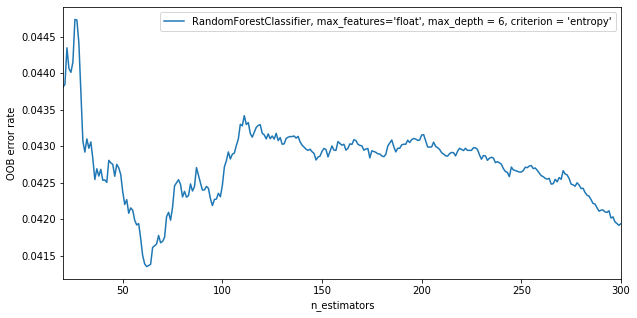

In [46]:
# Generate the "OOB error rate" vs. "n_estimators" plot.
plt.figure(figsize=(10,5))
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

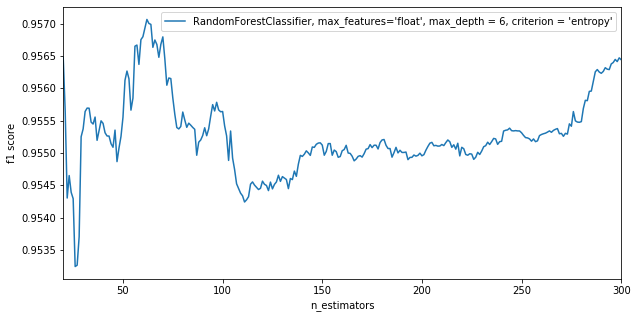

In [48]:
# Generate the "OOB error rate" vs. "n_estimators" plot.
plt.figure(figsize=(10,5))
for label, clf_err in f1_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("f1 score")
plt.legend(loc="upper right")
plt.show()

##### Plot OOB error rate andd f1 score vs n_estimators where n_estimators vary from (500, 600)

In [49]:

# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clf_tuned)
f1_rate = OrderedDict((label, []) for label, _ in ensemble_clf_tuned)


# Range of `n_estimators` values to explore.
min_estimators = 500
max_estimators = 600


for label, clf in ensemble_clf_tuned:
    for i in range(min_estimators, max_estimators + 1):
        clf.set_params(n_estimators=i)
        clf.fit(X_train_smote, y_train_smote)
        
        f1_rate[label].append((i,f1_score(list(clf.predict(X_test_smote)), list(y_test_smote['Class'].tolist()))))

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

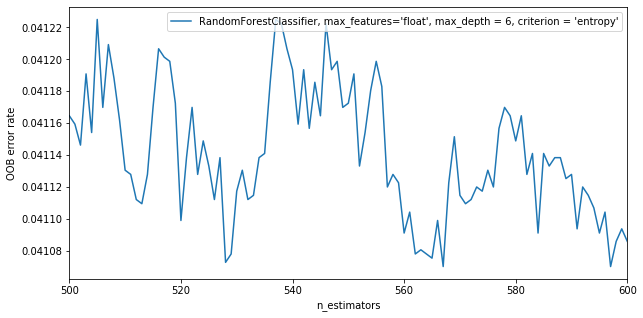

In [50]:
# Generate the "OOB error rate" vs. "n_estimators" plot.
plt.figure(figsize=(10,5))
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

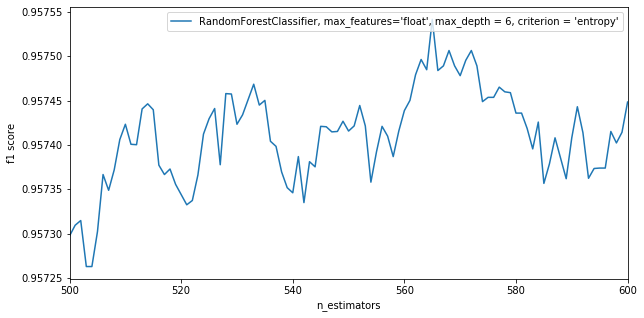

In [51]:
# Generate the "OOB error rate" vs. "n_estimators" plot.
plt.figure(figsize=(10,5))
for label, clf_err in f1_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("f1 score")
plt.legend(loc="upper right")
plt.show()

- We observe that beyond n_estimators = 300 the OOB error and f1 score changes very less. Theirfore, fixing n_estimators = 300

##### Building Classifier with tuned parameters

In [53]:
clf_rf_smote = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=6, max_features= 0.4,
                       max_leaf_nodes=32, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=-1, oob_score=True, random_state=50, verbose=0,
                       warm_start=True).fit(X_train_smote, y_train_smote)

In [55]:
y_pred_smote = clf_rf_smote.predict(X_train_smote)

##### Precision, Recall, F1 score, Accuracy for Training Dataset in Random forest 

In [56]:
from sklearn.metrics import confusion_matrix
cm1 = metrics.confusion_matrix(y_train_smote, y_pred_smote )

In [57]:
total1=sum(sum(cm1))
accuracy = (cm1[0,0]+cm1[1,1])/total1
precision = cm1[1,1]/(cm1[1,1]+cm1[0,1])
recall = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print(accuracy)
print(precision)
print(recall)

0.9587040857573323
0.9950974557779175
0.9219289862530324


- From above we get f1 score of 0.95711

##### Precision, Recall, F1 score, Accuracy for Testing Dataset in Random forest 

In [58]:
y_pred_test = clf_rf_smote.predict(X_test_smote)

from sklearn.metrics import confusion_matrix
cm_test = metrics.confusion_matrix(y_test_smote, y_pred_test )
cm_test

array([[93329,   446],
       [ 7428, 86445]], dtype=int64)

In [59]:
total_test=sum(sum(cm_test))
accuracy = (cm_test[0,0]+cm_test[1,1])/total_test
precision = cm_test[1,1]/(cm_test[1,1]+cm_test[0,1])
recall = cm_test[1,1]/(cm_test[1,0]+cm_test[1,1])
print(accuracy)
print(precision)
print(recall)

0.9580384549795361
0.9948671323842515
0.9208718161771755


- From above we get an f1 score of 0.9564

In [63]:
var_imp = []
for i in clf_rf_smote.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf_rf_smote.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf_rf_smote.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf_rf_smote.feature_importances_)[-3])+1)

Top var = 12
2nd Top var = 9
3rd Top var = 14


- The Top 3 predictor for Random forest with SMOTE are : 
   1. V14
   2. V10
   3. V17

### Using XGBClassifier

In [179]:
from xgboost.sklearn import XGBClassifier

In [268]:
learning_r = [0.05, 0.1, 0.2]
minimum_child_wt = [4,5,6]
num_tree = [250]
max_ht = [4, 5, 6]
n_ft = [0.3, 0.35, 0.5]
min_los = [0.35, 0.5, 0.6]
subsamples = [0.4, 0.6]

hyper_params = {'learning_rate': learning_r,
                    'min_child_weight': minimum_child_wt,
                    'n_estimators': num_tree,
                    'max_depth': max_ht,
                    'colsample_bytree': n_ft,
                    'gamma':min_los,
                    'subsample' : subsamples
               }

model_xgb = XGBClassifier(random_state=4684, nthread = -1, silent = 0)

flds = RepeatedStratifiedKFold(n_splits = 2, n_repeats = 30, random_state = 4684)
rsearch_cv = RandomizedSearchCV(estimator=model_xgb, 
                                param_distributions=hyper_params, 
                                cv=flds, scoring=['roc_auc', 'precision', 'recall', 'f1', 'accuracy'],
                                verbose=10, n_iter = 15,
                                n_jobs=-1, refit = 'f1',
                                random_state=783)

In [263]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y, 
                                                    test_size=0.2) # evaluation of results 

In [269]:
rsearch_cv.fit(X, y)

Fitting 60 folds for each of 15 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  9.2min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed: 11.4min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed: 13.8min
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed: 18.4min
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed: 22.4min
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed: 27.4min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed: 31.5min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed: 34.5min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 37.3min
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed: 40

RandomizedSearchCV(cv=RepeatedStratifiedKFold(n_repeats=30, n_splits=2, random_state=4684),
                   error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=-1,
                                           objecti...
                   iid='deprecated', n_iter=15, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.35, 0.5],
                                        'gamma': [0.35, 0.5, 0.6],
                                        'l

In [273]:
pd.DataFrame(rsearch_cv.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0   44.966477      1.679435      3.210860         0.155457         
1   72.084068      3.290950      3.347444         0.202006         
2   37.958398      2.424253      2.993260         0.140978         
3   62.417246      4.541946      3.305583         0.183565         
4   65.994038      2.885737      3.663371         0.157750         
5   43.404615      2.062440      2.734681         0.114006         
6   48.411445      2.154733      3.386373         0.143041         
7   66.845851      3.892386      3.411531         0.182020         
8   64.879830      2.719602      2.800508         0.141875         
9   61.875264      3.009528      3.315601         0.166975         
10  54.232410      1.813126      3.308374         0.121671         
11  56.681958      3.541362      3.847814         0.187558         
12  53.758182      2.969804      3.746811         0.135581         
13  40.204249      2.308833      2.964225         0.175328         
14  52.420572      2.954056      3.803316         0.296455         

   param_subsample param_n_estimators param_min_child_weight param_max_depth  \
0   0.4             250                4                      6                
1   0.6             250                6                      5                
2   0.4             250                5                      5                
3   0.4             250                4                      5                
4   0.6             250                4                      4                
5   0.4             250                6                      5                
6   0.6             250                6                      5                
7   0.6             250                6                      6                
8   0.4             250                6                      6                
9   0.4             250                4                      6                
10  0.6             250                5                      5                
11  0.6             250                4                      5                
12  0.6             250                4                      5                
13  0.4             250                6                      5                
14  0.6             250                4                      5                

   param_learning_rate param_gamma param_colsample_bytree  \
0   0.1                 0.35        0.35                    
1   0.1                 0.6         0.5                     
2   0.2                 0.5         0.35                    
3   0.2                 0.5         0.5                     
4   0.2                 0.6         0.5                     
5   0.05                0.5         0.35                    
6   0.1                 0.35        0.35                    
7   0.2                 0.35        0.5                     
8   0.05                0.6         0.5                     
9   0.2                 0.6         0.5                     
10  0.05                0.35        0.3                     
11  0.1                 0.35        0.35                    
12  0.1                 0.6         0.35                    
13  0.1                 0.5         0.35                    
14  0.2                 0.6         0.35                    

                                                                                                                                           params  \
0   {'subsample': 0.4, 'n_estimators': 250, 'min_child_weight': 4, 'max_depth': 6, 'learning_rate': 0.1, 'gamma': 0.35, 'colsample_bytree': 0.35}   
1   {'subsample': 0.6, 'n_estimators': 250, 'min_child_weight': 6, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0.6, 'colsample_bytree': 0.5}     
2   {'subsample': 0.4, 'n_estimators': 250, 'min_child_weight': 5, 'max_depth': 5, 'learning_rate': 0.2, 'gamma': 0.5, 'colsample_bytree': 0.35}    
3   {'subsample': 0.4, 'n_estimators': 250, 'min_child_weight

In [274]:
rsearch_cv.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.35, gamma=0.6,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=4, missing=None, n_estimators=250, n_jobs=1,
              nthread=-1, objective='binary:logistic', random_state=4684,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=0, subsample=0.6, verbosity=1)

In [275]:
rsearch_cv.best_params_

{'subsample': 0.6,
 'n_estimators': 250,
 'min_child_weight': 4,
 'max_depth': 5,
 'learning_rate': 0.1,
 'gamma': 0.6,
 'colsample_bytree': 0.35}

In [280]:
clf = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.35, gamma=0.6,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=4, missing=None, n_estimators=250, n_jobs=1,
              nthread=-1, objective='binary:logistic', random_state=4684,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=0, subsample=0.6, verbosity=1).fit(X_train_smote, y_train_smote)

In [296]:
y_pred = clf.predict(X_train_smote)

from sklearn.metrics import confusion_matrix
cm1 = metrics.confusion_matrix(y_train_smote, y_pred )

total1=sum(sum(cm1))
accuracy = (cm1[0,0]+cm1[1,1])/total1
precision = cm1[1,1]/(cm1[1,1]+cm1[0,1])
recall = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print(accuracy)
print(precision)
print(recall)

0.9987820946921376
0.9976164033359876
0.9999527415171023


From above we get the f1 score of 0.99

In [297]:
cm1

array([[190085,    455],
       [     9, 190433]], dtype=int64)

In [298]:
y_pred_test = clf.predict(X_test_smote)

from sklearn.metrics import confusion_matrix
cm1 = metrics.confusion_matrix(y_test_smote, y_pred_test )

total1=sum(sum(cm1))
accuracy = (cm1[0,0]+cm1[1,1])/total1
precision = cm1[1,1]/(cm1[1,1]+cm1[0,1])
recall = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print(accuracy)
print(precision)
print(recall)

0.9984492240791268
0.9970257695821206
0.9998828204062936


From above we get the f1 score of 0.99

In [299]:
cm1

array([[93495,   280],
       [   11, 93862]], dtype=int64)

### Print the class distribution after applying ADASYN

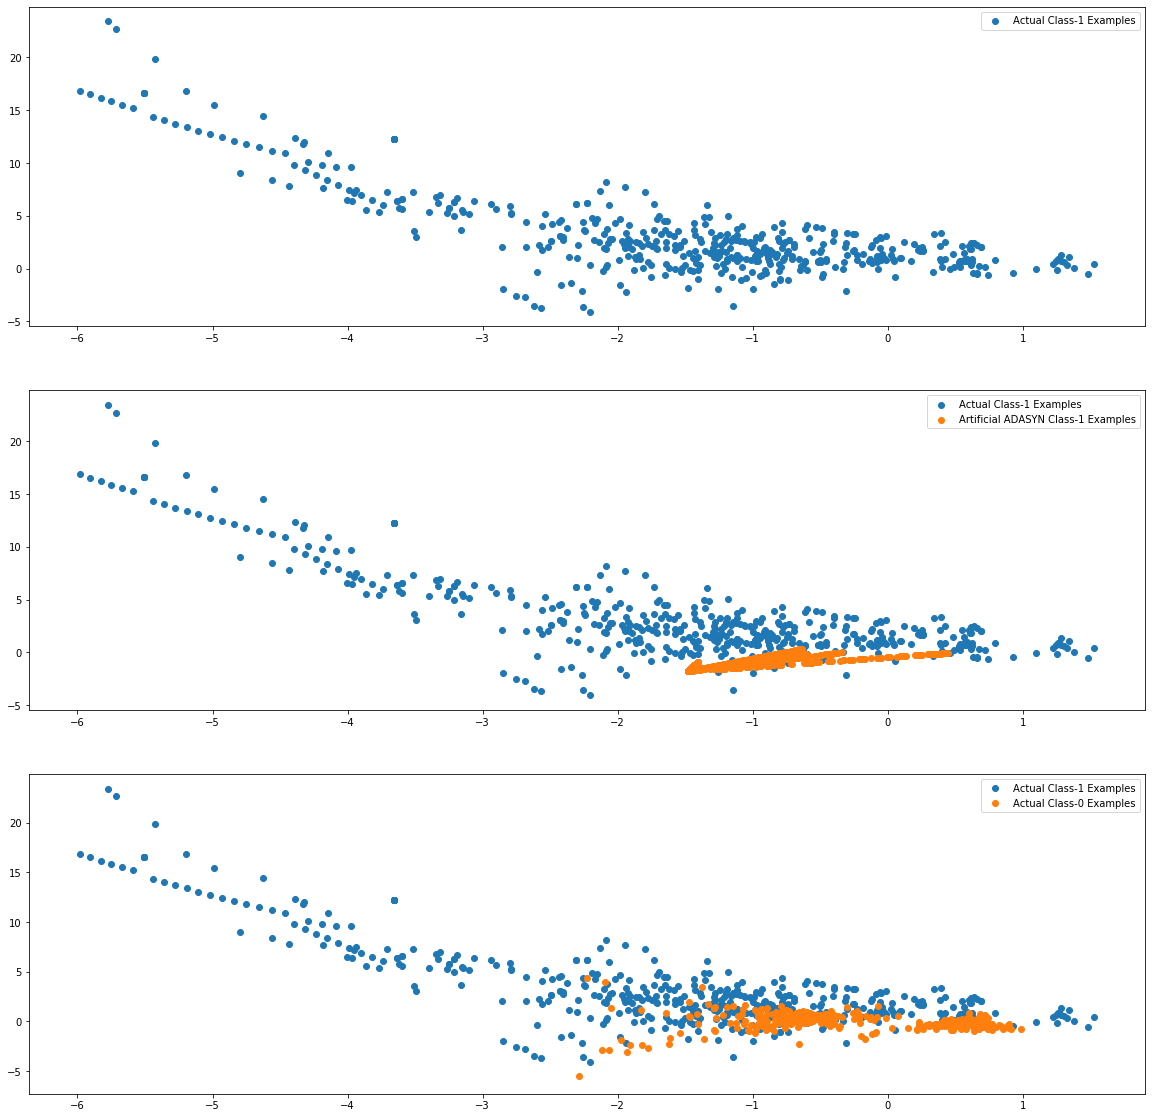

In [86]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling

ada = over_sampling.ADASYN(random_state=0)
X_adasyn, y_adasyn = ada.fit_resample(X, y)
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_adasyn[X.shape[0]:]

X_train_1 = X.to_numpy()[np.where(y==1.0)]
X_train_0 = X.to_numpy()[np.where(y==0.0)]



import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1[:X_train_1.shape[0], 0], X_train_adasyn_1[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

##### Convert the ADASYN oversampled dataset into a dataframe

In [87]:
X_adasyn = pd.DataFrame(X_adasyn, columns = X.columns)

X_adasyn.sort_index(axis=0, inplace = True)

y_adasyn = pd.DataFrame(y_adasyn, columns = ['Class'])

y_adasyn.sort_index(axis=0, inplace = True)

from sklearn.model_selection import train_test_split
X_train_adasyn, X_test_adasyn, y_train_adasyn, y_test_adasyn = train_test_split(X_adasyn, y_adasyn, test_size=0.33, random_state=42)

X_train_adasyn.sort_index(axis=0, inplace = True)
y_train_adasyn.sort_index(axis=0, inplace = True)

X_test_adasyn.sort_index(axis=0, inplace = True)
y_test_adasyn.sort_index(axis=0, inplace = True)

## Parameters for ADASYN

- Since, we have already done parameter tuning for SMOTE we will use the same parameter to build the classifiers for ADASYN oversampled dataset in order to facilitate the comparision of the two sampling methods.

## Using Logistic Regression and ADASYN

In [89]:
# building the final classifier for ADASYN oversampled dataset
clf = LogisticRegression(C=0.07, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=-1, penalty='l2',
                   random_state=150, solver='saga', tol=0.0001, verbose=0,
                   warm_start=True).fit(X_train_adasyn, y_train_adasyn)

In [90]:
X_predicted_prob = pd.DataFrame(clf.predict_proba(X_train_adasyn), index = X_train_adasyn.index, columns = ['Predicted_Prob0', 'Predicted_Prob1'])

In [91]:
clf.coef_

array([[-0.68559793, -0.12093688, -1.0494778 ,  2.10187859, -0.26810302,
        -0.27510538, -0.59843833, -0.31769577, -1.44509332,  0.99967976,
        -1.6639663 , -1.819932  , -1.0369351 , -1.26001038, -0.34591197,
         0.1741419 , -0.14389359]])

In [92]:
X_train_adasyn['Actual_Class'] = y_train_adasyn['Class']
X_train_adasyn.head()

V1        V2        V3        V4        V5        V6        V7  \
0 -0.904815 -0.131503  2.176074  0.983588 -0.256110  0.459227  0.193516   
1  0.626390  0.093067 -0.035062  0.387928  0.031947  0.045846 -0.063874   
3 -0.742857 -0.202760  1.401049 -0.581136 -0.019151  0.983351  0.191907   
4 -0.823641  0.530197  1.160592  0.357540 -0.305614  0.187360  0.479194   
5 -0.492264  0.591988  0.776871 -0.044977  0.295783  0.088357  0.384805   

         V9       V10       V11       V12       V14       V16       V17  \
0  0.380443  0.127074 -0.513088 -0.774671 -0.404755 -0.600774  0.215544   
1 -0.184488 -0.115195  1.523934  1.296242 -0.232720  0.491958 -0.175639   
3 -1.319689 -0.008922 -0.179270  0.026987 -0.381222 -1.194700 -0.829186   
4  0.769520  0.718432 -0.798770  0.496185 -1.168769 -0.580731 -0.319406   
5 -0.487484 -0.312658  1.286509  0.255374 -0.225768  0.412116 -0.108211   

        V18       V19    Amount  Actual_Class  
0  0.009991  0.503467  1.119013  0             
1 -0.238612 -0.169496 -1.128464  0             
3  2.435570 -1.528799  1.012504  0             
4 -0.066425  0.986458  0.692981  0             
5  0.061368 -0.030728 -0.974345  0

##### Plot the ROC 

In [93]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [94]:
fpr, tpr, thresholds = metrics.roc_curve( X_train_adasyn.Actual_Class, X_predicted_prob.Predicted_Prob1, drop_intermediate = False )

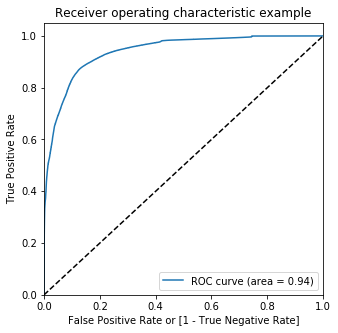

In [96]:
draw_roc(X_train_adasyn.Actual_Class, X_predicted_prob.Predicted_Prob1)

In [97]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    X_train_adasyn[i]= X_predicted_prob.Predicted_Prob1.map(lambda x: 1 if x > i else 0)
X_train_adasyn.tail()

V1        V2        V3        V4        V5        V6        V7  \
568620  0.585388  0.237210 -1.013882  0.259453  0.729115 -0.130986  0.268448   
568621  1.343259 -0.034853 -1.480790  0.356088  0.685924 -0.116173  0.198369   
568623  1.356257 -0.016454 -1.508597  0.357846  0.735991 -0.065886  0.192270   
568624  0.966260  0.133448 -1.276825  0.308162  0.780021 -0.052037  0.226232   
568625  1.220820  0.064097 -1.452566  0.340717  0.814045  0.000730  0.198016   

              V9       V10       V11       V12       V14       V16       V17  \
568620  0.218715 -0.463596  0.843859  0.458655 -1.302220  0.271117  0.942091   
568621  0.622794 -0.860155  0.228269  0.850618 -1.860468  0.402479  1.137694   
568623  0.603795 -0.849869  0.324799  0.823977 -1.865608  0.456503  1.127766   
568624  0.384729 -0.638469  0.687536  0.607957 -1.576433  0.411124  1.021409   
568625  0.495687 -0.755347  0.583056  0.707744 -1.759706  0.504699  1.074422   

             V18       V19    Amount  Actual_Class  0.0  0.1  0.2  0.3  0.4  \
568620  0.911570  0.998888 -0.239586  1             1    1    1    1    1     
568621  1.034394  0.586499  0.566934  1             1    1    1    1    1     
568623  1.175053  0.635542  0.513823  1             1    1    1    1    1     
568624  1.171311  0.871837  0.070063  1             1    1    1    1    1     
568625  1.344912  0.786921  0.277020  1             1    1    1    1    1     

        0.5  0.6  0.7  0.8  0.9  
568620  1    0    0    0    0    
568621  1    0    0    0    0    
568623  1    0    0    0    0    
568624  1    0    0    0    0    
568625  1    0    0    0    0

##### Calculation of Precision, Recall, Accuracy, F1 score on traning dataset oversampled with ADASYN

In [98]:
# Now let's calculate precision, recall and accuracy for various probability cutoffs.
# We will Calculate the metrics and store the results in a list

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','precision','recall'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(X_train_adasyn.Actual_Class, X_train_adasyn[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    precision = cm1[1,1]/(cm1[1,1]+cm1[0,1])
    recall = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,precision,recall]
print(cutoff_df)

     prob  accuracy  precision    recall
0.0  0.0   0.499966  0.499966   1.000000
0.1  0.1   0.720731  0.643946   0.987358
0.2  0.2   0.810552  0.737995   0.962946
0.3  0.3   0.851780  0.802654   0.932911
0.4  0.4   0.868350  0.849992   0.894554
0.5  0.5   0.869959  0.884872   0.850565
0.6  0.6   0.848026  0.907296   0.775243
0.7  0.7   0.827631  0.926268   0.711907
0.8  0.8   0.804155  0.946682   0.644587
0.9  0.9   0.753832  0.965743   0.526300


<Figure size 3600x3600 with 0 Axes>

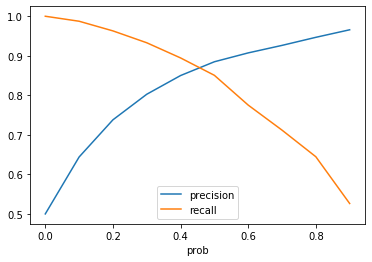

In [99]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
plt.figure(figsize=(50,50))
cutoff_df.plot.line(x='prob', y=['precision','recall'])
plt.show()

- Using 0.45 as the probability threshold for classification 

In [100]:
X_train_adasyn['final_predicted'] = X_predicted_prob.Predicted_Prob1.map( lambda x: 1 if x > 0.45 else 0)

X_train_adasyn.head()

V1        V2        V3        V4        V5        V6        V7  \
0 -0.904815 -0.131503  2.176074  0.983588 -0.256110  0.459227  0.193516   
1  0.626390  0.093067 -0.035062  0.387928  0.031947  0.045846 -0.063874   
3 -0.742857 -0.202760  1.401049 -0.581136 -0.019151  0.983351  0.191907   
4 -0.823641  0.530197  1.160592  0.357540 -0.305614  0.187360  0.479194   
5 -0.492264  0.591988  0.776871 -0.044977  0.295783  0.088357  0.384805   

         V9       V10       V11       V12       V14       V16       V17  \
0  0.380443  0.127074 -0.513088 -0.774671 -0.404755 -0.600774  0.215544   
1 -0.184488 -0.115195  1.523934  1.296242 -0.232720  0.491958 -0.175639   
3 -1.319689 -0.008922 -0.179270  0.026987 -0.381222 -1.194700 -0.829186   
4  0.769520  0.718432 -0.798770  0.496185 -1.168769 -0.580731 -0.319406   
5 -0.487484 -0.312658  1.286509  0.255374 -0.225768  0.412116 -0.108211   

        V18       V19    Amount  Actual_Class  0.0  0.1  0.2  0.3  0.4  0.5  \
0  0.009991  0.503467  1.119013  0             1    1    1    1    1    0     
1 -0.238612 -0.169496 -1.128464  0             1    1    0    0    0    0     
3  2.435570 -1.528799  1.012504  0             1    0    0    0    0    0     
4 -0.066425  0.986458  0.692981  0             1    1    0    0    0    0     
5  0.061368 -0.030728 -0.974345  0             1    1    1    0    0    0     

   0.6  0.7  0.8  0.9  final_predicted  
0  0    0    0    0    0                
1  0    0    0    0    0                
3  0    0    0    0    0                
4  0    0    0    0    0                
5  0    0    0    0    0

In [101]:
# Let's check the overall accuracy.
metrics.accuracy_score(X_train_adasyn.Actual_Class, X_train_adasyn.final_predicted)

confusion_logistic_bal = metrics.confusion_matrix(X_train_adasyn.Actual_Class,  X_train_adasyn.final_predicted )
confusion_logistic_bal

array([[165475,  25028],
       [ 23632, 166845]], dtype=int64)

In [102]:
precision = confusion_logistic_bal[1,1]/(confusion_logistic_bal[1,1]+confusion_logistic_bal[0,1])
recall = confusion_logistic_bal[1,1]/(confusion_logistic_bal[1,0]+confusion_logistic_bal[1,1])
print(precision)
print(recall)

0.8695595524122727
0.8759325272867591


In [103]:
X_train_adasyn.head()

V1        V2        V3        V4        V5        V6        V7  \
0 -0.904815 -0.131503  2.176074  0.983588 -0.256110  0.459227  0.193516   
1  0.626390  0.093067 -0.035062  0.387928  0.031947  0.045846 -0.063874   
3 -0.742857 -0.202760  1.401049 -0.581136 -0.019151  0.983351  0.191907   
4 -0.823641  0.530197  1.160592  0.357540 -0.305614  0.187360  0.479194   
5 -0.492264  0.591988  0.776871 -0.044977  0.295783  0.088357  0.384805   

         V9       V10       V11       V12       V14       V16       V17  \
0  0.380443  0.127074 -0.513088 -0.774671 -0.404755 -0.600774  0.215544   
1 -0.184488 -0.115195  1.523934  1.296242 -0.232720  0.491958 -0.175639   
3 -1.319689 -0.008922 -0.179270  0.026987 -0.381222 -1.194700 -0.829186   
4  0.769520  0.718432 -0.798770  0.496185 -1.168769 -0.580731 -0.319406   
5 -0.487484 -0.312658  1.286509  0.255374 -0.225768  0.412116 -0.108211   

        V18       V19    Amount  Actual_Class  0.0  0.1  0.2  0.3  0.4  0.5  \
0  0.009991  0.503467  1.119013  0             1    1    1    1    1    0     
1 -0.238612 -0.169496 -1.128464  0             1    1    0    0    0    0     
3  2.435570 -1.528799  1.012504  0             1    0    0    0    0    0     
4 -0.066425  0.986458  0.692981  0             1    1    0    0    0    0     
5  0.061368 -0.030728 -0.974345  0             1    1    1    0    0    0     

   0.6  0.7  0.8  0.9  final_predicted  
0  0    0    0    0    0                
1  0    0    0    0    0                
3  0    0    0    0    0                
4  0    0    0    0    0                
5  0    0    0    0    0

##### Calculation of Precision, Recall, Accuracy, F1 score on ADASYN oversampled testing dataset 

In [104]:
X_test_Predicted_Prob = pd.DataFrame()
X_test_Predicted_Prob[['Predicted_Prob0','Predicted_Prob1']] = pd.DataFrame(clf.predict_proba(X_test_adasyn), index= X_test_adasyn.index)

In [105]:
X_test_adasyn['Actual_Class'] = y_test_adasyn['Class']
X_test_adasyn.head()

V1        V2        V3        V4        V5        V6        V7  \
2  -0.904242 -0.871858  1.381297  0.341811 -0.374492  1.320901  0.639714   
6   0.659485  0.008454 -0.123288  0.874920  0.128041  0.321319 -0.004345   
7  -0.598250  0.942973  0.716282 -0.289364  0.685419  0.434710  0.905898   
12  0.677407 -0.807147  0.131211 -0.883921 -1.072416 -0.542688 -0.557362   
24 -1.123696 -0.113595 -0.424116 -0.701983  2.181850  1.969435 -0.051151   

          V9       V10       V11       V12       V14       V16       V17  \
2  -1.453859  0.234324  0.640742 -0.104954 -0.255865 -2.809663  1.383126   
6   0.468656 -0.050776 -1.443155 -0.342836  0.105449 -0.572396 -0.035098   
7   0.598136  1.141071 -0.584002  0.167291 -1.348683 -0.167900 -1.417182   
12 -2.075243  1.203229  0.267672 -0.431958 -0.411277 -0.954997  1.068870   
24  0.100084  0.561887 -0.033678 -0.405315 -0.042794  0.641839 -1.150763   

         V18       V19    Amount  Actual_Class  
2  -0.165261 -2.838493  1.623286  0             
6  -0.739065 -0.045963 -0.813220  0             
7  -0.444085  0.406833  0.384255  0             
12 -1.010254 -0.837766  1.003405  0             
24  0.031875  0.606120 -1.575255  0

In [106]:
X_test_adasyn['final_predicted'] = X_test_Predicted_Prob.Predicted_Prob1.map( lambda x: 1 if x > 0.3 else 0)

X_test_adasyn.head()

V1        V2        V3        V4        V5        V6        V7  \
2  -0.904242 -0.871858  1.381297  0.341811 -0.374492  1.320901  0.639714   
6   0.659485  0.008454 -0.123288  0.874920  0.128041  0.321319 -0.004345   
7  -0.598250  0.942973  0.716282 -0.289364  0.685419  0.434710  0.905898   
12  0.677407 -0.807147  0.131211 -0.883921 -1.072416 -0.542688 -0.557362   
24 -1.123696 -0.113595 -0.424116 -0.701983  2.181850  1.969435 -0.051151   

          V9       V10       V11       V12       V14       V16       V17  \
2  -1.453859  0.234324  0.640742 -0.104954 -0.255865 -2.809663  1.383126   
6   0.468656 -0.050776 -1.443155 -0.342836  0.105449 -0.572396 -0.035098   
7   0.598136  1.141071 -0.584002  0.167291 -1.348683 -0.167900 -1.417182   
12 -2.075243  1.203229  0.267672 -0.431958 -0.411277 -0.954997  1.068870   
24  0.100084  0.561887 -0.033678 -0.405315 -0.042794  0.641839 -1.150763   

         V18       V19    Amount  Actual_Class  final_predicted  
2  -0.165261 -2.838493  1.623286  0             1                
6  -0.739065 -0.045963 -0.813220  0             1                
7  -0.444085  0.406833  0.384255  0             0                
12 -1.010254 -0.837766  1.003405  0             0                
24  0.031875  0.606120 -1.575255  0             0

In [107]:
# Let's check the overall accuracy.
metrics.accuracy_score(X_test_adasyn.Actual_Class, X_test_adasyn.final_predicted)

confusion_test_smote = metrics.confusion_matrix(X_test_adasyn.Actual_Class,  X_test_adasyn.final_predicted )
precision = confusion_test_smote[1,1]/(confusion_test_smote[1,1]+confusion_test_smote[0,1])
recall = confusion_test_smote[1,1]/(confusion_test_smote[1,0]+confusion_test_smote[1,1])
print(precision)
print(recall)

0.801118291397406
0.93139093738011


In [108]:
# Let's check the overall accuracy.
metrics.accuracy_score(X_test_adasyn.Actual_Class, X_test_adasyn.final_predicted)

confusion_logistic_bal_test = metrics.confusion_matrix(X_test_adasyn.Actual_Class,  X_test_adasyn.final_predicted )
confusion_logistic_bal_test

array([[72115, 21697],
       [ 6438, 87398]], dtype=int64)

#### SVM Using Adasyn

In [155]:
from sklearn.model_selection import train_test_split
X_train_adasyn, X_test_adasyn, y_train_adasyn, y_test_adasyn = train_test_split(X_adasyn, y_adasyn, test_size=0.33, random_state=646)

In [156]:
X_train_adasyn.sort_index(axis=0, inplace = True)
y_train_adasyn.sort_index(axis=0, inplace = True)

In [157]:
X_test_adasyn.sort_index(axis=0, inplace = True)
y_test_adasyn.sort_index(axis=0, inplace = True)

In [158]:
# SVM using SGDClassifier
from sklearn.linear_model import SGDClassifier #import the package

clf_svm_bal = SGDClassifier(alpha=0.0001, average=25, class_weight=None, early_stopping=False,
              epsilon=0.1, eta0=0.25, fit_intercept=True, l1_ratio=0.15,
              learning_rate='constant', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=-1, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=True).fit(X_train_adasyn, y_train_adasyn)

In [159]:
X_train_adasyn['Predicted'] = list(clf_svm_bal.predict(X_train_adasyn))

In [160]:
X_train_adasyn['Actual_Class'] = y_train_adasyn['Class']
X_train_adasyn.head(30)

V1        V2        V3        V4        V5        V6        V7  \
0  -0.904815 -0.131503  2.176074  0.983588 -0.256110  0.459227  0.193516   
1   0.626390  0.093067 -0.035062  0.387928  0.031947  0.045846 -0.063874   
2  -0.904242 -0.871858  1.381297  0.341811 -0.374492  1.320901  0.639714   
5  -0.492264  0.591988  0.776871 -0.044977  0.295783  0.088357  0.384805   
6   0.659485  0.008454 -0.123288  0.874920  0.128041  0.321319 -0.004345   
9  -0.447490  0.712260  0.689244 -0.084913  0.353370 -0.090699  0.526610   
11 -0.009932  0.338798 -0.703241  0.009451  2.168670  2.160955  0.380159   
12  0.677407 -0.807147  0.131211 -0.883921 -1.072416 -0.542688 -0.557362   
13  0.521050  0.107837  0.498948  1.770100 -0.140843  0.369082 -0.078353   
14 -1.404799 -0.291071  1.251282  1.219695 -0.110628  0.697764 -0.341997   
16  0.549862 -0.110627  0.893242  0.928639 -0.540951  0.332697 -0.473845   
17 -0.497754  0.560900  0.582706 -0.472824  0.660766  0.008608  0.571938   
18 -2.119648 -2.844509  0.818277  1.200981  2.263123 -1.555778 -1.260595   
19  0.897417 -0.700575  0.187429 -1.053365 -1.121781 -0.512622 -0.873522   
20  0.217820 -0.883606  0.675652  0.641588 -0.864479  1.022216 -0.710236   
21  0.431556  0.135873 -0.272895  1.422085  0.819552  1.258756  0.086896   
23 -0.103623  0.100945  0.817510  0.010483 -0.951643 -0.009757 -0.765005   
24 -1.123696 -0.113595 -0.424116 -0.701983  2.181850  1.969435 -0.051151   
25 -1.168476 -0.162550  0.944361  0.362248  0.203569 -0.738590  0.439611   
26  0.610229  0.153194  0.053525  0.831758 -0.136638 -0.696784  0.298152   
28 -0.486381  0.550809  1.335799  1.041991 -0.006264 -0.051579  0.598287   
30  0.666323 -0.044601  0.128534  0.594672 -0.271536 -0.305919  0.005075   
32 -0.543640  0.527341  0.968080  0.180505  0.290807  0.190690  0.574820   
34 -0.546299  0.520940  0.971688  0.181988  0.305103  0.180429  0.560130   
35 -0.546299  0.520940  0.971688  0.181988  0.305103  0.180429  0.560130   
36 -0.398856  0.236977  1.304416  0.261682 -0.019556 -0.411243  0.641716   
37 -0.940894  1.219081  0.315193  0.858829 -0.333458  0.302058 -0.208363   
38  0.459672 -0.163252  0.261837  0.558909  0.086225  0.926162 -0.238264   
39  0.556419  0.027029  0.237673  0.951090 -0.150357  0.127562 -0.025920   
41 -1.145662  1.574170 -0.051508  0.847957 -0.597400  0.253522 -0.498938   

          V9       V10       V11       V12       V14       V16       V17  \
0   0.380443  0.127074 -0.513088 -0.774671 -0.404755 -0.600774  0.215544   
1  -0.184488 -0.115195  1.523934  1.296242 -0.232720  0.491958 -0.175639   
2  -1.453859  0.234324  0.640742 -0.104954 -0.255865 -2.809663  1.383126   
5  -0.487484 -0.312658  1.286509  0.255374 -0.225768  0.412116 -0.108211   
6   0.468656 -0.050776 -1.443155 -0.342836  0.105449 -0.572396 -0.035098   
9  -0.653971 -0.308206  0.998676  0.933342 -0.536758  0.856110 -0.668430   
11 -0.477878  0.326895 -0.212299 -0.512586  0.330498 -0.228657 -0.968947   
12 -2.075243  1.203229  0.267672 -0.431958 -0.411277 -0.954997  1.068870   
13 -0.151911  0.461556 -0.746529  0.208070 -0.268903 -0.307720  0.112142   
14  0.717310  1.058472  0.842339  0.867077 -0.816946 -0.421321 -0.224184   
16  0.739751 -0.212212 -0.408009  1.089592 -0.561454 -0.359476 -0.049582   
17 -0.582871 -0.676565  0.359610  0.149215 -0.385252  1.417231 -1.099468   
18  1.112703  0.358771  0.908213  1.142617 -0.571726  0.502406 -0.875298   
19 -1.950032  1.463149  1.052400 -0.786790 -0.022953 -0.270282  0.335392   
20 -0.367817  0.557294  1.000055  1.688905 -0.466483 -2.096339  0.603040   
21 -1.116056  0.693550  1.591203  0.317131  1.098432 -0.738381  0.459032   
23  1.363306 -0.769540 -0.546057  0.477727  0.009420 -1.514063  0.949463   
24  0.100084  0.561887 -0.033678 -0.405315 -0.042794  0.641839 -1.150763   
25  0.477934  0.181097 -0.834695 -0.369991 -0.372969 -0.454203 -0.025538   
26 -0.176152 -0.000624 -0.095702  1.157358  0.031614 -0.096834 -0.635209   
28 -0.511812 -0.288069  0.034739  0.857769 -0.172205 -1.5

In [161]:
confusion_train_svm_bal = metrics.confusion_matrix(X_train_adasyn.Actual_Class,  X_train_adasyn.Predicted)
precision = confusion_train_svm_bal[1,1]/(confusion_train_svm_bal[1,1]+confusion_train_svm_bal[0,1])
recall = confusion_train_svm_bal[1,1]/(confusion_train_svm_bal[1,0]+confusion_train_svm_bal[1,1])
print(precision)
print(recall)
print(metrics.accuracy_score(X_train_adasyn.Actual_Class,  X_train_adasyn.Predicted))

0.8754895405482854
0.8651549873356652
0.8709197333193344


In [162]:
clf_svm_bal.coef_

array([[-1.16248614, -0.54377526, -1.60839555,  3.74049938, -0.24960036,
        -0.54833281, -0.72994269, -0.51078661, -2.25452735,  1.57845332,
        -2.51357018, -2.98322678, -1.43233136, -1.63775719, -0.34135636,
         0.27952615, -0.34587109]])

In [163]:
X_test_adasyn['Predicted'] = list(clf_svm_bal.predict(X_test_adasyn))

In [164]:
X_test_adasyn['Actual_Class'] = y_test_adasyn
X_test_adasyn.head(30)

V1        V2        V3        V4        V5        V6        V7  \
3   -0.742857 -0.202760  1.401049 -0.581136 -0.019151  0.983351  0.191907   
4   -0.823641  0.530197  1.160592  0.357540 -0.305614  0.187360  0.479194   
7   -0.598250  0.942973  0.716282 -0.289364  0.685419  0.434710  0.905898   
8   -0.711587  0.106764 -0.233685 -0.121722  1.975557  2.369750  0.299058   
10   0.856866 -0.782224  0.573269 -1.001069 -1.414210 -0.427970 -1.150311   
15  -0.648230  0.147644  1.669453 -1.079129 -0.841234  0.049513 -0.492047   
22   0.604443  0.257382 -0.202318  1.511028  0.301522  0.182362  0.194767   
27   0.742108 -0.195738  0.171275  0.473163 -0.612774 -0.615878 -0.214295   
29   0.512591 -0.196542  0.892123  0.864626 -0.576611  0.541056 -0.620135   
31   0.559098 -0.028430  0.218698  0.957479 -0.228667  0.103532 -0.096171   
33  -0.543640  0.527341  0.968080  0.180505  0.290807  0.190690  0.574820   
40   0.676574 -0.468922 -0.608801 -0.684568  1.043416  2.355048 -0.881234   
44  -0.652702 -0.000384  2.299944 -1.426825 -0.653062 -0.109344 -0.339534   
47  -0.133771  0.254098  0.993247  0.470097 -0.465724 -0.346762 -0.061826   
48   0.799594 -0.567289  0.455568 -0.582272 -0.774399  0.379127 -0.963041   
53   0.543295 -0.159124  1.015980  1.056679 -0.763748  0.169427 -0.585159   
57  -0.893379  0.094017 -0.270887 -0.452308  2.440001  2.108187 -0.048185   
58   0.556258 -0.030813  0.148666  0.929660 -0.134641  0.206687 -0.065524   
64  -0.540114  0.629125  0.047830  1.043101 -0.520267  0.382004  1.261107   
67  -0.735361  0.080963  2.640758  1.827466  0.094229  0.090261  0.107906   
68   0.402394 -0.288568  0.134086  0.452244  0.168155  1.231364 -0.345767   
71  -0.468072  0.423505 -0.238405  0.208635  1.918586  2.408045  0.047589   
76  -0.553191  0.198794  1.338160  0.220666 -0.147064  0.307317  0.404770   
85  -1.911832 -2.389250  3.151923  0.686358  2.227550 -0.303237 -2.186087   
86  -0.657775  0.511928  0.489996 -0.095244  0.577679 -1.216146  0.646198   
91   0.520853 -0.055942  0.073497  0.945709 -0.345234 -0.641286  0.167892   
98  -0.957264  0.500180  2.276043  2.013566 -0.450309  0.310756 -0.010027   
99   0.662422  0.040990  0.216550  0.511170 -0.380495 -0.768627  0.053371   
102 -0.069414  1.527844 -1.062594  1.095472  0.677392 -1.970545  1.136331   
103 -0.581147  0.120870  1.087612  0.867757  0.003776  0.751662  0.962393   

           V9       V10       V11       V12       V14       V16       V17  \
3   -1.319689 -0.008922 -0.179270  0.026987 -0.381222 -1.194700 -0.829186   
4    0.769520  0.718432 -0.798770  0.496185 -1.168769 -0.580731 -0.319406   
7    0.598136  1.141071 -0.584002  0.167291 -1.348683 -0.167900 -1.417182   
8   -0.315388 -0.350827 -0.674045 -0.297985  0.001645 -0.319013 -0.621740   
10  -1.672304  1.453786  1.161245 -0.820009 -0.181443 -0.042329  0.271950   
15  -0.358084  0.713800 -0.768092 -0.901645 -1.121290  2.176959 -0.368590   
22  -0.908587  0.864060  0.751349 -0.699879  1.285347  0.441151 -0.570212   
27  -0.992649  0.818082 -0.607113 -0.298887  0.110609 -1.475877 -0.295914   
29   0.669753 -0.018146  1.026203  1.199497 -0.122710 -0.074598 -0.268514   
31   0.240577  0.119184  1.102432  0.621552  0.518652 -0.662437  0.154190   
33  -0.214288 -0.423852  0.867698  0.956799  0.031122 -0.400924 -0.404841   
40   0.796693 -0.250063 -0.414140  0.090243 -0.312687  0.302605 -0.635918   
44  -0.787380  0.006419 -0.654027 -0.674747 -1.096580  2.541493 -0.574702   
47   0.297794 -0.419504 -0.472450  0.700190 -0.246964 -0.608695  0.237127   
48  -0.231180  0.564327 -1.680918 -0.131717 -0.821043 -0.387422 -1.103077   
53   0.918386 -0.098184 -0.468047 -0.209865 -0.146765 -0.318147  0.215006   
57   0.038003 -0.114029 -0.737403 -0.196527 -0.124088 -0.044018 -0.933656   
58   0.192531  0.103441  1.004903  0.867370  0.401531 -0.619805  0.032287   
64  -0.400517  0.511288  0.080406  0.568008 -0.057400 -1.099089  0.263174   
67  -0.061737  0.960200 -0.493358 -0.379428 -1.005851 -0.228994 -0.245954   
68   0

In [165]:
confusion_test_smote = metrics.confusion_matrix(X_test_adasyn.Actual_Class,  X_test_adasyn.Predicted)
precision = confusion_test_smote[1,1]/(confusion_test_smote[1,1]+confusion_test_smote[0,1])
recall = confusion_test_smote[1,1]/(confusion_test_smote[1,0]+confusion_test_smote[1,1])
print(precision)
print(recall)
print(metrics.accuracy_score(X_test_adasyn.Actual_Class,  X_test_adasyn.Predicted))

0.8731955875382428
0.8658085879085665
0.8703210266030014


#### Random Forest using Adasyn

In [166]:
from sklearn.model_selection import train_test_split
X_train_adasyn, X_test_adasyn, y_train_adasyn, y_test_adasyn = train_test_split(X_adasyn, y_adasyn, test_size=0.33, random_state=454)

In [167]:
X_train_adasyn.sort_index(axis=0, inplace = True)
y_train_adasyn.sort_index(axis=0, inplace = True)

In [168]:
X_test_adasyn.sort_index(axis=0, inplace = True)
y_test_adasyn.sort_index(axis=0, inplace = True)

In [170]:
clf_rf_adasyn = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=6, max_features= 0.4,
                       max_leaf_nodes=32, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=-1, oob_score=True, random_state=34, verbose=0,
                       warm_start=True).fit(X_train_adasyn, y_train_adasyn)

In [171]:
y_pred_adasyn = clf_rf_adasyn.predict(X_train_adasyn)

In [172]:
from sklearn.metrics import confusion_matrix
cm1 = metrics.confusion_matrix(y_train_adasyn, y_pred_adasyn )

In [173]:
total1=sum(sum(cm1))
accuracy = (cm1[0,0]+cm1[1,1])/total1
precision = cm1[1,1]/(cm1[1,1]+cm1[0,1])
recall = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print(accuracy)
print(precision)
print(recall)

0.9372801721875164
0.9406421664261054
0.9335299241271474


In [174]:
y_pred_test = clf_rf_adasyn.predict(X_test_adasyn)

from sklearn.metrics import confusion_matrix
cm_test = metrics.confusion_matrix(y_test_adasyn, y_pred_test )
cm_test

array([[88255,  5662],
       [ 6150, 87581]], dtype=int64)

In [175]:
total_test=sum(sum(cm_test))
accuracy = (cm_test[0,0]+cm_test[1,1])/total_test
precision = cm_test[1,1]/(cm_test[1,1]+cm_test[0,1])
recall = cm_test[1,1]/(cm_test[1,0]+cm_test[1,1])
print(accuracy)
print(precision)
print(recall)

0.9370523533424284
0.9392769430413007
0.9343867023716806


In [176]:
var_imp = []
for i in clf_rf_adasyn.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf_rf_adasyn.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf_rf_adasyn.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf_rf_adasyn.feature_importances_)[-3])+1)

Top var = 4
2nd Top var = 12
3rd Top var = 14


## XGBoost using ADASYN oversampling

In [88]:
from sklearn.model_selection import train_test_split
X_train_adasyn, X_test_adasyn, y_train_adasyn, y_test_adasyn = train_test_split(X_adasyn, y_adasyn, test_size=0.4, random_state=4643)

In [89]:
clf = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.35, gamma=0.6,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=4, missing=None, n_estimators=250, n_jobs=1,
              nthread=-1, objective='binary:logistic', random_state=
                    544,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=0, subsample=0.6, verbosity=1).fit(X_train_adasyn, y_train_adasyn)

In [90]:
y_pred = clf.predict(X_train_adasyn)

from sklearn.metrics import confusion_matrix
cm1 = metrics.confusion_matrix(y_train_adasyn, y_pred )

total1=sum(sum(cm1))
accuracy = (cm1[0,0]+cm1[1,1])/total1
precision = cm1[1,1]/(cm1[1,1]+cm1[0,1])
recall = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print(accuracy)
print(precision)
print(recall)

0.9973327549417309
0.9947129997321563
0.9999882928656724


From above we get the f1 score of 0.99

In [91]:
cm1

array([[169432,    908],
       [     2, 170834]], dtype=int64)

In [92]:
y_pred_test = clf.predict(X_test_adasyn)

from sklearn.metrics import confusion_matrix
cm1 = metrics.confusion_matrix(y_test_adasyn, y_pred_test )

total1=sum(sum(cm1))
accuracy = (cm1[0,0]+cm1[1,1])/total1
precision = cm1[1,1]/(cm1[1,1]+cm1[0,1])
recall = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print(accuracy)
print(precision)
print(recall)

0.9970103582294286
0.9940606028750887
0.999982375283097


From above we get the f1 score of 0.99

In [93]:
cm1

array([[113297,    678],
       [     2, 113475]], dtype=int64)

### Select the oversampling method which shows the best result on a model

- ADASYN clubbed with XGboost gives the best performance in this case.

In [94]:
# perform the best oversampling method on X_train & y_train

clf = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.35, gamma=0.6,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=4, missing=None, n_estimators=250, n_jobs=1,
              nthread=-1, objective='binary:logistic', random_state=4684,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=0, subsample=0.6, verbosity=1).fit(X_train_adasyn, y_train_adasyn) #initialise the model with optimum hyperparameters
# fit on the balanced dataset
y_pred = clf.predict(X_test_adasyn)

from sklearn.metrics import confusion_matrix
cm1 = metrics.confusion_matrix(y_test_adasyn, y_pred )

total1=sum(sum(cm1))
accuracy = (cm1[0,0]+cm1[1,1])/total1
precision = cm1[1,1]/(cm1[1,1]+cm1[0,1])
recall = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print(accuracy)
print(precision)
print(recall) 

0.9969663929092731
0.9939821830572613
0.9999735629246456


### Print the important features of the best model to understand the dataset

The best model is XGBoost with sampling done by ADASYN

In [95]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

Top var = 4
2nd Top var = 14
3rd Top var = 11


- The Top predictors are :
    1. V4
    2. V14
    3. V12

In [85]:
X_train_adasyn = pd.DataFrame(X_train_adasyn, columns = df.columns)

In [96]:
#### Print the FPR,TPR & select the best threshold from the roc curve
X_train_Predicted_Prob = pd.DataFrame()
X_train_Predicted_Prob[['Predicted_Prob0','Predicted_Prob1']] = pd.DataFrame(clf.predict_proba(X_train_adasyn), index= X_train_adasyn.index)

In [97]:
print('Train auc =', metrics.roc_auc_score(y_train_adasyn[['Class']].to_numpy(), X_train_Predicted_Prob[['Predicted_Prob1']].to_numpy()))
fpr, tpr, thresholds = metrics.roc_curve(y_train_adasyn[['Class']].to_numpy(), X_train_Predicted_Prob[['Predicted_Prob1']].to_numpy())
threshold = thresholds[np.argmax(tpr-fpr)]
print(threshold)

Train auc = 0.9999244047573737
0.79335487


In [98]:
X_adasyn['Class'] = y_adasyn['Class']

In [99]:
X_adasyn_0 = X_adasyn.loc[X_adasyn['Class'] == 0]
X_adasyn_1 = X_adasyn.loc[X_adasyn['Class'] == 1]

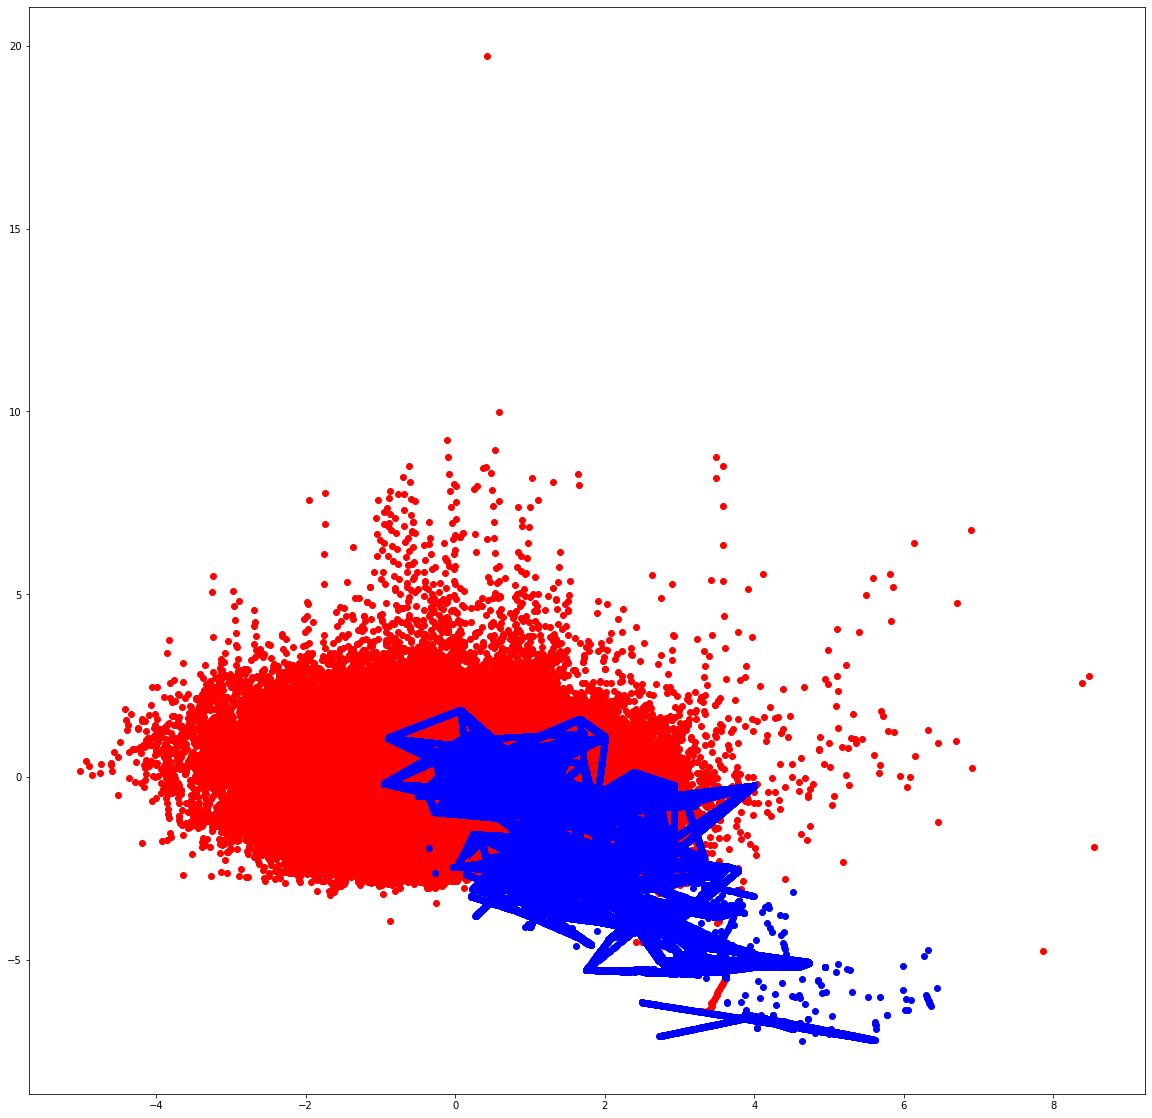

In [100]:
plt.scatter(X_adasyn_0["V4"],X_adasyn_0['V12'],color='red')
plt.scatter(X_adasyn_1["V4"], X_adasyn_1['V12'],color='blue')
plt.show()

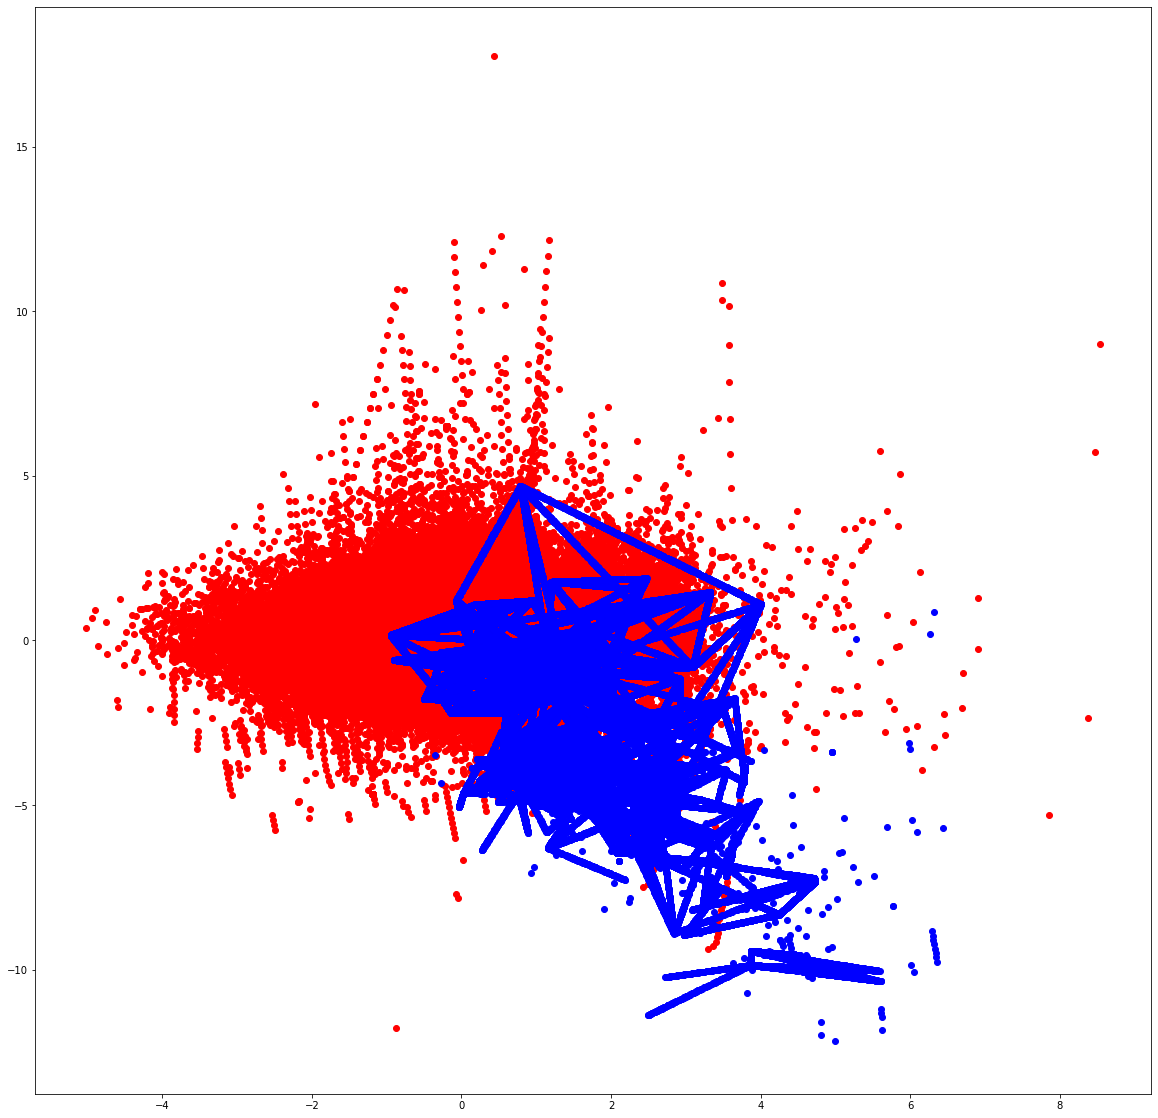

In [101]:
plt.scatter(X_adasyn_0["V4"],X_adasyn_0['V14'],color='red')
plt.scatter(X_adasyn_1["V4"], X_adasyn_1['V14'],color='blue')
plt.show()

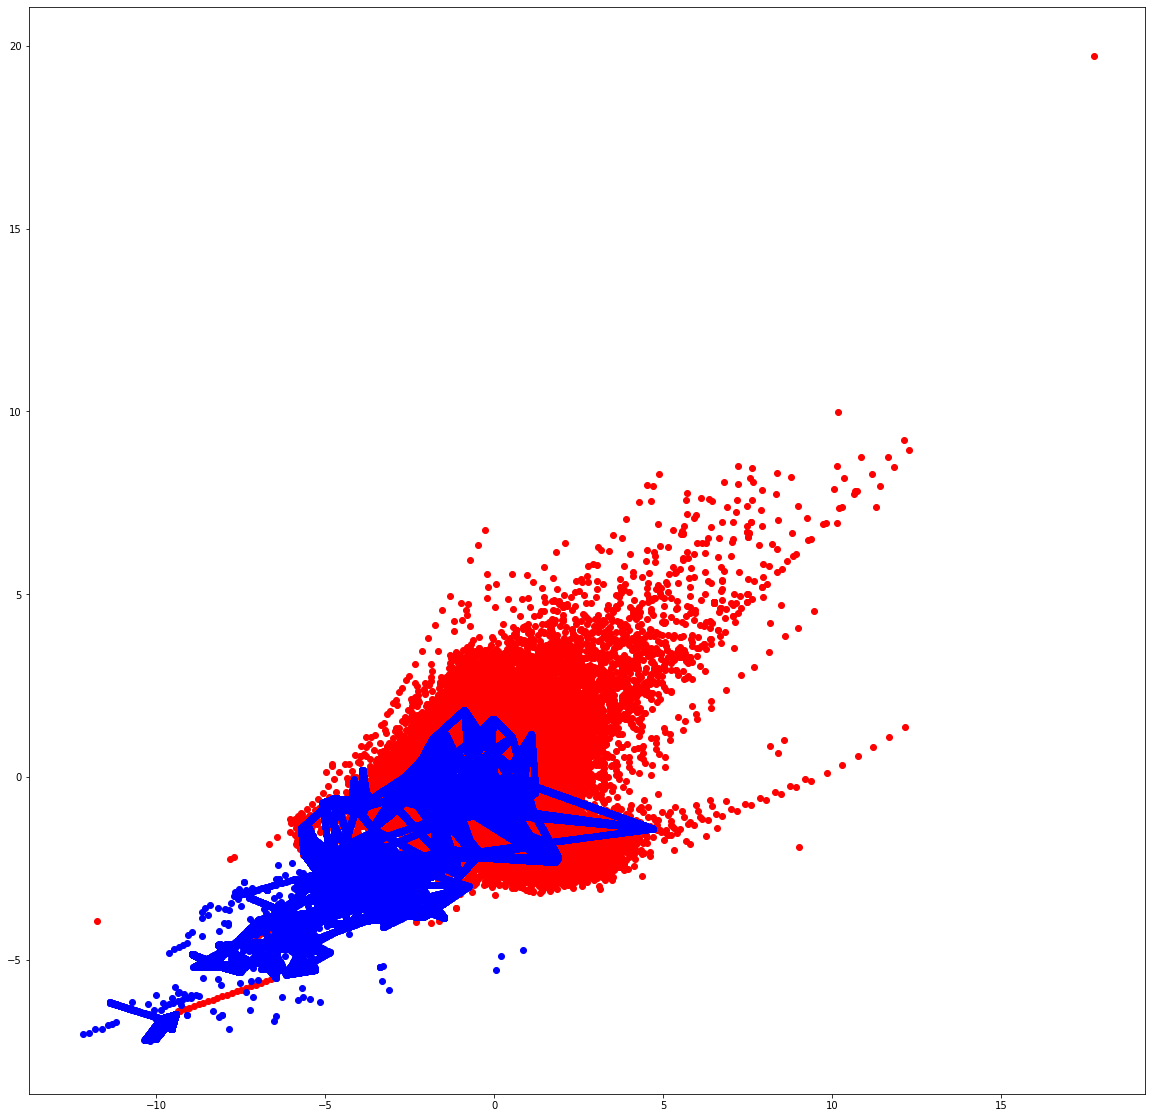

In [102]:
plt.scatter(X_adasyn_0["V14"],X_adasyn_0['V12'],color='red')
plt.scatter(X_adasyn_1["V14"], X_adasyn_1['V12'],color='blue')
plt.show()